In [1]:
import gym
import Antonio_FlexEnv_Charge_Discharge_observations as flex

import Antonio_auxfunctions_Charge_Discharge_observations as fun

import stable_baselines3

from stable_baselines3 import DQN, A2C
from stable_baselines3.a2c.policies import MlpPolicy

from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_checker import check_env

from stable_baselines3 import SAC
from stable_baselines3 import DDPG

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

from stable_baselines3.ddpg.policies import MlpPolicy


import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy.random as rnd
import time
import random as rnd

from time import perf_counter

# Data and Environment preparation

In [2]:
#Data
cwd=os.getcwd()
datafolder=cwd + '/Data'

#impor the data csv
env_data=pd.read_csv(datafolder + '/env_data.csv', header = None)

#make and check the environment
# Select the number of timesteps to consider
# timesteps=141
timesteps=47*4 # 4 days

#Create environment. Based on the aux functions code.
env=fun.make_env(env_data, load_num=4, timestep=timesteps, soc_max=3, eta=0.95, charge_lim=2, min_charge_step=0.2)

In [3]:
env.observation_space

Box([   0.    0.    0.    0.    0.    0. -100.    0. -100.    0.    0.], [ 188.   10.   10.    3.    3.    1.  100.    1.  100. 1000. 1000.], (11,), float32)

In [4]:
env.observation_space.high[3]

3.0

In [5]:
env.action_space

Discrete(12)

# Stable Baselines ALGORITHMS

In [6]:
##DQN
## parameters
gamma=0.99
learning_rate=1e-3
buffer_size=1e6

exploration_fraction=0.01
exploration_final_eps=0.02 
exploration_initial_eps=1.0
train_freq=1
batch_size=32
double_q=True
learning_starts=1000
target_network_update_freq=500

prioritized_replay=False
prioritized_replay_alpha=0.6
prioritized_replay_beta0=0.4
prioritized_replay_beta_iters=None
prioritized_replay_eps=1e-06
param_noise=True
n_cpu_tf_sess=None
verbose=0 
tensorboard_log=None
_init_setup_model=True
policy_kwargs=None
full_tensorboard_log=False
seed=None
# Policy='LnMlpPolicy'

t1_start = perf_counter()

## Train model
model = DQN('MlpPolicy', env, learning_rate=learning_rate, verbose=1,batch_size=batch_size,exploration_fraction=exploration_fraction,)
model.learn(total_timesteps=int(5e6))

t1_stop = perf_counter()
print("\nElapsed time:", t1_stop, t1_start)
print("Elapsed time during the whole program in seconds:", t1_stop-t1_start)

##Proximal Policy Optimization
# model = PPO("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=4e5)


## Other algorithms
#SAC
# model = SAC('MlpPolicy', env, verbose=2).learn(total_timesteps=1e5)

#A2C
# model = A2C(MlpPolicy, env, verbose=1)
# model.learn(total_timesteps=25000)



Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-419465.19999999995
-474837.6
-428155.80000000005
-510653.2000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.58e+05 |
|    exploration_rate | 0.986     |
| time/               |           |
|    episodes         | 4         |
|    fps              | 4525      |
|    time_elapsed     | 0         |
|    total_timesteps  | 752       |
-----------------------------------


/home/acr/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


-508851.40000000026
-527052.1999999998
-544427.7999999999
-536343.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.94e+05 |
|    exploration_rate | 0.971     |
| time/               |           |
|    episodes         | 8         |
|    fps              | 4828      |
|    time_elapsed     | 0         |
|    total_timesteps  | 1504      |
-----------------------------------
-461043.1999999999
-531154.3999999998
-484221.59999999986
-453347.00000000006
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.9e+05 |
|    exploration_rate | 0.957    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 4954     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2256     |
----------------------------------
-501205.8
-489161.79999999976
-505683.0000000002
-492186.19999999995
----

-389234.60000000015
-533453.3999999999
-517833.9999999998
-520595.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.98e+05 |
|    exploration_rate | 0.714     |
| time/               |           |
|    episodes         | 80        |
|    fps              | 4504      |
|    time_elapsed     | 3         |
|    total_timesteps  | 15040     |
-----------------------------------
-437785.80000000016
-559578.7999999999
-474021.1999999997
-495705.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.98e+05 |
|    exploration_rate | 0.7       |
| time/               |           |
|    episodes         | 84        |
|    fps              | 4529      |
|    time_elapsed     | 3         |
|    total_timesteps  | 15792     |
-----------------------------------
-512681.0000000002
-415983.5999999999
-521059.39999999997
-4805

-502890.8000000001
-424272.0000000001
-457490.0000000004
-524686.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.84e+05 |
|    exploration_rate | 0.457     |
| time/               |           |
|    episodes         | 152       |
|    fps              | 4752      |
|    time_elapsed     | 6         |
|    total_timesteps  | 28576     |
-----------------------------------
-507004.40000000014
-453342.39999999997
-470384.60000000003
-516224.79999999964
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.84e+05 |
|    exploration_rate | 0.443     |
| time/               |           |
|    episodes         | 156       |
|    fps              | 4762      |
|    time_elapsed     | 6         |
|    total_timesteps  | 29328     |
-----------------------------------
-515644.59999999974
-520183.5999999999
-455068.19999

-431175.0000000002
-515561.60000000003
-504184.4000000002
-502954.40000000026
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.93e+05 |
|    exploration_rate | 0.2       |
| time/               |           |
|    episodes         | 224       |
|    fps              | 4746      |
|    time_elapsed     | 8         |
|    total_timesteps  | 42112     |
-----------------------------------
-362017.9999999997
-433577.0
-502203.60000000027
-437829.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.92e+05 |
|    exploration_rate | 0.186     |
| time/               |           |
|    episodes         | 228       |
|    fps              | 4751      |
|    time_elapsed     | 9         |
|    total_timesteps  | 42864     |
-----------------------------------
-506045.39999999985
-508885.1999999999
-526968.9999999998
-417

-131401.99999999997
-194657.2000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.08e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 288       |
|    fps              | 3009      |
|    time_elapsed     | 17        |
|    total_timesteps  | 54144     |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.37e+03  |
|    n_updates        | 1035      |
-----------------------------------
-215961.40000000002
-99249.60000000002
-171581.60000000006
-131864.20000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.94e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 292       |
|    fps              | 2860      |
|    time_elapsed     | 19        |
|    total_timeste

-159896.20000000004
-152701.60000000018
-141005.20000000004
-131131.19999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.12e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 344       |
|    fps              | 1812      |
|    time_elapsed     | 35        |
|    total_timesteps  | 64672     |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 689       |
|    n_updates        | 3667      |
-----------------------------------
-178664.80000000008
16907.000000000004
-159737.00000000006
-140488.40000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.97e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 348       |
|    fps              | 1777      |
|    time_ela

-165081.20000000007
-204009.20000000004
-163793.60000000006
-178013.2000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.3e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 400      |
|    fps              | 1357     |
|    time_elapsed     | 55       |
|    total_timesteps  | 75200    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.11e+03 |
|    n_updates        | 6299     |
----------------------------------
-160602.0000000001
-184524.80000000008
-107814.20000000003
-57520.2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.3e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 404      |
|    fps              | 1337     |
|    time_elapsed     | 56       |
|    total_ti

-244901.19999999995
-107580.2
-31822.59999999999
-208019.40000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.43e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 456       |
|    fps              | 1156      |
|    time_elapsed     | 74        |
|    total_timesteps  | 85728     |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.2e+03   |
|    n_updates        | 8931      |
-----------------------------------
-221378.2000000001
-18428.99999999999
-215795.9999999999
-179320.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.45e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 460       |
|    fps              | 1149      |
|    time_elapsed     | 75

-224933.00000000003
-131195.19999999995
-114540.19999999995
-64164.799999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.25e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 512       |
|    fps              | 1041      |
|    time_elapsed     | 92        |
|    total_timesteps  | 96256     |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.09e+03  |
|    n_updates        | 11563     |
-----------------------------------
-95102.80000000006
-197681.0
2235.200000000002
-158189.59999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.25e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 516       |
|    fps              | 1035      |
|    time_elapsed     | 9

5927.999999999999
3999.4000000000055
-205485.40000000005
-87199.79999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.85e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 568       |
|    fps              | 968       |
|    time_elapsed     | 110       |
|    total_timesteps  | 106784    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.39e+03  |
|    n_updates        | 14195     |
-----------------------------------
-212997.80000000005
-2517.3999999999996
13446.999999999996
-16480.99999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.76e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 572       |
|    fps              | 965       |
|    time_elapsed 

-20978.199999999997
-191352.8
-106222.60000000003
-26722.599999999988
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.63e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 624       |
|    fps              | 931       |
|    time_elapsed     | 125       |
|    total_timesteps  | 117312    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.77e+03  |
|    n_updates        | 16827     |
-----------------------------------
-2100.1999999999834
-48166.199999999975
-21864.19999999998
-162493.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.71e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 628       |
|    fps              | 930       |
|    time_elapsed     | 126      

-137115.00000000003
-158326.40000000008
-108546.40000000001
-70717.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.43e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 680       |
|    fps              | 908       |
|    time_elapsed     | 140       |
|    total_timesteps  | 127840    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.24e+03  |
|    n_updates        | 19459     |
-----------------------------------
-59655.40000000003
-127904.2
-13486.799999999983
41917.40000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.21e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 684       |
|    fps              | 906       |
|    time_elapsed     | 141       |


-186497.4000000001
-12466.399999999996
-184492.00000000015
-208791.80000000008
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -9.6e+04 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 736      |
|    fps              | 883      |
|    time_elapsed     | 156      |
|    total_timesteps  | 138368   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 737      |
|    n_updates        | 22091    |
----------------------------------
-105892.20000000001
-38996.8
-155883.00000000003
-171343.0000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -9.5e+04 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 740      |
|    fps              | 881      |
|    time_elapsed     | 157      |
|    total_ti

-106045.0
-174401.80000000005
-133126.80000000005
-33413.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.01e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 792       |
|    fps              | 847       |
|    time_elapsed     | 175       |
|    total_timesteps  | 148896    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.57e+03  |
|    n_updates        | 24723     |
-----------------------------------
34015.20000000002
-109309.20000000001
-147379.20000000007
-27434.200000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.02e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 796       |
|    fps              | 845       |
|    time_elapsed     | 177       |

-84440.20000000001
-85320.00000000001
-110861.6
-148148.60000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.52e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 848       |
|    fps              | 822       |
|    time_elapsed     | 193       |
|    total_timesteps  | 159424    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 651       |
|    n_updates        | 27355     |
-----------------------------------
-16164.599999999993
-1721.7999999999938
-99487.20000000001
-66922.99999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.31e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 852       |
|    fps              | 822       |
|    time_elapsed     | 19

-74203.59999999996
-73931.80000000003
-94708.8
8271.199999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.98e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 904       |
|    fps              | 805       |
|    time_elapsed     | 211       |
|    total_timesteps  | 169952    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.39e+03  |
|    n_updates        | 29987     |
-----------------------------------
-82977.59999999996
-128214.60000000011
-39116.8
25638.600000000017
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.72e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 908       |
|    fps              | 804       |
|    time_elapsed     | 212       |
|   

-94418.40000000007
-144639.2000000001
-135845.2000000001
-52676.399999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.31e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 960       |
|    fps              | 789       |
|    time_elapsed     | 228       |
|    total_timesteps  | 180480    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.5e+03   |
|    n_updates        | 32619     |
-----------------------------------
-189920.4000000001
-45537.799999999996
-73103.59999999999
-58179.39999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.41e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 964       |
|    fps              | 789       |
|    time_elapsed 

8400.999999999998
-24870.199999999986
-5490.599999999995
3666.4000000000106
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.89e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1016      |
|    fps              | 785       |
|    time_elapsed     | 243       |
|    total_timesteps  | 191008    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.44e+03  |
|    n_updates        | 35251     |
-----------------------------------
-237765.0000000001
-840.9999999999974
7705.200000000004
-99275.8
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -6e+04   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1020     |
|    fps              | 785      |
|    time_elapsed     | 244      |
|   

1151.6000000000008
-117132.80000000006
-11894.199999999999
-78482.59999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.97e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1072      |
|    fps              | 781       |
|    time_elapsed     | 257       |
|    total_timesteps  | 201536    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 734       |
|    n_updates        | 37883     |
-----------------------------------
-123480.80000000006
22314.400000000005
-188721.0000000001
-29402.800000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.17e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1076      |
|    fps              | 780       |
|    time_elapse

-108766.39999999998
-21933.799999999992
-37217.79999999998
-14709.199999999988
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.66e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1128      |
|    fps              | 776       |
|    time_elapsed     | 273       |
|    total_timesteps  | 212064    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.53e+03  |
|    n_updates        | 40515     |
-----------------------------------
-3136.1999999999907
14101.800000000008
-213856.19999999995
41923.40000000003
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.7e+04 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1132     |
|    fps              | 776      |
|    time_elapsed     | 

-50780.40000000002
-39030.999999999985
-50061.40000000001
-101239.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -6.07e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1184      |
|    fps              | 763       |
|    time_elapsed     | 291       |
|    total_timesteps  | 222592    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.2e+03   |
|    n_updates        | 43147     |
-----------------------------------
-23242.99999999999
-27683.00000000002
-164411.20000000013
-62367.00000000003
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -6.3e+04 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1188     |
|    fps              | 763      |
|    time_elapsed     | 292      |


18838.200000000023
-34220.79999999998
-41813.599999999984
-83834.2000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.14e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1240      |
|    fps              | 753       |
|    time_elapsed     | 309       |
|    total_timesteps  | 233120    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.52e+03  |
|    n_updates        | 45779     |
-----------------------------------
-30407.999999999978
-37409.79999999997
-6215.399999999994
-32181.200000000004
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.6e+04 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1244     |
|    fps              | 752      |
|    time_elapsed     | 31

-144182.2000000001
-109804.20000000008
-125422.40000000008
-17601.600000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.86e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1296      |
|    fps              | 742       |
|    time_elapsed     | 328       |
|    total_timesteps  | 243648    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.06e+03  |
|    n_updates        | 48411     |
-----------------------------------
-60594.00000000003
-43707.60000000001
-60689.60000000003
-64436.19999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.93e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1300      |
|    fps              | 741       |
|    time_elapsed

-12901.199999999999
-34942.20000000001
18694.2
-46443.59999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.65e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1352      |
|    fps              | 734       |
|    time_elapsed     | 345       |
|    total_timesteps  | 254176    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.18e+03  |
|    n_updates        | 51043     |
-----------------------------------
4886.2
22087.400000000027
-55535.599999999984
-568.6000000000026
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.57e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1356      |
|    fps              | 734       |
|    time_elapsed     | 347       |
|    

32037.60000000001
-22783.599999999995
12220.200000000008
16288.600000000008
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.76e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1408      |
|    fps              | 733       |
|    time_elapsed     | 360       |
|    total_timesteps  | 264704    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.46e+03  |
|    n_updates        | 53675     |
-----------------------------------
-13694.199999999986
14939.800000000016
-91356.60000000003
-70275.80000000008
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.73e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1412      |
|    fps              | 733       |
|    time_elapsed  

-170128.40000000008
-192951.80000000008
-129442.19999999998
33458.20000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.45e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1464      |
|    fps              | 732       |
|    time_elapsed     | 375       |
|    total_timesteps  | 275232    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.61e+03  |
|    n_updates        | 56307     |
-----------------------------------
-175620.6000000001
-72310.4
-113111.99999999999
-61218.999999999985
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.78e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1468      |
|    fps              | 732       |
|    time_elapsed     | 37

-6370.199999999985
29907.400000000005
-12108.000000000004
13419.199999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.01e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1520      |
|    fps              | 732       |
|    time_elapsed     | 389       |
|    total_timesteps  | 285760    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.01e+03  |
|    n_updates        | 58939     |
-----------------------------------
13723.200000000012
41259.40000000004
24756.800000000003
-4664.399999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.77e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1524      |
|    fps              | 732       |
|    time_elapsed   

-17425.0
16688.2
-12570.4
24000.000000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.17e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1576      |
|    fps              | 725       |
|    time_elapsed     | 408       |
|    total_timesteps  | 296288    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.81e+03  |
|    n_updates        | 61571     |
-----------------------------------
8353.400000000003
3845.8000000000093
545.800000000002
-6491.799999999988
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.13e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1580      |
|    fps              | 724       |
|    time_elapsed     | 409       |
|    total_timeste

-21771.99999999999
-5629.7999999999965
-31143.399999999987
-16400.400000000027
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.16e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1632      |
|    fps              | 719       |
|    time_elapsed     | 426       |
|    total_timesteps  | 306816    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.16e+03  |
|    n_updates        | 64203     |
-----------------------------------
-15935.800000000001
11470.200000000012
-8569.600000000008
-25420.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.18e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1636      |
|    fps              | 719       |
|    time_elapsed     | 42

16874.800000000003
-41948.79999999998
-54318.19999999995
-2546.0000000000045
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.14e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1688      |
|    fps              | 713       |
|    time_elapsed     | 445       |
|    total_timesteps  | 317344    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.33e+03  |
|    n_updates        | 66835     |
-----------------------------------
-1445.5999999999976
23322.800000000007
-4345.599999999993
-13204.000000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.07e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1692      |
|    fps              | 712       |
|    time_elapsed

3264.3999999999983
3527.0000000000027
-30716.399999999994
8950.999999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.22e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1744      |
|    fps              | 708       |
|    time_elapsed     | 462       |
|    total_timesteps  | 327872    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.04e+03  |
|    n_updates        | 69467     |
-----------------------------------
275.6000000000014
-13588.200000000003
-6562.599999999997
-4370.5999999999985
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.84e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1748      |
|    fps              | 707       |
|    time_elapsed  

-12365.2
-20884.799999999996
8863.600000000013
22058.000000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.37e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1800      |
|    fps              | 701       |
|    time_elapsed     | 482       |
|    total_timesteps  | 338400    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.9e+03   |
|    n_updates        | 72099     |
-----------------------------------
30072.800000000003
-51738.4
6655.000000000003
-17946.199999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.03e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1804      |
|    fps              | 701       |
|    time_elapsed     | 483       |
|   

14896.99999999999
34014.00000000003
2177.7999999999947
12040.799999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.25e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1856      |
|    fps              | 696       |
|    time_elapsed     | 501       |
|    total_timesteps  | 348928    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 947       |
|    n_updates        | 74731     |
-----------------------------------
-17764.2
15978.199999999997
-2395.2
-1451.3999999999942
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.48e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1860      |
|    fps              | 695       |
|    time_elapsed     | 502       |
|    t

-64282.6
-11819.6
25237.0
-9330.000000000002
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -9.5e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1912     |
|    fps              | 690      |
|    time_elapsed     | 520      |
|    total_timesteps  | 359456   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 3.6e+03  |
|    n_updates        | 77363    |
----------------------------------
53.00000000000145
10012.000000000007
9455.8
31376.600000000017
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.46e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1916      |
|    fps              | 690       |
|    time_elapsed     | 521       |
|    total_timesteps  | 360208    |
| train

20097.800000000007
8181.000000000002
-26826.599999999988
16854.399999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.89e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1968      |
|    fps              | 685       |
|    time_elapsed     | 540       |
|    total_timesteps  | 369984    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.17e+03  |
|    n_updates        | 79995     |
-----------------------------------
7629.000000000008
10154.600000000002
21355.200000000023
-26986.999999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.81e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 1972      |
|    fps              | 684       |
|    time_elapsed   

3450.4
11433.6
33290.200000000026
3622.2000000000107
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 1.85e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2024     |
|    fps              | 679      |
|    time_elapsed     | 559      |
|    total_timesteps  | 380512   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 807      |
|    n_updates        | 82627    |
----------------------------------
24709.0
21573.600000000013
12249.2
-10005.0
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.35e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2028     |
|    fps              | 679      |
|    time_elapsed     | 561      |
|    total_timesteps  | 381264   |
| train/              |     

35304.60000000001
-55396.20000000003
43.19999999999854
23290.000000000007
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 7e+03    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2080     |
|    fps              | 676      |
|    time_elapsed     | 578      |
|    total_timesteps  | 391040   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.27e+03 |
|    n_updates        | 85259    |
----------------------------------
31975.2
-110049.79999999997
-48495.59999999998
12241.999999999995
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 7.12e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2084     |
|    fps              | 676      |
|    time_elapsed     | 579      |
|    total_timesteps

13049.800000000007
11234.399999999994
-9715.800000000008
-30405.999999999993
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 1.13e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2136     |
|    fps              | 672      |
|    time_elapsed     | 596      |
|    total_timesteps  | 401568   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.27e+03 |
|    n_updates        | 87891    |
----------------------------------
14091.799999999996
11335.199999999995
11346.79999999999
-69656.40000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2140     |
|    fps              | 672      |
|    time_elapsed     | 598      |
|    tot

11587.199999999997
17346.600000000002
-5699.200000000004
-7176.2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.45e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2192     |
|    fps              | 671      |
|    time_elapsed     | 613      |
|    total_timesteps  | 412096   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 851      |
|    n_updates        | 90523    |
----------------------------------
15564.000000000011
-107920.80000000003
19415.20000000001
15363.800000000005
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 1.69e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2196     |
|    fps              | 671      |
|    time_elapsed     | 614      |
|    total_timestep

10630.0
-12504.799999999997
8906.400000000025
35406.40000000003
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.3e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2248     |
|    fps              | 672      |
|    time_elapsed     | 628      |
|    total_timesteps  | 422624   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 916      |
|    n_updates        | 93155    |
----------------------------------
28625.20000000002
-81773.80000000002
-62066.4
-66384.99999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.77e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2252      |
|    fps              | 672       |
|    time_elapsed     | 629       |
|    total_timesteps  

-20231.59999999999
-120981.39999999997
-51330.400000000016
-2721.199999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.63e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2304      |
|    fps              | 670       |
|    time_elapsed     | 646       |
|    total_timesteps  | 433152    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 873       |
|    n_updates        | 95787     |
-----------------------------------
-37658.60000000002
2596.6000000000045
-7363.4
-3097.6000000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.77e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2308      |
|    fps              | 669       |
|    time_elapsed     | 647 

-120665.99999999997
-64996.99999999997
-98501.00000000001
-77933.19999999991
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.56e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2360      |
|    fps              | 667       |
|    time_elapsed     | 664       |
|    total_timesteps  | 443680    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.02e+03  |
|    n_updates        | 98419     |
-----------------------------------
-108031.39999999995
-73132.39999999995
-3883.79999999999
-19455.599999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.84e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2364      |
|    fps              | 667       |
|    time_elapsed 

3929.8000000000093
-49441.799999999974
-37464.0
-91199.60000000014
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.26e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2416      |
|    fps              | 665       |
|    time_elapsed     | 682       |
|    total_timesteps  | 454208    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 519       |
|    n_updates        | 101051    |
-----------------------------------
-37777.20000000012
-20591.600000000002
-56182.40000000001
-66519.00000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.25e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2420      |
|    fps              | 665       |
|    time_elapsed     | 683 

-11755.599999999984
-52570.20000000001
-32663.4
-32854.20000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.4e+04 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2472     |
|    fps              | 663      |
|    time_elapsed     | 700      |
|    total_timesteps  | 464736   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.31e+03 |
|    n_updates        | 103683   |
----------------------------------
-40642.4
-18484.600000000006
1783.0000000000286
-5138.80000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.26e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2476      |
|    fps              | 663       |
|    time_elapsed     | 701       |
|    total_timeste

-39018.99999999999
-83684.59999999996
27321.80000000001
-70507.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.22e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2528      |
|    fps              | 662       |
|    time_elapsed     | 717       |
|    total_timesteps  | 475264    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.08e+03  |
|    n_updates        | 106315    |
-----------------------------------
-67359.99999999996
-37305.799999999974
-69972.79999999997
-29780.799999999992
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.31e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2532      |
|    fps              | 662       |
|    time_elapsed     | 718  

-4291.800000000002
7474.000000000002
-7365.199999999987
-6559.199999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.84e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2584      |
|    fps              | 662       |
|    time_elapsed     | 732       |
|    total_timesteps  | 485792    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 974       |
|    n_updates        | 108947    |
-----------------------------------
17324.40000000001
15345.399999999992
27470.400000000016
30580.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.69e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2588      |
|    fps              | 662       |
|    time_elapsed     | 734      

16107.000000000011
16916.800000000003
15680.800000000001
-19636.399999999998
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 46.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2640     |
|    fps              | 663      |
|    time_elapsed     | 748      |
|    total_timesteps  | 496320   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 548      |
|    n_updates        | 111579   |
----------------------------------
15995.399999999992
12095.599999999991
1735.2000000000085
22407.000000000015
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 3.44e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2644     |
|    fps              | 663      |
|    time_elapsed     | 749      |
|    to

-80697.40000000017
4993.400000000008
-72928.6
-50521.399999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.82e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2696      |
|    fps              | 661       |
|    time_elapsed     | 766       |
|    total_timesteps  | 506848    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 551       |
|    n_updates        | 114211    |
-----------------------------------
-160673.60000000006
15303.2
22208.400000000016
-27985.399999999987
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.97e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2700      |
|    fps              | 660       |
|    time_elapsed     | 768       |
|  

28141.60000000002
-60494.80000000003
3328.200000000005
-2634.599999999992
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.36e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2752      |
|    fps              | 658       |
|    time_elapsed     | 785       |
|    total_timesteps  | 517376    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.06e+03  |
|    n_updates        | 116843    |
-----------------------------------
-116536.80000000032
25360.599999999995
-42875.400000000016
-141400.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.62e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2756      |
|    fps              | 658       |
|    time_elapsed   

-2056.9999999999873
-66188.40000000002
-63435.0
-84996.00000000013
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.64e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2808      |
|    fps              | 656       |
|    time_elapsed     | 803       |
|    total_timesteps  | 527904    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.27e+03  |
|    n_updates        | 119475    |
-----------------------------------
-67861.39999999997
7245.2
-81632.40000000005
-7976.800000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.51e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2812      |
|    fps              | 656       |
|    time_elapsed     | 805       |
|    

-62609.39999999998
-87052.80000000002
-70721.60000000003
-82945.59999999992
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.24e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2864      |
|    fps              | 655       |
|    time_elapsed     | 821       |
|    total_timesteps  | 538432    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.14e+03  |
|    n_updates        | 122107    |
-----------------------------------
-40223.799999999996
22034.40000000001
24051.199999999997
-49498.399999999994
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.3e+04 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2868     |
|    fps              | 655      |
|    time_elapsed     | 823

11359.200000000004
-56509.40000000002
25275.0
12720.999999999987
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.18e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2920      |
|    fps              | 654       |
|    time_elapsed     | 838       |
|    total_timesteps  | 548960    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 833       |
|    n_updates        | 124739    |
-----------------------------------
5391.399999999994
15693.200000000008
19408.600000000013
2136.7999999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.24e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2924      |
|    fps              | 654       |
|    time_elapsed     | 839     

-36565.6
19401.60000000001
-26644.200000000015
-1391.8000000000043
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.46e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2976      |
|    fps              | 654       |
|    time_elapsed     | 854       |
|    total_timesteps  | 559488    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 871       |
|    n_updates        | 127371    |
-----------------------------------
-2754.5999999999894
-10906.000000000005
1458.6000000000045
26687.400000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.28e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 2980      |
|    fps              | 654       |
|    time_elapsed     | 855

28160.20000000001
5532.2
-8316.199999999999
24716.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -6.08e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 3032      |
|    fps              | 655       |
|    time_elapsed     | 869       |
|    total_timesteps  | 570016    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.64e+03  |
|    n_updates        | 130003    |
-----------------------------------
-1052.7999999999988
5539.800000000003
16718.599999999995
-51689.400000000016
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.46e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 3036      |
|    fps              | 655       |
|    time_elapsed     | 870       |
|    to

-53482.19999999999
-12259.79999999999
23416.600000000017
-30226.799999999992
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.22e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 3088      |
|    fps              | 653       |
|    time_elapsed     | 888       |
|    total_timesteps  | 580544    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.55e+03  |
|    n_updates        | 132635    |
-----------------------------------
-31734.8
-1082.2000000000012
678.9999999999986
33938.800000000025
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.18e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 3092      |
|    fps              | 653       |
|    time_elapsed     | 890  

-12701.200000000003
36663.600000000006
19435.40000000001
30676.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.99e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 3144      |
|    fps              | 650       |
|    time_elapsed     | 908       |
|    total_timesteps  | 591072    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.85e+03  |
|    n_updates        | 135267    |
-----------------------------------
31326.80000000001
-7462.800000000002
-9192.400000000007
19477.000000000004
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.5e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3148     |
|    fps              | 650      |
|    time_elapsed     | 910      |
|    

2416.6000000000145
30056.400000000012
12741.000000000007
33977.80000000002
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 5.38e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3200     |
|    fps              | 648      |
|    time_elapsed     | 928      |
|    total_timesteps  | 601600   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 449      |
|    n_updates        | 137899   |
----------------------------------
41921.00000000003
14696.399999999998
-12330.799999999994
24670.000000000004
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 5.85e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3204     |
|    fps              | 647      |
|    time_elapsed     | 929      |
|    tota

-7872.999999999997
-17727.399999999998
-7894.599999999997
838.000000000002
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.43e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3256     |
|    fps              | 646      |
|    time_elapsed     | 946      |
|    total_timesteps  | 612128   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.13e+03 |
|    n_updates        | 140531   |
----------------------------------
33263.20000000001
-40317.39999999999
-16649.999999999996
17391.0
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 1.88e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3260     |
|    fps              | 646      |
|    time_elapsed     | 947      |
|    total_timesteps

-4495.799999999997
-7227.2
24187.600000000002
-68726.6
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -579     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3312     |
|    fps              | 647      |
|    time_elapsed     | 961      |
|    total_timesteps  | 622656   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 906      |
|    n_updates        | 143163   |
----------------------------------
-22588.800000000003
-40446.6
5315.200000000006
-54582.99999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.96e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 3316      |
|    fps              | 647       |
|    time_elapsed     | 962       |
|    total_timesteps  | 623408

28741.600000000006
-18054.399999999983
-185.39999999999475
30832.600000000035
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.24e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3368     |
|    fps              | 648      |
|    time_elapsed     | 977      |
|    total_timesteps  | 633184   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 969      |
|    n_updates        | 145795   |
----------------------------------
25415.399999999994
16754.6
24142.600000000006
5023.199999999997
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 3.09e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3372     |
|    fps              | 648      |
|    time_elapsed     | 978      |
|    total_timeste

904.199999999999
2929.9999999999973
33335.20000000002
-7708.199999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.74e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3424     |
|    fps              | 648      |
|    time_elapsed     | 992      |
|    total_timesteps  | 643712   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 612      |
|    n_updates        | 148427   |
----------------------------------
-84461.39999999997
10868.400000000014
10994.600000000011
17394.600000000006
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.32e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3428     |
|    fps              | 648      |
|    time_elapsed     | 993      |
|    total_

8702.399999999996
17578.00000000001
-29623.399999999994
24132.600000000013
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.3e+03  |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3480     |
|    fps              | 646      |
|    time_elapsed     | 1011     |
|    total_timesteps  | 654240   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 646      |
|    n_updates        | 151059   |
----------------------------------
26114.00000000002
21335.800000000014
-4211.800000000007
-1729.1999999999862
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.34e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3484     |
|    fps              | 646      |
|    time_elapsed     | 1013     |
|    tota

-7927.400000000007
1998.8000000000006
-23781.799999999996
20073.000000000004
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 6.69e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3536     |
|    fps              | 644      |
|    time_elapsed     | 1030     |
|    total_timesteps  | 664768   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 469      |
|    n_updates        | 153691   |
----------------------------------
20346.400000000012
11565.200000000006
-13037.20000000001
12742.199999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 6.53e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3540     |
|    fps              | 644      |
|    time_elapsed     | 1032     |
|    to

-46580.80000000004
-584.9999999999987
14567.60000000001
-845.400000000003
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 3.85e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3592     |
|    fps              | 643      |
|    time_elapsed     | 1049     |
|    total_timesteps  | 675296   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.79e+03 |
|    n_updates        | 156323   |
----------------------------------
-11839.199999999993
-17474.000000000004
-4569.199999999992
-31130.2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.6e+03  |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3596     |
|    fps              | 643      |
|    time_elapsed     | 1050     |
|    total_timeste

10807.600000000006
12149.000000000005
10783.8
649.2000000000135
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.5e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3648     |
|    fps              | 642      |
|    time_elapsed     | 1066     |
|    total_timesteps  | 685824   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.37e+03 |
|    n_updates        | 158955   |
----------------------------------
37916.80000000002
-61045.799999999996
10893.400000000009
34761.40000000003
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -545     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3652     |
|    fps              | 643      |
|    time_elapsed     | 1067     |
|    total_timesteps 

6866.0000000000055
22648.600000000006
-52626.20000000001
-26803.99999999993
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 1.36e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3704     |
|    fps              | 643      |
|    time_elapsed     | 1081     |
|    total_timesteps  | 696352   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 486      |
|    n_updates        | 161587   |
----------------------------------
11986.600000000013
4088.200000000001
-6488.199999999978
26573.200000000008
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 1.72e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3708     |
|    fps              | 643      |
|    time_elapsed     | 1082     |
|    tota

-7112.999999999999
25916.4
986.2000000000027
12629.999999999998
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 6.86e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3760     |
|    fps              | 644      |
|    time_elapsed     | 1097     |
|    total_timesteps  | 706880   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.58e+03 |
|    n_updates        | 164219   |
----------------------------------
7683.400000000004
-11105.800000000008
31958.80000000001
-18018.199999999997
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 6.77e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3764     |
|    fps              | 644      |
|    time_elapsed     | 1098     |
|    total_timesteps

30661.00000000001
6159.199999999997
38006.40000000002
21323.400000000005
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 8.51e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3816     |
|    fps              | 644      |
|    time_elapsed     | 1112     |
|    total_timesteps  | 717408   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 983      |
|    n_updates        | 166851   |
----------------------------------
12134.799999999992
-4400.59999999999
-42181.40000000001
-144121.80000000022
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 6.28e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3820     |
|    fps              | 644      |
|    time_elapsed     | 1113     |
|    total_

27990.800000000007
-29105.20000000001
12840.199999999999
6081.599999999993
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -820     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3872     |
|    fps              | 643      |
|    time_elapsed     | 1131     |
|    total_timesteps  | 727936   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 932      |
|    n_updates        | 169483   |
----------------------------------
6117.600000000003
-10155.599999999999
33917.00000000002
18802.40000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.07e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 3876      |
|    fps              | 642       |
|    time_elapsed     | 1133      |
| 

-12526.799999999994
-46641.80000000006
-41990.40000000003
-13916.000000000004
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.8e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3928     |
|    fps              | 641      |
|    time_elapsed     | 1151     |
|    total_timesteps  | 738464   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 912      |
|    n_updates        | 172115   |
----------------------------------
24984.800000000025
3228.6000000000026
3957.9999999999955
-20561.799999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.78e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 3932      |
|    fps              | 641       |
|    time_elapsed     | 1153    

6893.600000000003
15255.600000000011
34610.200000000026
-4597.599999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.27e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 3984      |
|    fps              | 639       |
|    time_elapsed     | 1170      |
|    total_timesteps  | 748992    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.46e+03  |
|    n_updates        | 174747    |
-----------------------------------
3844.1999999999916
-32572.399999999987
-4238.399999999996
-40797.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.43e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 3988      |
|    fps              | 639       |
|    time_elapsed     | 1171  

16783.199999999993
6343.800000000011
19408.000000000015
-5736.399999999991
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.22e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4040      |
|    fps              | 638       |
|    time_elapsed     | 1189      |
|    total_timesteps  | 759520    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 941       |
|    n_updates        | 177379    |
-----------------------------------
16537.60000000001
-8261.799999999994
2287.9999999999973
10051.800000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.12e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4044      |
|    fps              | 638       |
|    time_elapsed     

932.9999999999955
3749.6000000000113
6903.000000000001
17364.800000000007
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 4.76e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4096     |
|    fps              | 639      |
|    time_elapsed     | 1204     |
|    total_timesteps  | 770048   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.48e+03 |
|    n_updates        | 180011   |
----------------------------------
11393.8
9939.0
-672.399999999997
14628.000000000011
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 4.97e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4100     |
|    fps              | 639      |
|    time_elapsed     | 1205     |
|    total_timesteps  | 770800   |

34658.20000000001
14261.00000000001
-11835.600000000002
-15478.999999999978
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 4.79e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4152     |
|    fps              | 639      |
|    time_elapsed     | 1219     |
|    total_timesteps  | 780576   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 603      |
|    n_updates        | 182643   |
----------------------------------
-14334.79999999999
28799.60000000002
-9088.600000000002
-3640.4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 3.68e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4156     |
|    fps              | 639      |
|    time_elapsed     | 1220     |
|    total_timesteps

-35809.99999999999
11537.4
-15110.599999999995
18596.200000000008
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 1.28e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4208     |
|    fps              | 639      |
|    time_elapsed     | 1236     |
|    total_timesteps  | 791104   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 507      |
|    n_updates        | 185275   |
----------------------------------
30624.600000000006
10125.399999999996
33385.200000000004
8760.799999999994
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 1.92e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4212     |
|    fps              | 639      |
|    time_elapsed     | 1237     |
|    total_timestep

18600.4
3535.399999999999
5201.599999999992
-19188.000000000015
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.13e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4264     |
|    fps              | 637      |
|    time_elapsed     | 1256     |
|    total_timesteps  | 801632   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 824      |
|    n_updates        | 187907   |
----------------------------------
573.4000000000036
-64896.200000000106
35370.80000000002
725.400000000003
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.03e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4268     |
|    fps              | 637      |
|    time_elapsed     | 1258     |
|    total_timesteps  |

32782.60000000001
30056.40000000002
-13051.99999999998
-546.6000000000003
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 1.21e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4320     |
|    fps              | 635      |
|    time_elapsed     | 1277     |
|    total_timesteps  | 812160   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 500      |
|    n_updates        | 190539   |
----------------------------------
-1228.3999999999974
37968.20000000001
37915.80000000002
21411.000000000015
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.1e+03  |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4324     |
|    fps              | 635      |
|    time_elapsed     | 1278     |
|    total_

-21551.399999999994
30110.800000000014
18155.999999999996
37919.00000000004
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 2.12e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4376     |
|    fps              | 634      |
|    time_elapsed     | 1296     |
|    total_timesteps  | 822688   |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.26e+03 |
|    n_updates        | 193171   |
----------------------------------
-112948.0
19035.00000000001
-38311.20000000002
17176.800000000007
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 1.18e+03 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4380     |
|    fps              | 634      |
|    time_elapsed     | 1298     |
|    total_timeste

29297.600000000002
11545.600000000008
-24648.600000000013
-10187.800000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.15e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4432      |
|    fps              | 633       |
|    time_elapsed     | 1315      |
|    total_timesteps  | 833216    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 586       |
|    n_updates        | 195803    |
-----------------------------------
11504.4
4667.800000000004
9268.400000000003
4147.999999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.15e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4436      |
|    fps              | 633       |
|    time_elapsed     | 1317    

-31286.79999999997
11257.999999999995
-27964.800000000057
31267.200000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.05e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4488      |
|    fps              | 631       |
|    time_elapsed     | 1336      |
|    total_timesteps  | 843744    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 795       |
|    n_updates        | 198435    |
-----------------------------------
-11693.2
-13461.799999999992
3386.2000000000185
-22060.199999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.67e+03 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4492      |
|    fps              | 631       |
|    time_elapsed     | 133

12849.20000000002
-129283.60000000003
-78712.20000000001
-22387.39999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.66e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4544      |
|    fps              | 628       |
|    time_elapsed     | 1359      |
|    total_timesteps  | 854272    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 667       |
|    n_updates        | 201067    |
-----------------------------------
-7901.999999999989
-61488.80000000003
-46244.80000000002
-99691.00000000004
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.9e+04 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4548     |
|    fps              | 628      |
|    time_elapsed     | 1360

-26928.00000000002
-21503.99999999998
-87649.8
-347.5999999999981
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.58e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4600      |
|    fps              | 622       |
|    time_elapsed     | 1389      |
|    total_timesteps  | 864800    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 792       |
|    n_updates        | 203699    |
-----------------------------------
18019.400000000005
-89338.80000000003
-42403.00000000001
2729.80000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.59e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4604      |
|    fps              | 621       |
|    time_elapsed     | 1392    

-49704.199999999975
-59410.59999999998
-49571.99999999999
-49898.80000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.88e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4656      |
|    fps              | 615       |
|    time_elapsed     | 1421      |
|    total_timesteps  | 875328    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 953       |
|    n_updates        | 206331    |
-----------------------------------
-49666.79999999999
-76109.39999999995
1493.8000000000052
-9599.80000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.94e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4660      |
|    fps              | 615       |
|    time_elapsed   

20124.000000000015
-17687.2
-35245.999999999985
-5333.800000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.85e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4712      |
|    fps              | 610       |
|    time_elapsed     | 1451      |
|    total_timesteps  | 885856    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.04e+03  |
|    n_updates        | 208963    |
-----------------------------------
-7329.199999999995
-22168.600000000002
-6569.799999999999
-62969.79999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.98e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4716      |
|    fps              | 610       |
|    time_elapsed     | 1453

-43433.6
-54596.59999999999
-52558.19999999999
-4209.399999999987
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.04e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4768      |
|    fps              | 604       |
|    time_elapsed     | 1483      |
|    total_timesteps  | 896384    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 538       |
|    n_updates        | 211595    |
-----------------------------------
-38844.39999999997
8835.800000000007
22211.20000000001
-34601.99999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.08e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4772      |
|    fps              | 604       |
|    time_elapsed     | 1485    

-113087.20000000001
-83774.20000000006
-27699.99999999999
29957.00000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.59e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4824      |
|    fps              | 598       |
|    time_elapsed     | 1514      |
|    total_timesteps  | 906912    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.23e+03  |
|    n_updates        | 214227    |
-----------------------------------
-50049.39999999997
-55307.399999999994
-73165.00000000001
-70760.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.88e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4828      |
|    fps              | 598       |
|    time_elapsed     | 1516 

26610.2
14376.000000000004
-11175.199999999995
-33793.19999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.01e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4880      |
|    fps              | 595       |
|    time_elapsed     | 1539      |
|    total_timesteps  | 917440    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 451       |
|    n_updates        | 216859    |
-----------------------------------
13211.200000000004
-80641.40000000004
19294.799999999992
-64513.59999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.08e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4884      |
|    fps              | 595       |
|    time_elapsed     | 1541  

-114910.20000000003
-58921.399999999965
-61533.79999999998
-20384.200000000015
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.77e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4936      |
|    fps              | 592       |
|    time_elapsed     | 1566      |
|    total_timesteps  | 927968    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.71e+03  |
|    n_updates        | 219491    |
-----------------------------------
-49792.2
-75555.8
-53283.79999999998
-100551.20000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.02e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4940      |
|    fps              | 592       |
|    time_elapsed     | 1567      |


-155922.80000000008
-52429.59999999998
-83535.39999999998
-109035.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.14e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4992      |
|    fps              | 589       |
|    time_elapsed     | 1590      |
|    total_timesteps  | 938496    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 365       |
|    n_updates        | 222123    |
-----------------------------------
-232604.60000000012
-98526.99999999999
-136498.8
-65461.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.49e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 4996      |
|    fps              | 589       |
|    time_elapsed     | 1593      |


-275036.80000000005
-248711.00000000006
-112990.99999999997
-19532.39999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.36e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5048      |
|    fps              | 584       |
|    time_elapsed     | 1622      |
|    total_timesteps  | 949024    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 509       |
|    n_updates        | 224755    |
-----------------------------------
-84100.79999999997
-202348.8
-56212.599999999984
-251150.2000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.39e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5052      |
|    fps              | 584       |
|    time_elapsed     | 1

-133339.79999999996
-198325.6000000001
-266637.40000000014
-224695.99999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.77e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5104      |
|    fps              | 580       |
|    time_elapsed     | 1651      |
|    total_timesteps  | 959552    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 860       |
|    n_updates        | 227387    |
-----------------------------------
-99480.20000000003
-208676.40000000005
-205102.6
-201222.80000000005
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.8e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5108     |
|    fps              | 580      |
|    time_elapsed     | 1654    

-199907.60000000006
-328337.9999999999
-192104.6
-334354.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.95e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5160      |
|    fps              | 577       |
|    time_elapsed     | 1680      |
|    total_timesteps  | 970080    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 878       |
|    n_updates        | 230019    |
-----------------------------------
-214918.80000000008
-308739.39999999997
-297634.19999999995
-203296.00000000012
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.97e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5164      |
|    fps              | 577       |
|    time_elapsed     | 1681     

-374183.2
-303577.1999999999
-307375.7999999999
-213924.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.35e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5216      |
|    fps              | 575       |
|    time_elapsed     | 1703      |
|    total_timesteps  | 980608    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 871       |
|    n_updates        | 232651    |
-----------------------------------
-230782.60000000003
-248966.6000000001
-281090.6000000001
-252104.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.38e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5220      |
|    fps              | 575       |
|    time_elapsed     | 1705      |
|    total

-369581.6
-305418.6000000001
-300316.39999999997
-281063.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.93e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5272      |
|    fps              | 572       |
|    time_elapsed     | 1731      |
|    total_timesteps  | 991136    |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.08e+03  |
|    n_updates        | 235283    |
-----------------------------------
-286531.2
-264666.1999999999
-311767.0
-242323.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.93e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5276      |
|    fps              | 572       |
|    time_elapsed     | 1733      |
|    total_timesteps  | 9918

-309344.19999999984
-379811.99999999994
-469544.1999999999
-505692.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.42e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5328      |
|    fps              | 568       |
|    time_elapsed     | 1763      |
|    total_timesteps  | 1001664   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.03e+03  |
|    n_updates        | 237915    |
-----------------------------------
-440061.39999999997
-385369.39999999973
-488940.19999999995
-390984.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.46e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5332      |
|    fps              | 567       |
|    time_elapsed     | 

-560994.9999999999
-483167.8
-437904.79999999993
-329588.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.97e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5384      |
|    fps              | 564       |
|    time_elapsed     | 1792      |
|    total_timesteps  | 1012192   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.4e+03   |
|    n_updates        | 240547    |
-----------------------------------
-492348.60000000003
-410754.99999999994
-334826.39999999985
-411869.99999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.98e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5388      |
|    fps              | 564       |
|    time_elapsed     | 

-451820.80000000005
-523770.20000000007
-560025.4000000003
-556128.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.42e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5440      |
|    fps              | 562       |
|    time_elapsed     | 1817      |
|    total_timesteps  | 1022720   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.46e+04  |
|    n_updates        | 243179    |
-----------------------------------
-572661.6000000002
-566113.8000000002
-362733.9999999999
-508331.59999999986
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.46e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5444      |
|    fps              | 562       |
|    time_elapsed     | 18

-612236.0000000002
-484201.4000000001
-602199.4
-571306.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.01e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5496      |
|    fps              | 558       |
|    time_elapsed     | 1848      |
|    total_timesteps  | 1033248   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.76e+03  |
|    n_updates        | 245811    |
-----------------------------------
-596688.8000000003
-500079.3999999999
-481232.5999999999
-547527.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.05e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5500      |
|    fps              | 558       |
|    time_elapsed     | 1851      |
| 

-550897.3999999997
-569209.5999999999
-533686.9999999999
-492085.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.29e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5552      |
|    fps              | 555       |
|    time_elapsed     | 1879      |
|    total_timesteps  | 1043776   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.89e+04  |
|    n_updates        | 248443    |
-----------------------------------
-516833.9999999998
-564951.6
-571071.3999999999
-398426.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5556      |
|    fps              | 554       |
|    time_elapsed     | 1882      |
|

-579228.2000000002
-397592.3999999998
-371370.1999999999
-524672.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.16e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5608      |
|    fps              | 552       |
|    time_elapsed     | 1908      |
|    total_timesteps  | 1054304   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.02e+03  |
|    n_updates        | 251075    |
-----------------------------------
-510292.3999999997
-541562.3999999999
-543990.7999999999
-364099.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.15e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5612      |
|    fps              | 552       |
|    time_elapsed     | 1911 

-439904.7999999999
-529590.4
-441110.99999999994
-516362.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.02e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5664      |
|    fps              | 549       |
|    time_elapsed     | 1936      |
|    total_timesteps  | 1064832   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.99e+03  |
|    n_updates        | 253707    |
-----------------------------------
-547735.6
-531748.6000000002
-524553.5999999997
-501852.39999999985
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.01e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5668      |
|    fps              | 549       |
|    time_elapsed     | 1938      |

-475543.8000000001
-553211.5999999996
-513743.19999999966
-506011.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.08e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5720      |
|    fps              | 548       |
|    time_elapsed     | 1961      |
|    total_timesteps  | 1075360   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 5.91e+03  |
|    n_updates        | 256339    |
-----------------------------------
-561399.4000000001
-453152.8
-461855.99999999977
-455911.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.06e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5724      |
|    fps              | 547       |
|    time_elapsed     | 1963      |


-572650.3999999998
-530632.1999999998
-535720.3999999997
-468205.8000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.18e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5776      |
|    fps              | 545       |
|    time_elapsed     | 1989      |
|    total_timesteps  | 1085888   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.31e+03  |
|    n_updates        | 258971    |
-----------------------------------
-534485.3999999998
-535906.1999999997
-447108.80000000005
-450685.00000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.18e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5780      |
|    fps              | 545       |
|    time_elapsed 

-561645.3999999998
-542226.3999999997
-441400.0000000002
-535140.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.29e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5832      |
|    fps              | 542       |
|    time_elapsed     | 2019      |
|    total_timesteps  | 1096416   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.79e+03  |
|    n_updates        | 261603    |
-----------------------------------
-527085.5999999997
-459592.60000000003
-517360.9999999998
-459864.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5836      |
|    fps              | 542       |
|    time_elapsed  

-519406.4
-507012.7999999999
-577914.1999999998
-540226.3999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.3e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5888     |
|    fps              | 540      |
|    time_elapsed     | 2048     |
|    total_timesteps  | 1106944  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 3.52e+03 |
|    n_updates        | 264235   |
----------------------------------
-574511.2000000002
-563223.0000000003
-501136.4
-435404.59999999974
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.29e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5892      |
|    fps              | 540       |
|    time_elapsed     | 2050      |
|    total_times

-526948.1999999998
-522135.9999999999
-550704.8
-523018.2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.3e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 5944     |
|    fps              | 538      |
|    time_elapsed     | 2074     |
|    total_timesteps  | 1117472  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 5.61e+03 |
|    n_updates        | 266867   |
----------------------------------
-542376.5999999999
-483989.39999999985
-540903.8
-504515.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.29e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 5948      |
|    fps              | 538       |
|    time_elapsed     | 2076      |
|    total_timesteps  | 1

-544014.8000000002
-569535.3999999998
-566300.6000000002
-562037.8000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.42e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6000      |
|    fps              | 535       |
|    time_elapsed     | 2106      |
|    total_timesteps  | 1128000   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.64e+03  |
|    n_updates        | 269499    |
-----------------------------------
-570748.8
-565299.0000000001
-573098.5999999999
-563605.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.43e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6004      |
|    fps              | 535       |
|    time_elapsed     | 2109 

-543569.3999999999
-546064.3999999999
-525280.5999999999
-508643.59999999986
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.36e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6056      |
|    fps              | 533       |
|    time_elapsed     | 2135      |
|    total_timesteps  | 1138528   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.54e+03  |
|    n_updates        | 272131    |
-----------------------------------
-541119.6
-426065.5999999999
-557548.2
-563690.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.36e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6060      |
|    fps              | 532       |
|    time_elapsed     | 2137      |
|    total

-554919.2000000002
-491555.8
-558774.5999999999
-555044.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6112      |
|    fps              | 531       |
|    time_elapsed     | 2161      |
|    total_timesteps  | 1149056   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.28e+04  |
|    n_updates        | 274763    |
-----------------------------------
-559634.5999999999
-559636.6
-567718.7999999998
-545152.2000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.33e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6116      |
|    fps              | 531       |
|    time_elapsed     | 2163      |
|    total_

-553363.2
-544212.5999999999
-556769.5999999999
-532465.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.43e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6168      |
|    fps              | 530       |
|    time_elapsed     | 2186      |
|    total_timesteps  | 1159584   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 5.99e+03  |
|    n_updates        | 277395    |
-----------------------------------
-523874.1999999999
-570253.5999999997
-575400.3999999996
-537952.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.45e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6172      |
|    fps              | 530       |
|    time_elapsed     | 2188 

-577271.8
-569387.4000000003
-575745.6
-563115.7999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.51e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6224      |
|    fps              | 527       |
|    time_elapsed     | 2217      |
|    total_timesteps  | 1170112   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8e+03     |
|    n_updates        | 280027    |
-----------------------------------
-437063.79999999976
-526944.2000000002
-614238.6000000001
-518222.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.49e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6228      |
|    fps              | 527       |
|    time_elapsed     | 2219      |
|    total

-546656.0
-562138.7999999997
-537600.5999999996
-550417.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.61e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6280      |
|    fps              | 525       |
|    time_elapsed     | 2246      |
|    total_timesteps  | 1180640   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.68e+03  |
|    n_updates        | 282659    |
-----------------------------------
-556921.1999999998
-566816.7999999998
-567569.0
-572902.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.61e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6284      |
|    fps              | 525       |
|    time_elapsed     | 2248      |
| 

-597024.6000000001
-396692.6000000002
-575313.6000000003
-412623.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6336      |
|    fps              | 523       |
|    time_elapsed     | 2275      |
|    total_timesteps  | 1191168   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.69e+04  |
|    n_updates        | 285291    |
-----------------------------------
-462174.60000000003
-522737.80000000016
-526919.4000000004
-527205.2000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.61e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6340      |
|    fps              | 523       |
|    time_elapsed

-563101.1999999998
-528713.5999999999
-511969.00000000006
-527535.2000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6392     |
|    fps              | 521      |
|    time_elapsed     | 2303     |
|    total_timesteps  | 1201696  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 4.02e+03 |
|    n_updates        | 287923   |
----------------------------------
-559451.6
-542443.7999999998
-566780.7999999999
-556762.8
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 6396     |
|    fps              | 521      |
|    time_elapsed     | 2306     |
|    total_timesteps  | 1

-446019.5999999998
-416960.0
-511338.5999999999
-483667.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.32e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6448      |
|    fps              | 518       |
|    time_elapsed     | 2336      |
|    total_timesteps  | 1212224   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 5.09e+03  |
|    n_updates        | 290555    |
-----------------------------------
-520980.4
-459664.99999999994
-497419.59999999986
-518055.19999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.29e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6452      |
|    fps              | 518       |
|    time_elapsed     | 2338      |

-566862.6000000002
-540918.9999999999
-540810.7999999999
-467637.40000000014
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.99e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6504      |
|    fps              | 517       |
|    time_elapsed     | 2362      |
|    total_timesteps  | 1222752   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.07e+03  |
|    n_updates        | 293187    |
-----------------------------------
-563834.7999999999
-564549.2
-527197.3999999999
-545031.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.01e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6508      |
|    fps              | 517       |
|    time_elapsed     | 2364

-519742.8
-492140.7999999999
-565666.6000000001
-530065.8000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.14e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6560      |
|    fps              | 515       |
|    time_elapsed     | 2393      |
|    total_timesteps  | 1233280   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 5.73e+03  |
|    n_updates        | 295819    |
-----------------------------------
-582022.1999999996
-562307.3999999998
-558127.8
-569741.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.18e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6564      |
|    fps              | 515       |
|    time_elapsed     | 2394      |
| 

-566920.5999999997
-558706.8000000002
-544656.0000000003
-572246.8000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.48e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6616      |
|    fps              | 514       |
|    time_elapsed     | 2418      |
|    total_timesteps  | 1243808   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.22e+03  |
|    n_updates        | 298451    |
-----------------------------------
-570988.6
-556063.8000000002
-580229.5999999997
-566208.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.48e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6620      |
|    fps              | 514       |
|    time_elapsed     | 2420 

-591779.5999999999
-520574.8
-510525.4
-554433.2000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.57e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6672      |
|    fps              | 513       |
|    time_elapsed     | 2444      |
|    total_timesteps  | 1254336   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.57e+04  |
|    n_updates        | 301083    |
-----------------------------------
-495288.4000000001
-518641.8000000003
-560831.7999999999
-508435.60000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.55e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6676      |
|    fps              | 513       |
|    time_elapsed     | 2446      |
|

-516545.9999999999
-541544.7999999998
-562914.9999999999
-575441.2000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.54e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6728      |
|    fps              | 511       |
|    time_elapsed     | 2474      |
|    total_timesteps  | 1264864   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.77e+03  |
|    n_updates        | 303715    |
-----------------------------------
-526026.9999999999
-570709.2000000002
-562020.7999999998
-567993.1999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.54e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6732      |
|    fps              | 511       |
|    time_elapsed   

-390713.39999999997
-530774.3999999999
-493660.6
-404853.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.43e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6784      |
|    fps              | 509       |
|    time_elapsed     | 2503      |
|    total_timesteps  | 1275392   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.65e+03  |
|    n_updates        | 306347    |
-----------------------------------
-478099.7999999998
-531404.7999999999
-500041.1999999998
-556106.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.41e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6788      |
|    fps              | 509       |
|    time_elapsed     | 2505      |
|    total

-509923.4000000002
-528953.6
-513848.00000000006
-576559.5999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.12e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6840      |
|    fps              | 508       |
|    time_elapsed     | 2530      |
|    total_timesteps  | 1285920   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.43e+03  |
|    n_updates        | 308979    |
-----------------------------------
-561091.6
-570187.2
-551821.3999999998
-574117.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.13e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6844      |
|    fps              | 508       |
|    time_elapsed     | 2532      |
|    total

-456188.5999999999
-534535.3999999999
-458514.00000000006
-555394.6000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.13e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6896      |
|    fps              | 507       |
|    time_elapsed     | 2555      |
|    total_timesteps  | 1296448   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 5.29e+03  |
|    n_updates        | 311611    |
-----------------------------------
-493465.80000000016
-558447.2
-477835.19999999995
-521039.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.14e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6900      |
|    fps              | 507       |
|    time_elapsed     | 2557      |

-478697.20000000007
-440530.80000000016
-430199.2
-458576.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.06e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6952      |
|    fps              | 505       |
|    time_elapsed     | 2587      |
|    total_timesteps  | 1306976   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.81e+03  |
|    n_updates        | 314243    |
-----------------------------------
-531247.8
-454342.4000000001
-525718.2
-542631.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.05e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 6956      |
|    fps              | 504       |
|    time_elapsed     | 2590      |
|    total_timesteps  | 130

-525874.9999999999
-534584.0
-528230.0
-540406.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.98e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7008      |
|    fps              | 503       |
|    time_elapsed     | 2617      |
|    total_timesteps  | 1317504   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.89e+03  |
|    n_updates        | 316875    |
-----------------------------------
-565953.9999999999
-526948.4000000004
-510255.59999999986
-534356.5999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5e+05   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7012     |
|    fps              | 503      |
|    time_elapsed     | 2619     |
|    total

-509025.2
-536902.3999999997
-533055.4000000001
-556921.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.18e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7064      |
|    fps              | 502       |
|    time_elapsed     | 2644      |
|    total_timesteps  | 1328032   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.78e+03  |
|    n_updates        | 319507    |
-----------------------------------
-533463.4
-494743.0000000002
-527113.8
-457102.39999999973
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.19e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7068      |
|    fps              | 502       |
|    time_elapsed     | 2646      |
|    total

-568277.4
-535558.3999999998
-564142.5999999999
-562883.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.49e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7120      |
|    fps              | 501       |
|    time_elapsed     | 2670      |
|    total_timesteps  | 1338560   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.62e+04  |
|    n_updates        | 322139    |
-----------------------------------
-575062.7999999999
-571714.9999999997
-572758.3999999999
-564204.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.53e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7124      |
|    fps              | 501       |
|    time_elapsed     | 2672      |
|    total_

-584891.8
-539647.9999999998
-575791.8
-598173.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.65e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7176      |
|    fps              | 499       |
|    time_elapsed     | 2699      |
|    total_timesteps  | 1349088   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.24e+04  |
|    n_updates        | 324771    |
-----------------------------------
-538052.5999999999
-532191.6000000001
-570221.6
-562672.2000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7180      |
|    fps              | 499       |
|    time_elapsed     | 2701      |
|    total_timesteps

-431814.19999999995
-545501.2
-497440.99999999994
-566650.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.53e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7232      |
|    fps              | 497       |
|    time_elapsed     | 2732      |
|    total_timesteps  | 1359616   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.52e+03  |
|    n_updates        | 327403    |
-----------------------------------
-543079.8
-503596.39999999997
-548869.5999999999
-518038.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.09e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7236      |
|    fps              | 497       |
|    time_elapsed     | 2735      |
|    tot

-533074.9999999999
-542650.3999999999
-493648.19999999995
-472071.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.85e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7288      |
|    fps              | 496       |
|    time_elapsed     | 2760      |
|    total_timesteps  | 1370144   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.72e+03  |
|    n_updates        | 330035    |
-----------------------------------
-552430.8
-450427.2
-544396.0
-422567.80000000016
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.83e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7292      |
|    fps              | 496       |
|    time_elapsed     | 2762      |
|    total_timeste

-454911.79999999993
-479134.4000000001
-514846.4000000001
-468482.4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7344     |
|    fps              | 495      |
|    time_elapsed     | 2788     |
|    total_timesteps  | 1380672  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 8.34e+03 |
|    n_updates        | 332667   |
----------------------------------
-515787.4
-448740.80000000005
-439047.9999999999
-521120.20000000007
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7348     |
|    fps              | 495      |
|    time_elapsed     | 2789     |
|    total_timesteps  |

-487421.99999999977
-558788.2
-537123.6000000001
-494154.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.35e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7400      |
|    fps              | 493       |
|    time_elapsed     | 2818      |
|    total_timesteps  | 1391200   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.62e+04  |
|    n_updates        | 335299    |
-----------------------------------
-433333.39999999997
-570684.0
-434421.39999999997
-514320.99999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.85e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7404      |
|    fps              | 493       |
|    time_elapsed     | 2819      

-487378.3999999999
-530600.5999999999
-531816.5999999999
-454386.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7456      |
|    fps              | 492       |
|    time_elapsed     | 2848      |
|    total_timesteps  | 1401728   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.52e+04  |
|    n_updates        | 337931    |
-----------------------------------
-510468.99999999994
-557846.9999999999
-422977.4000000002
-533573.1999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7460      |
|    fps              | 492       |
|    time_elapsed 

-593648.4
-568141.5999999999
-468359.99999999994
-564840.5999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7512      |
|    fps              | 490       |
|    time_elapsed     | 2876      |
|    total_timesteps  | 1412256   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.05e+04  |
|    n_updates        | 340563    |
-----------------------------------
-570960.9999999999
-578674.7999999998
-569159.3999999999
-568905.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.56e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7516      |
|    fps              | 490       |
|    time_elapsed     | 2878

-572833.6
-574692.3999999998
-554996.3999999999
-525134.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.55e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7568      |
|    fps              | 490       |
|    time_elapsed     | 2902      |
|    total_timesteps  | 1422784   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.62e+04  |
|    n_updates        | 343195    |
-----------------------------------
-574742.3999999998
-570772.4
-549828.0000000002
-573090.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7572      |
|    fps              | 490       |
|    time_elapsed     | 2903      |
| 

-553447.7999999999
-465154.5999999999
-529538.7999999997
-213229.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.37e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7624      |
|    fps              | 489       |
|    time_elapsed     | 2930      |
|    total_timesteps  | 1433312   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.97e+03  |
|    n_updates        | 345827    |
-----------------------------------
-417533.9999999998
-426571.4
-242891.79999999996
-542546.2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.3e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7628     |
|    fps              | 489      |
|    time_elapsed     | 2932     |
|    tota

-537007.2
-569360.6
-496617.79999999976
-580701.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.82e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7680      |
|    fps              | 487       |
|    time_elapsed     | 2962      |
|    total_timesteps  | 1443840   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.33e+03  |
|    n_updates        | 348459    |
-----------------------------------
-547904.3999999999
-513432.2
-469461.40000000014
-493310.19999999995
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.8e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 7684     |
|    fps              | 487      |
|    time_elapsed     | 2964     |
|    total_timest

-563961.2
-560667.0
-582128.7999999999
-578612.7999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.09e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7736      |
|    fps              | 486       |
|    time_elapsed     | 2992      |
|    total_timesteps  | 1454368   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.16e+04  |
|    n_updates        | 351091    |
-----------------------------------
-561667.9999999998
-572217.5999999999
-557109.9999999999
-575001.1999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.11e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7740      |
|    fps              | 486       |
|    time_elapsed     | 2993      |
| 

-574905.7999999997
-570308.3999999999
-549943.4
-569239.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.59e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7792      |
|    fps              | 485       |
|    time_elapsed     | 3016      |
|    total_timesteps  | 1464896   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.52e+04  |
|    n_updates        | 353723    |
-----------------------------------
-521676.5999999999
-560168.4000000003
-567468.1999999998
-561274.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.61e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7796      |
|    fps              | 485       |
|    time_elapsed     | 3018 

-464135.20000000007
-461222.00000000006
-545637.7999999999
-537782.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7848      |
|    fps              | 484       |
|    time_elapsed     | 3043      |
|    total_timesteps  | 1475424   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.03e+04  |
|    n_updates        | 356355    |
-----------------------------------
-571744.7999999999
-533727.5999999997
-498900.19999999995
-470537.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.47e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7852      |
|    fps              | 484       |
|    time_elapsed

-450977.5999999998
-457800.80000000005
-465918.4000000001
-563303.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.14e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7904      |
|    fps              | 483       |
|    time_elapsed     | 3073      |
|    total_timesteps  | 1485952   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.96e+04  |
|    n_updates        | 358987    |
-----------------------------------
-569720.4
-524493.4
-484727.6
-517853.19999999984
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.15e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7908      |
|    fps              | 483       |
|    time_elapsed     | 3075      |
|    total_timeste

-543005.8
-559746.6000000002
-508968.4000000001
-517172.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.14e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7960      |
|    fps              | 482       |
|    time_elapsed     | 3100      |
|    total_timesteps  | 1496480   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.07e+03  |
|    n_updates        | 361619    |
-----------------------------------
-495072.2000000001
-519388.3999999998
-519327.99999999994
-544332.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.14e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 7964      |
|    fps              | 482       |
|    time_elapsed     | 310

-512999.2
-513648.0000000002
-460006.80000000005
-448144.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8016      |
|    fps              | 481       |
|    time_elapsed     | 3128      |
|    total_timesteps  | 1507008   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.42e+03  |
|    n_updates        | 364251    |
-----------------------------------
-493314.39999999985
-491386.60000000003
-539864.1999999998
-551949.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8020      |
|    fps              | 481       |
|    time_elapsed     | 3

-492613.9999999998
-562416.1999999998
-520418.99999999994
-473004.5999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.06e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8072      |
|    fps              | 481       |
|    time_elapsed     | 3153      |
|    total_timesteps  | 1517536   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.02e+04  |
|    n_updates        | 366883    |
-----------------------------------
-526905.6
-540833.0
-542814.4
-527184.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.06e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8076      |
|    fps              | 481       |
|    time_elapsed     | 3155      |
|    total_timestep

-553177.2
-567593.8
-547448.4
-535839.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.24e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8128      |
|    fps              | 479       |
|    time_elapsed     | 3183      |
|    total_timesteps  | 1528064   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.29e+03  |
|    n_updates        | 369515    |
-----------------------------------
-575512.6
-571195.2
-539103.3999999999
-551962.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8132      |
|    fps              | 479       |
|    time_elapsed     | 3185      |
|    total_timesteps  | 1528816   |
| 

-474589.80000000005
-525705.8
-565219.4000000003
-560075.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8184      |
|    fps              | 478       |
|    time_elapsed     | 3215      |
|    total_timesteps  | 1538592   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.6e+03   |
|    n_updates        | 372147    |
-----------------------------------
-551483.9999999999
-531003.4
-528962.7999999999
-562706.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8188      |
|    fps              | 478       |
|    time_elapsed     | 3217      |
|

-549309.6
-558445.6000000001
-560659.4
-535869.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.25e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8240      |
|    fps              | 477       |
|    time_elapsed     | 3244      |
|    total_timesteps  | 1549120   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.83e+03  |
|    n_updates        | 374779    |
-----------------------------------
-543027.0
-539859.6
-558508.7999999998
-545328.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8244      |
|    fps              | 477       |
|    time_elapsed     | 3247      |
|    total_timesteps

-528662.4
-483775.8000000001
-554828.6
-579506.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.46e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8296      |
|    fps              | 476       |
|    time_elapsed     | 3272      |
|    total_timesteps  | 1559648   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.15e+04  |
|    n_updates        | 377411    |
-----------------------------------
-584846.2000000001
-513954.20000000007
-569110.0000000002
-499709.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.47e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8300      |
|    fps              | 476       |
|    time_elapsed     | 3274      |


-555310.6
-562294.7999999999
-496477.0
-551649.4000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.51e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8352      |
|    fps              | 475       |
|    time_elapsed     | 3303      |
|    total_timesteps  | 1570176   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.76e+04  |
|    n_updates        | 380043    |
-----------------------------------
-560593.4000000003
-563869.0
-553683.0
-573663.8000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.54e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8356      |
|    fps              | 475       |
|    time_elapsed     | 3305      |
|    total_timesteps

-563717.3999999998
-553032.3999999999
-538766.4
-542506.5999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.57e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8408      |
|    fps              | 474       |
|    time_elapsed     | 3334      |
|    total_timesteps  | 1580704   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.89e+03  |
|    n_updates        | 382675    |
-----------------------------------
-534292.1999999997
-512284.39999999973
-496448.00000000006
-526226.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.56e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8412      |
|    fps              | 474       |
|    time_elapsed     | 333

-447329.8000000001
-463610.0000000001
-511605.8
-390599.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8464      |
|    fps              | 473       |
|    time_elapsed     | 3363      |
|    total_timesteps  | 1591232   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.41e+04  |
|    n_updates        | 385307    |
-----------------------------------
-446220.4000000001
-3392005.3999999957
-478546.99999999994
-575507.5999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8468      |
|    fps              | 473       |
|    time_elapsed     | 336

-533437.0
-437901.3999999998
-502802.39999999985
-414531.7999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.9e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8520     |
|    fps              | 472      |
|    time_elapsed     | 3390     |
|    total_timesteps  | 1601760  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 9.22e+03 |
|    n_updates        | 387939   |
----------------------------------
-455574.39999999985
-481882.0000000001
-329897.99999999994
-424848.20000000024
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.86e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8524      |
|    fps              | 472       |
|    time_elapsed     | 3392      |
|   

-560064.2
-452084.80000000005
-301848.7999999999
-369630.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.83e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8576      |
|    fps              | 471       |
|    time_elapsed     | 3421      |
|    total_timesteps  | 1612288   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.47e+04  |
|    n_updates        | 390571    |
-----------------------------------
-479496.1999999999
-566030.3999999998
-275177.6
-477514.00000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.79e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8580      |
|    fps              | 471       |
|    time_elapsed     | 3423      |

-532811.1999999997
-539363.2
-216307.39999999994
-569054.4000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.65e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8632      |
|    fps              | 469       |
|    time_elapsed     | 3453      |
|    total_timesteps  | 1622816   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.44e+03  |
|    n_updates        | 393203    |
-----------------------------------
-547266.0000000001
-481369.4
-401239.39999999997
-397331.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8636      |
|    fps              | 469       |
|    time_elapsed     | 3455      |
|    tota

-526632.2
-404106.20000000007
-533158.3999999999
-486574.20000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.66e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8688      |
|    fps              | 469       |
|    time_elapsed     | 3479      |
|    total_timesteps  | 1633344   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.02e+04  |
|    n_updates        | 395835    |
-----------------------------------
-498986.19999999984
-532929.4
-540063.0
-544856.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.67e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8692      |
|    fps              | 469       |
|    time_elapsed     | 3480      |
|    tot

-453420.00000000006
-500678.60000000003
-522564.5999999998
-513026.20000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.59e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8744      |
|    fps              | 469       |
|    time_elapsed     | 3502      |
|    total_timesteps  | 1643872   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.85e+04  |
|    n_updates        | 398467    |
-----------------------------------
-537951.3999999999
-398294.1999999999
-456899.80000000016
-440561.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.57e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8748      |
|    fps              | 469       |
|    time_elapsed     | 3

-544333.3999999996
-513399.9999999999
-315447.00000000006
-242512.6
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8800     |
|    fps              | 468      |
|    time_elapsed     | 3532     |
|    total_timesteps  | 1654400  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 7.98e+03 |
|    n_updates        | 401099   |
----------------------------------
-430126.6000000001
-523248.20000000007
-432686.60000000003
-429119.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.48e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8804      |
|    fps              | 468       |
|    time_elapsed     | 3533      |
|    

-302419.19999999995
-444755.8
-569926.3999999999
-5952.999999999973
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.33e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8856      |
|    fps              | 467       |
|    time_elapsed     | 3561      |
|    total_timesteps  | 1664928   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.26e+04  |
|    n_updates        | 403731    |
-----------------------------------
-553522.1999999998
-432758.60000000003
-491319.3999999999
-510678.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.33e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8860      |
|    fps              | 467       |
|    time_elapsed     | 356

-409018.00000000006
-425417.19999999995
-531206.9999999998
-555493.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.35e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8912      |
|    fps              | 466       |
|    time_elapsed     | 3589      |
|    total_timesteps  | 1675456   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.5e+03   |
|    n_updates        | 406363    |
-----------------------------------
-440303.99999999994
-529720.2000000001
-460600.99999999994
-349254.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8916      |
|    fps              | 466       |
|    time_elapse

-225150.00000000006
-130122.99999999999
-331154.6
-428252.19999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8968      |
|    fps              | 466       |
|    time_elapsed     | 3617      |
|    total_timesteps  | 1685984   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.13e+03  |
|    n_updates        | 408995    |
-----------------------------------
-520457.6000000001
-573652.3999999999
-263002.80000000005
-515985.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 8972      |
|    fps              | 466       |
|    time_elapsed     | 3

-516005.4
-372578.8
-352681.6
-363225.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.19e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9024      |
|    fps              | 465       |
|    time_elapsed     | 3642      |
|    total_timesteps  | 1696512   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.07e+04  |
|    n_updates        | 411627    |
-----------------------------------
-564508.9999999997
-427631.00000000006
-541147.1999999998
-495132.19999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.24e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9028      |
|    fps              | 465       |
|    time_elapsed     | 3644      |
|    tota

-516790.80000000016
-577322.6000000002
-572389.6000000001
-552691.6000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.39e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9080      |
|    fps              | 464       |
|    time_elapsed     | 3671      |
|    total_timesteps  | 1707040   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.78e+04  |
|    n_updates        | 414259    |
-----------------------------------
-387782.2000000001
-212012.60000000003
-498823.6
-409124.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.35e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9084      |
|    fps              | 464       |
|    time_elapsed     | 3674      |


-570506.3999999998
-106872.39999999994
-451519.0
-413644.8000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.36e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9136      |
|    fps              | 463       |
|    time_elapsed     | 3701      |
|    total_timesteps  | 1717568   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.47e+03  |
|    n_updates        | 416891    |
-----------------------------------
-586362.4
-544185.0000000001
-420455.4000000001
-490074.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.43e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9140      |
|    fps              | 463       |
|    time_elapsed     | 3703      |
|    total

-541578.9999999999
-397656.4000000001
-486212.4
-388510.00000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.93e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9192      |
|    fps              | 463       |
|    time_elapsed     | 3727      |
|    total_timesteps  | 1728096   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.93e+03  |
|    n_updates        | 419523    |
-----------------------------------
-421540.00000000006
-535353.3999999999
-493473.5999999998
-461790.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.94e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9196      |
|    fps              | 463       |
|    time_elapsed     | 372

-582233.9999999999
-467805.20000000007
-338459.99999999994
-444432.80000000016
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.13e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9248      |
|    fps              | 463       |
|    time_elapsed     | 3751      |
|    total_timesteps  | 1738624   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.56e+04  |
|    n_updates        | 422155    |
-----------------------------------
-398244.19999999984
-207012.00000000003
-333035.20000000007
-124784.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.04e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9252      |
|    fps              | 463       |
|    time_elapsed     |

-558244.1999999998
-441089.0
-500980.3999999999
-160963.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.03e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9304      |
|    fps              | 463       |
|    time_elapsed     | 3777      |
|    total_timesteps  | 1749152   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.02e+04  |
|    n_updates        | 424787    |
-----------------------------------
-411406.4
-331132.9999999999
-525074.2
-544982.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.02e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9308      |
|    fps              | 462       |
|    time_elapsed     | 3779      |
|    total_timesteps  | 17499

-530708.5999999997
-448453.20000000007
-512454.4000000003
-539438.8
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.1e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9360     |
|    fps              | 461      |
|    time_elapsed     | 3809     |
|    total_timesteps  | 1759680  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.29e+04 |
|    n_updates        | 427419   |
----------------------------------
-508368.20000000007
-527381.6
-524856.0000000001
-380504.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.13e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9364      |
|    fps              | 461       |
|    time_elapsed     | 3810      |
|    total_time

-256810.59999999998
-415794.0000000001
-576871.4000000001
-583620.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.56e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9416      |
|    fps              | 461       |
|    time_elapsed     | 3835      |
|    total_timesteps  | 1770208   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.31e+04  |
|    n_updates        | 430051    |
-----------------------------------
-280981.79999999993
-487268.99999999994
-564941.2
-320159.1999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.56e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9420      |
|    fps              | 461       |
|    time_elapsed     | 38

-498947.20000000007
-455723.4000000002
-375781.6
-563364.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.49e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9472      |
|    fps              | 461       |
|    time_elapsed     | 3862      |
|    total_timesteps  | 1780736   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.01e+03  |
|    n_updates        | 432683    |
-----------------------------------
-452933.6
-543953.5999999999
-454198.39999999997
-520447.60000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.51e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9476      |
|    fps              | 461       |
|    time_elapsed     | 3863      |

-454928.00000000006
-589951.0000000001
-477956.4
-482155.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.38e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9528      |
|    fps              | 460       |
|    time_elapsed     | 3893      |
|    total_timesteps  | 1791264   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.49e+04  |
|    n_updates        | 435315    |
-----------------------------------
-290147.3999999999
-566950.0000000003
-312096.8
-455307.3999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.4e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9532     |
|    fps              | 460      |
|    time_elapsed     | 3895     |
|    total

-542437.4
-285704.19999999995
-433594.4
-575326.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.39e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9584      |
|    fps              | 459       |
|    time_elapsed     | 3925      |
|    total_timesteps  | 1801792   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.28e+04  |
|    n_updates        | 437947    |
-----------------------------------
-510121.1999999999
-471836.6
-551601.9999999999
-465572.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.42e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9588      |
|    fps              | 458       |
|    time_elapsed     | 3927      |
|    total_timesteps  | 1802

-499474.2
-473897.4
-367720.8
-425236.19999999995
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.7e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9640     |
|    fps              | 458      |
|    time_elapsed     | 3956     |
|    total_timesteps  | 1812320  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 4.69e+04 |
|    n_updates        | 440579   |
----------------------------------
-521470.9999999997
-424482.19999999995
-511124.1999999999
-182823.60000000003
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.7e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9644     |
|    fps              | 458      |
|    time_elapsed     | 3957     |
|    total_timesteps  | 1813072 

-503743.0
-519307.79999999993
-304908.79999999993
-429577.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.35e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9696      |
|    fps              | 458       |
|    time_elapsed     | 3979      |
|    total_timesteps  | 1822848   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.1e+04   |
|    n_updates        | 443211    |
-----------------------------------
-462472.8
-437836.2000000001
-95159.80000000002
-404788.1999999998
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.3e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9700     |
|    fps              | 458      |
|    time_elapsed     | 3981     |
|    tot

-469968.5999999999
-497655.2000000002
-434697.1999999999
-100298.40000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9752     |
|    fps              | 457      |
|    time_elapsed     | 4007     |
|    total_timesteps  | 1833376  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.43e+04 |
|    n_updates        | 445843   |
----------------------------------
-97903.59999999999
-68089.0
-466290.6000000001
-253660.79999999987
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.39e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9756      |
|    fps              | 457       |
|    time_elapsed     | 4009      |
|    to

-100012.99999999999
-539622.5999999999
-507041.19999999966
-556516.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.65e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9808      |
|    fps              | 456       |
|    time_elapsed     | 4038      |
|    total_timesteps  | 1843904   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.84e+04  |
|    n_updates        | 448475    |
-----------------------------------
-447615.20000000007
-573034.7999999998
-502329.39999999985
-478546.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.65e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9812      |
|    fps              | 456       |
|    time_elapsed     | 4

-328308.2
-483722.4000000001
-399498.9999999998
-353625.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9864      |
|    fps              | 455       |
|    time_elapsed     | 4069      |
|    total_timesteps  | 1854432   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.48e+03  |
|    n_updates        | 451107    |
-----------------------------------
-321986.99999999994
-90331.19999999998
-502208.79999999993
-269579.60000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9868      |
|    fps              | 455       |
|    time_elapsed     | 4070      |

-311015.19999999995
-53870.39999999999
-431563.8000000001
-410482.20000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.28e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9920      |
|    fps              | 455       |
|    time_elapsed     | 4092      |
|    total_timesteps  | 1864960   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.57e+04  |
|    n_updates        | 453739    |
-----------------------------------
-544839.6
-527109.6
-532427.0000000001
-508374.1999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9924      |
|    fps              | 455       |
|    time_elapsed     | 4094      |


-445808.8000000001
-304384.5999999999
-533564.8
-554785.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.42e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9976      |
|    fps              | 455       |
|    time_elapsed     | 4120      |
|    total_timesteps  | 1875488   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.06e+04  |
|    n_updates        | 456371    |
-----------------------------------
-434717.4
-482839.2000000002
-503669.4
-501645.79999999976
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.44e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 9980      |
|    fps              | 455       |
|    time_elapsed     | 4122      |
|    total

-417557.8000000001
-460098.59999999986
-310315.19999999995
-467766.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.25e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10032     |
|    fps              | 454       |
|    time_elapsed     | 4149      |
|    total_timesteps  | 1886016   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.67e+04  |
|    n_updates        | 459003    |
-----------------------------------
-388742.39999999997
-467785.6000000001
-513845.8
-558718.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10036     |
|    fps              | 454       |
|    time_elapsed     | 4152      |
|    tot

-286258.8
-491835.3999999998
-419304.60000000003
-550364.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.14e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10088     |
|    fps              | 453       |
|    time_elapsed     | 4179      |
|    total_timesteps  | 1896544   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.83e+03  |
|    n_updates        | 461635    |
-----------------------------------
-473913.19999999995
-300471.6
-513571.7999999997
-301461.79999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.18e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10092     |
|    fps              | 453       |
|    time_elapsed     | 4181      |

-550862.8
-591719.6000000002
-493209.0
-340973.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.29e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10144     |
|    fps              | 453       |
|    time_elapsed     | 4207      |
|    total_timesteps  | 1907072   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.22e+04  |
|    n_updates        | 464267    |
-----------------------------------
-329140.6
-328615.00000000006
-457695.0
-270515.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10148     |
|    fps              | 453       |
|    time_elapsed     | 4209      |
|    total_timesteps  | 190

-560068.5999999999
-437907.4000000001
-146700.20000000004
-450346.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10200     |
|    fps              | 452       |
|    time_elapsed     | 4233      |
|    total_timesteps  | 1917600   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.37e+04  |
|    n_updates        | 466899    |
-----------------------------------
-454982.79999999993
-466649.60000000003
-341586.39999999997
-117160.99999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10204     |
|    fps              | 452       |
|    time_elap

-496337.4
-566230.7999999999
-473372.5999999999
-492667.79999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.68e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10256     |
|    fps              | 452       |
|    time_elapsed     | 4265      |
|    total_timesteps  | 1928128   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.93e+04  |
|    n_updates        | 469531    |
-----------------------------------
-434495.6
-331551.80000000016
-450952.60000000003
-482858.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.69e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10260     |
|    fps              | 451       |
|    time_elapsed     | 4267      |

-343279.0000000002
-302180.6000000002
-287122.60000000003
-281165.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10312     |
|    fps              | 451       |
|    time_elapsed     | 4298      |
|    total_timesteps  | 1938656   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.29e+04  |
|    n_updates        | 472163    |
-----------------------------------
-301091.9999999999
-523262.39999999997
-162106.4000000001
-513619.6
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10316    |
|    fps              | 451      |
|    time_elapsed     | 4300     |
|    tota

-571300.6
-524913.6
-532677.0
-544930.4000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.05e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10368     |
|    fps              | 450       |
|    time_elapsed     | 4330      |
|    total_timesteps  | 1949184   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.33e+04  |
|    n_updates        | 474795    |
-----------------------------------
-403174.40000000014
-445840.0000000001
-376958.3999999999
-495919.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.07e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10372     |
|    fps              | 450       |
|    time_elapsed     | 4332      |
|    total_timestep

-310603.19999999995
-508937.79999999993
-423979.2
-498380.19999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.43e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10424     |
|    fps              | 449       |
|    time_elapsed     | 4357      |
|    total_timesteps  | 1959712   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.15e+04  |
|    n_updates        | 477427    |
-----------------------------------
-438873.60000000003
-540222.0000000001
-593601.8000000003
-559695.2000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.48e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10428     |
|    fps              | 449       |
|    time_elapsed     | 4

-475003.2
-582340.6000000003
-512074.3999999999
-574402.2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10480    |
|    fps              | 448      |
|    time_elapsed     | 4388     |
|    total_timesteps  | 1970240  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 8.98e+03 |
|    n_updates        | 480059   |
----------------------------------
-456616.8
-265309.20000000007
-306610.19999999995
-535864.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.49e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10484     |
|    fps              | 448       |
|    time_elapsed     | 4391      |
|    total_timesteps  | 

-454315.99999999994
-508303.3999999999
-483867.7999999999
-568557.6000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.54e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10536     |
|    fps              | 448       |
|    time_elapsed     | 4419      |
|    total_timesteps  | 1980768   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.49e+03  |
|    n_updates        | 482691    |
-----------------------------------
-298267.1999999999
-419734.39999999985
-576111.2
-294889.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.55e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10540     |
|    fps              | 448       |
|    time_elapsed     | 44

-418360.99999999994
-247309.20000000013
-303017.0
-318124.40000000014
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.33e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10592     |
|    fps              | 448       |
|    time_elapsed     | 4444      |
|    total_timesteps  | 1991296   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.12e+04  |
|    n_updates        | 485323    |
-----------------------------------
-460621.8
-367337.40000000014
-271299.0000000001
-533117.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.33e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10596     |
|    fps              | 448       |
|    time_elapsed     | 4445      |
|    to

-240413.00000000003
-544852.6
-546864.5999999997
-422774.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.96e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10648     |
|    fps              | 447       |
|    time_elapsed     | 4471      |
|    total_timesteps  | 2001824   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.82e+03  |
|    n_updates        | 487955    |
-----------------------------------
-569529.9999999999
-591287.9999999998
-599446.6
-572430.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.04e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10652     |
|    fps              | 447       |
|    time_elapsed     | 4473      |
|

-405391.5999999999
-415729.39999999997
-430425.79999999993
-579390.5999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.76e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10704     |
|    fps              | 446       |
|    time_elapsed     | 4502      |
|    total_timesteps  | 2012352   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.17e+04  |
|    n_updates        | 490587    |
-----------------------------------
-558416.4
-573218.1999999997
-549494.2000000001
-611694.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.81e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10708     |
|    fps              | 446       |
|    time_elapsed     | 4504      |


-617997.1999999998
-432372.60000000015
-442409.0000000002
-510482.2000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10760     |
|    fps              | 446       |
|    time_elapsed     | 4534      |
|    total_timesteps  | 2022880   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.2e+04   |
|    n_updates        | 493219    |
-----------------------------------
-457784.9999999999
-471125.9999999999
-463576.8
-447226.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10764     |
|    fps              | 446       |
|    time_elapsed     | 453

-312811.4000000001
-494733.99999999994
-536169.5999999999
-138939.80000000008
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.94e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10816     |
|    fps              | 445       |
|    time_elapsed     | 4562      |
|    total_timesteps  | 2033408   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.8e+04   |
|    n_updates        | 495851    |
-----------------------------------
-306300.1999999999
-329761.20000000007
-352200.8
-509613.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.87e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10820     |
|    fps              | 445       |
|    time_elapsed     | 45

-430318.79999999993
-415230.5999999999
-563554.2000000002
-406593.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.54e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10872     |
|    fps              | 445       |
|    time_elapsed     | 4590      |
|    total_timesteps  | 2043936   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.01e+04  |
|    n_updates        | 498483    |
-----------------------------------
-563398.7999999999
-532594.9999999999
-573281.4
-382472.60000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.61e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10876     |
|    fps              | 445       |
|    time_elapsed     | 45

-589691.7999999998
-577611.9999999999
-563029.0
-592062.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.89e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10928     |
|    fps              | 444       |
|    time_elapsed     | 4619      |
|    total_timesteps  | 2054464   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.23e+04  |
|    n_updates        | 501115    |
-----------------------------------
-586417.6000000001
-577753.2
-580461.7999999998
-557274.5999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.93e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10932     |
|    fps              | 444       |
|    time_elapsed     | 4621      |
| 

-575373.7999999999
-553179.3999999998
-577832.4
-557590.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.53e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10984     |
|    fps              | 444       |
|    time_elapsed     | 4650      |
|    total_timesteps  | 2064992   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.15e+04  |
|    n_updates        | 503747    |
-----------------------------------
-582157.5999999999
-561478.2
-551880.5999999999
-601772.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 10988     |
|    fps              | 443       |
|    time_elapsed     | 4652      |
|    total_

-541477.7999999998
-508975.39999999997
-531526.3999999999
-535967.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.62e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11040     |
|    fps              | 443       |
|    time_elapsed     | 4681      |
|    total_timesteps  | 2075520   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.63e+04  |
|    n_updates        | 506379    |
-----------------------------------
-453093.99999999994
-564894.9999999999
-541913.9999999999
-565626.4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.6e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11044    |
|    fps              | 443      |
|    time_elapsed     | 4683     |
|    tota

-408309.00000000006
-520874.0000000002
-308609.59999999986
-427321.8000000002
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.1e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11096    |
|    fps              | 443      |
|    time_elapsed     | 4704     |
|    total_timesteps  | 2086048  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 5.81e+04 |
|    n_updates        | 509011   |
----------------------------------
-385542.9999999999
-408549.0000000001
-387794.60000000003
-279454.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.01e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11100     |
|    fps              | 443       |
|    time_elapsed     | 4706    

-568596.7999999998
-570681.5999999999
-568790.5999999999
-572850.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.76e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11152     |
|    fps              | 443       |
|    time_elapsed     | 4731      |
|    total_timesteps  | 2096576   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.54e+04  |
|    n_updates        | 511643    |
-----------------------------------
-581073.3999999998
-570318.9999999999
-582780.3999999998
-576673.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.77e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11156     |
|    fps              | 443       |
|    time_elapsed     | 4733 

-583295.2
-564582.2000000001
-554126.8
-518772.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.18e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11208     |
|    fps              | 442       |
|    time_elapsed     | 4760      |
|    total_timesteps  | 2107104   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.1e+04   |
|    n_updates        | 514275    |
-----------------------------------
-573087.5999999999
-563984.3999999999
-599321.1999999997
-533401.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.24e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11212     |
|    fps              | 442       |
|    time_elapsed     | 4762      |
| 

-563113.1999999998
-566856.7999999999
-564547.2
-569365.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.47e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11264     |
|    fps              | 441       |
|    time_elapsed     | 4791      |
|    total_timesteps  | 2117632   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.27e+04  |
|    n_updates        | 516907    |
-----------------------------------
-574314.3999999999
-561442.2000000001
-537825.9999999998
-565233.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.47e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11268     |
|    fps              | 441       |
|    time_elapsed     | 4793 

-495543.5999999999
-444025.39999999997
-535239.3999999999
-399817.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.29e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11320     |
|    fps              | 442       |
|    time_elapsed     | 4807      |
|    total_timesteps  | 2128160   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.07e+04  |
|    n_updates        | 519539    |
-----------------------------------
-533487.7999999999
-430299.20000000007
-489558.00000000006
-245290.99999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.24e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11324     |
|    fps              | 442       |
|    time_elapse

-483877.0
-278790.60000000003
-511595.99999999994
-529126.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.61e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11376     |
|    fps              | 443       |
|    time_elapsed     | 4823      |
|    total_timesteps  | 2138688   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.2e+04   |
|    n_updates        | 522171    |
-----------------------------------
-540141.9999999998
-524463.8
-554660.8
-551895.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.59e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11380     |
|    fps              | 443       |
|    time_elapsed     | 4824      |
|    total_timesteps  | 213

-495584.4
-548664.9999999999
-480235.20000000007
-407115.00000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.57e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11432     |
|    fps              | 444       |
|    time_elapsed     | 4840      |
|    total_timesteps  | 2149216   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.61e+04  |
|    n_updates        | 524803    |
-----------------------------------
-458683.8000000001
-469460.5999999999
-490984.2
-492469.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11436     |
|    fps              | 444       |
|    time_elapsed     | 4841      |


-560547.2
-572697.3999999998
-570864.5999999997
-572717.7999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.04e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11488     |
|    fps              | 444       |
|    time_elapsed     | 4859      |
|    total_timesteps  | 2159744   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.58e+04  |
|    n_updates        | 527435    |
-----------------------------------
-570629.9999999999
-568573.0
-562776.4
-574569.3999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.1e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11492    |
|    fps              | 444      |
|    time_elapsed     | 4860     |
|    total_timesteps

-526520.9999999999
-445630.60000000003
-533969.5999999999
-583647.2000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.57e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11544     |
|    fps              | 444       |
|    time_elapsed     | 4878      |
|    total_timesteps  | 2170272   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.82e+04  |
|    n_updates        | 530067    |
-----------------------------------
-552924.6000000001
-568999.7999999999
-553899.2000000002
-517100.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.56e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11548     |
|    fps              | 444       |
|    time_elapsed     | 4880

-542011.7999999998
-548837.3999999999
-553353.3999999986
-538240.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11600     |
|    fps              | 445       |
|    time_elapsed     | 4897      |
|    total_timesteps  | 2180800   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.43e+04  |
|    n_updates        | 532699    |
-----------------------------------
-557332.2000000001
-537336.3999999998
-452401.7999999999
-428383.5999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 11604    |
|    fps              | 445      |
|    time_elapsed     | 4899

-570901.5999999997
-569063.5999999999
-540223.3999999999
-578259.1999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.47e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11656     |
|    fps              | 445       |
|    time_elapsed     | 4917      |
|    total_timesteps  | 2191328   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1e+04     |
|    n_updates        | 535331    |
-----------------------------------
-588059.0
-571905.3999999997
-542426.9999999997
-517480.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.47e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11660     |
|    fps              | 445       |
|    time_elapsed     | 4918      |
| 

-524457.8
-516287.19999999995
-467765.99999999994
-457253.99999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.06e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11712     |
|    fps              | 445       |
|    time_elapsed     | 4937      |
|    total_timesteps  | 2201856   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.49e+04  |
|    n_updates        | 537963    |
-----------------------------------
-457976.00000000006
-524657.4000000001
-521901.6
-566659.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.04e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11716     |
|    fps              | 445       |
|    time_elapsed     | 4938      

-520843.8
-514055.59999999986
-435611.8
-555311.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.04e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11768     |
|    fps              | 446       |
|    time_elapsed     | 4957      |
|    total_timesteps  | 2212384   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.6e+04   |
|    n_updates        | 540595    |
-----------------------------------
-562608.6
-556999.5999999999
-577089.0
-568795.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.09e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11772     |
|    fps              | 446       |
|    time_elapsed     | 4958      |
|    total_timestep

-578114.5999999999
-558687.0
-558548.9999999998
-595596.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11824     |
|    fps              | 446       |
|    time_elapsed     | 4977      |
|    total_timesteps  | 2222912   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.75e+04  |
|    n_updates        | 543227    |
-----------------------------------
-556774.3999999998
-547081.1999999998
-537599.5999999999
-570872.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11828     |
|    fps              | 446       |
|    time_elapsed     | 4978 

-568812.7999999999
-556536.9999999999
-566794.1999999998
-574914.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.36e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11880     |
|    fps              | 446       |
|    time_elapsed     | 4996      |
|    total_timesteps  | 2233440   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.22e+04  |
|    n_updates        | 545859    |
-----------------------------------
-571196.3999999999
-564377.6
-560230.5999999999
-562539.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.39e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11884     |
|    fps              | 447       |
|    time_elapsed     | 4998      |
| 

-556852.8
-546073.2000000001
-566791.1999999998
-534270.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.28e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11936     |
|    fps              | 447       |
|    time_elapsed     | 5016      |
|    total_timesteps  | 2243968   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.49e+04  |
|    n_updates        | 548491    |
-----------------------------------
-559622.9999999999
-553779.8
-558484.8000000002
-548528.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11940     |
|    fps              | 447       |
|    time_elapsed     | 5017      |
|    total_

-205243.19999999995
-110606.0
-489007.3999999999
-442756.59999999986
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11992     |
|    fps              | 447       |
|    time_elapsed     | 5034      |
|    total_timesteps  | 2254496   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.38e+04  |
|    n_updates        | 551123    |
-----------------------------------
-436497.6000000002
-449127.5999999998
-206775.19999999998
-459783.59999999986
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.16e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 11996     |
|    fps              | 447       |
|    time_elapsed     | 5

-577767.3999999998
-557605.3999999999
-600563.3999999996
-578114.3999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.84e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12048     |
|    fps              | 448       |
|    time_elapsed     | 5049      |
|    total_timesteps  | 2265024   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.5e+04   |
|    n_updates        | 553755    |
-----------------------------------
-551860.7999999998
-534905.1999999998
-544822.7999999998
-582852.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.83e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12052     |
|    fps              | 448       |
|    time_elapsed   

-484668.60000000003
-355494.59999999986
-402672.99999999994
-424449.8000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.94e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12104     |
|    fps              | 449       |
|    time_elapsed     | 5065      |
|    total_timesteps  | 2275552   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.47e+04  |
|    n_updates        | 556387    |
-----------------------------------
-411050.19999999995
-587146.9999999997
-564480.7999999998
-607329.9999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.1e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12108    |
|    fps              | 449      |
|    time_elapsed     | 

-511455.9999999999
-488488.7999999998
-527435.1999999996
-572729.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12160     |
|    fps              | 449       |
|    time_elapsed     | 5083      |
|    total_timesteps  | 2286080   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.51e+04  |
|    n_updates        | 559019    |
-----------------------------------
-578932.7999999998
-539882.7999999999
-595664.9999999997
-349294.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12164     |
|    fps              | 449       |
|    time_elapsed   

-589774.5999999999
-563059.1999999998
-568957.2
-570916.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.41e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12216     |
|    fps              | 450       |
|    time_elapsed     | 5103      |
|    total_timesteps  | 2296608   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.33e+04  |
|    n_updates        | 561651    |
-----------------------------------
-570167.1999999998
-572998.7999999999
-564831.7999999998
-606574.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.46e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12220     |
|    fps              | 450       |
|    time_elapsed     | 5104 

-528741.7999999998
-506782.40000000026
-519918.79999999993
-447576.20000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.59e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12272     |
|    fps              | 450       |
|    time_elapsed     | 5121      |
|    total_timesteps  | 2307136   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.31e+04  |
|    n_updates        | 564283    |
-----------------------------------
-518569.1999999999
-550827.3999999999
-526197.7999999999
-516248.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12276     |
|    fps              | 450       |
|    time_elapsed

-514351.3999999999
-521742.1999999999
-288714.39999999985
-390184.20000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.16e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12328     |
|    fps              | 450       |
|    time_elapsed     | 5140      |
|    total_timesteps  | 2317664   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.13e+04  |
|    n_updates        | 566915    |
-----------------------------------
-553736.3999999998
-406290.8000000001
-467083.20000000007
-37683.400000000016
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.07e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12332     |
|    fps              | 450       |
|    time_elapse

-574624.9999999999
-572662.3999999999
-570939.5999999999
-566428.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12384     |
|    fps              | 451       |
|    time_elapsed     | 5157      |
|    total_timesteps  | 2328192   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.46e+04  |
|    n_updates        | 569547    |
-----------------------------------
-562590.9999999999
-570775.5999999996
-580782.6
-576886.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.28e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12388     |
|    fps              | 451       |
|    time_elapsed     | 5158 

-537785.2
-561885.2
-552121.5999999999
-566708.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.61e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12440     |
|    fps              | 452       |
|    time_elapsed     | 5173      |
|    total_timesteps  | 2338720   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.48e+04  |
|    n_updates        | 572179    |
-----------------------------------
-539326.5999999999
-552253.2000000001
-566463.6
-564761.0
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.6e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12444    |
|    fps              | 452      |
|    time_elapsed     | 5174     |
|    total_timesteps  | 2339472  |
| t

-579853.7999999997
-563961.7999999998
-490638.1999999999
-571251.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.49e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12496     |
|    fps              | 452       |
|    time_elapsed     | 5189      |
|    total_timesteps  | 2349248   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.06e+03  |
|    n_updates        | 574811    |
-----------------------------------
-567504.2
-570774.9999999999
-567482.1999999997
-580904.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.51e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12500     |
|    fps              | 452       |
|    time_elapsed     | 5190 

-567296.3999999999
-438606.3999999999
-97059.39999999998
-461679.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12552     |
|    fps              | 453       |
|    time_elapsed     | 5208      |
|    total_timesteps  | 2359776   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.96e+04  |
|    n_updates        | 577443    |
-----------------------------------
-503647.8
-573578.4
-503828.39999999997
-526774.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.19e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12556     |
|    fps              | 453       |
|    time_elapsed     | 5209      |


-483458.79999999993
-430564.60000000015
-151989.19999999998
-394272.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12608     |
|    fps              | 453       |
|    time_elapsed     | 5225      |
|    total_timesteps  | 2370304   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.92e+04  |
|    n_updates        | 580075    |
-----------------------------------
-449705.6
-226811.59999999998
-535965.1999999998
-532031.2000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.6e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12612    |
|    fps              | 453      |
|    time_elapsed     | 5227     |
|    to

2152.2000000000103
-91095.80000000003
-552702.6000000002
-450500.2000000002
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -4.2e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12664    |
|    fps              | 453      |
|    time_elapsed     | 5244     |
|    total_timesteps  | 2380832  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.52e+04 |
|    n_updates        | 582707   |
----------------------------------
-114106.80000000003
-438793.2000000001
-473682.19999999984
-161675.00000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.11e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12668     |
|    fps              | 453       |
|    time_elapsed     | 5246    

-64640.59999999996
-530264.5999999999
-26113.4
-513371.99999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.72e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12720     |
|    fps              | 454       |
|    time_elapsed     | 5263      |
|    total_timesteps  | 2391360   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.98e+03  |
|    n_updates        | 585339    |
-----------------------------------
4057.7999999999956
1876.0000000000032
-551519.5999999999
5914.4000000000115
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.61e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12724     |
|    fps              | 454       |
|    time_elapsed     | 5264 

-522325.9999999998
-509287.20000000007
-553733.5999999999
-178322.80000000008
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.68e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12776     |
|    fps              | 454       |
|    time_elapsed     | 5280      |
|    total_timesteps  | 2401888   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.31e+04  |
|    n_updates        | 587971    |
-----------------------------------
-559780.7999999999
-430644.4000000001
-183743.40000000002
-491068.7999999998
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.7e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12780    |
|    fps              | 454      |
|    time_elapsed     | 5

-578542.0
-566629.9999999998
-572634.5999999997
-564699.1999999998
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.8e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 12832    |
|    fps              | 455      |
|    time_elapsed     | 5296     |
|    total_timesteps  | 2412416  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.3e+04  |
|    n_updates        | 590603   |
----------------------------------
-569100.9999999998
-481595.2
-62754.200000000004
-496780.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.87e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12836     |
|    fps              | 455       |
|    time_elapsed     | 5297      |
|    total_times

-556020.6
-576221.2
-568749.1999999997
-552390.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12888     |
|    fps              | 456       |
|    time_elapsed     | 5312      |
|    total_timesteps  | 2422944   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.66e+03  |
|    n_updates        | 593235    |
-----------------------------------
-501658.79999999993
-451247.9999999999
-551896.5999999999
-573032.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12892     |
|    fps              | 456       |
|    time_elapsed     | 5314      |
|    total

-544619.4
-580529.3999999999
-560094.2000000001
-570003.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.73e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12944     |
|    fps              | 456       |
|    time_elapsed     | 5332      |
|    total_timesteps  | 2433472   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.14e+04  |
|    n_updates        | 595867    |
-----------------------------------
-562563.8
-527738.7999999997
-566406.5999999999
-543921.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.73e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 12948     |
|    fps              | 456       |
|    time_elapsed     | 5333      |
| 

-564682.7999999997
-552073.9999999999
-539790.9999999998
-578315.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.99e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13000     |
|    fps              | 456       |
|    time_elapsed     | 5351      |
|    total_timesteps  | 2444000   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.77e+04  |
|    n_updates        | 598499    |
-----------------------------------
-566040.5999999999
-564364.6
-552391.0000000001
-562527.1999999998
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5e+05   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13004    |
|    fps              | 456      |
|    time_elapsed     | 5353     |
|    total_

-581458.2
-592832.0
-493194.3999999999
-581223.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.42e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13056     |
|    fps              | 456       |
|    time_elapsed     | 5371      |
|    total_timesteps  | 2454528   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.04e+04  |
|    n_updates        | 601131    |
-----------------------------------
-570713.5999999999
-578430.9999999998
-546384.8
-563923.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.42e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13060     |
|    fps              | 457       |
|    time_elapsed     | 5372      |
|    total_timesteps

-567995.5999999996
-554168.7999999998
-578633.4000000001
-576733.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.43e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13112     |
|    fps              | 457       |
|    time_elapsed     | 5389      |
|    total_timesteps  | 2465056   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.61e+04  |
|    n_updates        | 603763    |
-----------------------------------
-539752.3999999999
-554584.3999999998
-562186.5999999996
-551069.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.45e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13116     |
|    fps              | 457       |
|    time_elapsed   

-558137.7999999999
-583617.3999999997
-566080.5999999997
-560076.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.37e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13168     |
|    fps              | 457       |
|    time_elapsed     | 5409      |
|    total_timesteps  | 2475584   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.09e+04  |
|    n_updates        | 606395    |
-----------------------------------
-537844.7999999998
-539838.3999999998
-574693.7999999999
-564569.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.38e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13172     |
|    fps              | 457       |
|    time_elapsed   

-558445.3999999999
-566425.5999999999
-572925.3999999998
-552982.3999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.53e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13224     |
|    fps              | 457       |
|    time_elapsed     | 5429      |
|    total_timesteps  | 2486112   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.4e+04   |
|    n_updates        | 609027    |
-----------------------------------
-562431.7999999999
-568492.5999999997
-560730.2
-569053.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.56e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13228     |
|    fps              | 457       |
|    time_elapsed     | 5430 

-572362.7999999998
-562032.6000000001
-562274.7999999998
-564757.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.62e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13280     |
|    fps              | 458       |
|    time_elapsed     | 5449      |
|    total_timesteps  | 2496640   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.78e+04  |
|    n_updates        | 611659    |
-----------------------------------
-562238.6
-562554.5999999999
-562138.4
-565986.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.62e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13284     |
|    fps              | 458       |
|    time_elapsed     | 5451      |
|    total_

-556452.0
-571994.6
-506576.60000000015
-582672.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13336     |
|    fps              | 458       |
|    time_elapsed     | 5469      |
|    total_timesteps  | 2507168   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.83e+04  |
|    n_updates        | 614291    |
-----------------------------------
-517231.59999999974
-543961.2
-566571.8
-570958.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13340     |
|    fps              | 458       |
|    time_elapsed     | 5470      |
|    total_timeste

-585312.2
-574986.5999999997
-493810.39999999997
-564577.1999999998
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.7e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13392    |
|    fps              | 458      |
|    time_elapsed     | 5489     |
|    total_timesteps  | 2517696  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 7.61e+04 |
|    n_updates        | 616923   |
----------------------------------
-564321.2
-579105.3999999998
-570494.9999999999
-556868.6
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -5.7e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13396    |
|    fps              | 458      |
|    time_elapsed     | 5491     |
|    total_timesteps  | 2518448  |

-430616.99999999977
-461338.1999999999
-572672.3999999998
-448928.2000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.68e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13448     |
|    fps              | 458       |
|    time_elapsed     | 5508      |
|    total_timesteps  | 2528224   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.02e+04  |
|    n_updates        | 619555    |
-----------------------------------
-282780.39999999997
-539588.9999999999
-584826.4000000003
-547627.2000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.66e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13452     |
|    fps              | 458       |
|    time_elapsed 

-583520.6
-554530.2
-520124.80000000005
-566908.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.37e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13504     |
|    fps              | 459       |
|    time_elapsed     | 5523      |
|    total_timesteps  | 2538752   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.59e+04  |
|    n_updates        | 622187    |
-----------------------------------
-564317.4
-562327.2
-575319.7999999999
-581412.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.37e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13508     |
|    fps              | 459       |
|    time_elapsed     | 5524      |
|    total_timesteps  | 2539

-454080.8
-440421.19999999995
-535585.7999999997
-494172.5999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13560     |
|    fps              | 460       |
|    time_elapsed     | 5539      |
|    total_timesteps  | 2549280   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.28e+04  |
|    n_updates        | 624819    |
-----------------------------------
-514179.7999999999
-481432.59999999986
-562271.2
-564266.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13564     |
|    fps              | 460       |
|    time_elapsed     | 5540      |
|    tota

-502971.39999999997
-536330.3999999999
-57178.600000000006
-540196.1999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.69e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13616     |
|    fps              | 460       |
|    time_elapsed     | 5555      |
|    total_timesteps  | 2559808   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.14e+04  |
|    n_updates        | 627451    |
-----------------------------------
-515811.6
-511964.20000000007
-431051.80000000005
-580248.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.71e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13620     |
|    fps              | 460       |
|    time_elapsed     | 5557      

-492034.99999999994
-465020.9999999999
-558299.9999999998
-75862.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.51e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13672     |
|    fps              | 460       |
|    time_elapsed     | 5576      |
|    total_timesteps  | 2570336   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.02e+04  |
|    n_updates        | 630083    |
-----------------------------------
-65165.19999999999
-531059.2
-564238.3999999997
-104701.99999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.43e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13676     |
|    fps              | 460       |
|    time_elapsed     | 5577      |
|

-454914.8000000001
-509277.3999999998
-535749.9999999998
-533821.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.19e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13728     |
|    fps              | 461       |
|    time_elapsed     | 5594      |
|    total_timesteps  | 2580864   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.24e+04  |
|    n_updates        | 632715    |
-----------------------------------
-214531.4000000001
-487810.8
-548775.6000000001
-549229.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.16e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13732     |
|    fps              | 461       |
|    time_elapsed     | 5596      |
| 

-449841.20000000007
-511994.3999999998
-314295.5999999999
-499604.1999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.01e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13784     |
|    fps              | 461       |
|    time_elapsed     | 5614      |
|    total_timesteps  | 2591392   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.66e+04  |
|    n_updates        | 635347    |
-----------------------------------
-568205.5999999999
-528283.5999999997
-138928.6
-533638.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.08e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13788     |
|    fps              | 461       |
|    time_elapsed     | 5615

-435806.80000000005
-490876.0
-525324.4
-526404.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.15e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13840     |
|    fps              | 461       |
|    time_elapsed     | 5632      |
|    total_timesteps  | 2601920   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.1e+04   |
|    n_updates        | 637979    |
-----------------------------------
-156785.6
-341112.99999999994
-549770.7999999999
-564835.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.09e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13844     |
|    fps              | 462       |
|    time_elapsed     | 5633      |
|    tota

-489678.1999999999
-273234.0
-457187.6000000001
-177039.00000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.91e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13896     |
|    fps              | 462       |
|    time_elapsed     | 5647      |
|    total_timesteps  | 2612448   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.9e+04   |
|    n_updates        | 640611    |
-----------------------------------
1959.2000000000075
-421839.00000000006
5826.600000000006
-331783.79999999993
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.8e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 13900    |
|    fps              | 462      |
|    time_elapsed     | 5648     |


-160635.0
-346480.80000000005
10240.40000000001
6537.800000000009
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.51e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13952     |
|    fps              | 463       |
|    time_elapsed     | 5662      |
|    total_timesteps  | 2622976   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.48e+04  |
|    n_updates        | 643243    |
-----------------------------------
-538783.7999999999
-131337.6
-554470.5999999999
-531367.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.55e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 13956     |
|    fps              | 463       |
|    time_elapsed     | 5663      |
|  

-428010.8000000001
-150271.80000000002
-547727.4
-571169.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14008     |
|    fps              | 463       |
|    time_elapsed     | 5679      |
|    total_timesteps  | 2633504   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.06e+04  |
|    n_updates        | 645875    |
-----------------------------------
8814.600000000002
-509574.3999999998
-106530.00000000001
-104970.2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14012    |
|    fps              | 463      |
|    time_elapsed     | 5680     |
|    total

-3531.0000000000005
-403404.0
-254926.2
-460022.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14064     |
|    fps              | 463       |
|    time_elapsed     | 5698      |
|    total_timesteps  | 2644032   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.86e+04  |
|    n_updates        | 648507    |
-----------------------------------
-509694.99999999994
-163846.4
-148061.6
-504277.99999999977
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.2e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14068    |
|    fps              | 463      |
|    time_elapsed     | 5699     |
|    total_timesteps  | 2644784  |


-440041.19999999995
-549594.2000000001
-316499.3999999999
-578601.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14120     |
|    fps              | 464       |
|    time_elapsed     | 5716      |
|    total_timesteps  | 2654560   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.3e+04   |
|    n_updates        | 651139    |
-----------------------------------
-490258.6
-565887.7999999999
4148.000000000015
12843.80000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14124     |
|    fps              | 464       |
|    time_elapsed     | 5718  

-4344524.3999999985
-83647.39999999998
-103891.00000000006
-538000.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.76e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14176     |
|    fps              | 464       |
|    time_elapsed     | 5736      |
|    total_timesteps  | 2665088   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.73e+04  |
|    n_updates        | 653771    |
-----------------------------------
-508890.3999999999
-94752.59999999999
-481306.4
-79699.20000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.73e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14180     |
|    fps              | 464       |
|    time_elapsed     | 573

-1492610.5999999987
-76863.60000000006
-56066.79999999999
8917.60000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.72e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14232     |
|    fps              | 464       |
|    time_elapsed     | 5754      |
|    total_timesteps  | 2675616   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.34e+04  |
|    n_updates        | 656403    |
-----------------------------------
-109773.8
-189423.79999999996
-54599.19999999999
-300912.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.68e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14236     |
|    fps              | 464       |
|    time_elapsed     | 5755      |
| 

-443874.0000000001
-550207.3999999999
-157879.00000000006
-208601.40000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14288     |
|    fps              | 465       |
|    time_elapsed     | 5770      |
|    total_timesteps  | 2686144   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.6e+04   |
|    n_updates        | 659035    |
-----------------------------------
-498031.6000000001
-251223.99999999997
-489597.6000000001
-399311.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14292     |
|    fps              | 465       |
|    time_elapsed

-253375.60000000006
-559206.7999999999
7945.000000000001
-499074.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.29e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14344     |
|    fps              | 466       |
|    time_elapsed     | 5786      |
|    total_timesteps  | 2696672   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.26e+04  |
|    n_updates        | 661667    |
-----------------------------------
-515772.6
-229604.20000000004
-57438.800000000025
-533626.1999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.66e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14348     |
|    fps              | 466       |
|    time_elapsed     | 578

-116578.79999999999
-532111.7999999997
-420582.6000000001
-45655.40000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.87e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14400     |
|    fps              | 466       |
|    time_elapsed     | 5804      |
|    total_timesteps  | 2707200   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.35e+04  |
|    n_updates        | 664299    |
-----------------------------------
-326191.79999999993
-510888.20000000007
-131945.2
-54925.59999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.88e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14404     |
|    fps              | 466       |
|    time_elapsed     | 58

22764.199999999997
-525055.4
-565835.9999999999
-133697.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.71e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14456     |
|    fps              | 466       |
|    time_elapsed     | 5822      |
|    total_timesteps  | 2717728   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.19e+04  |
|    n_updates        | 666931    |
-----------------------------------
-139142.6
-314242.19999999995
-398216.2000000001
-82768.39999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14460     |
|    fps              | 466       |
|    time_elapsed     | 5823      |
|    total

-128521.40000000001
-166039.00000000003
-513007.3999999999
-451580.8
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.4e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 14512    |
|    fps              | 467      |
|    time_elapsed     | 5841     |
|    total_timesteps  | 2728256  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 7.69e+04 |
|    n_updates        | 669563   |
----------------------------------
18711.20000000001
-140218.0
-42622.600000000006
-334115.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.32e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14516     |
|    fps              | 467       |
|    time_elapsed     | 5842      |
|    total_timesteps  | 

-43871.80000000001
-72012.99999999999
10030.00000000001
-518418.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.33e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14568     |
|    fps              | 467       |
|    time_elapsed     | 5859      |
|    total_timesteps  | 2738784   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.29e+04  |
|    n_updates        | 672195    |
-----------------------------------
-551458.1999999997
-110063.60000000002
-447884.00000000006
-104074.60000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.38e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14572     |
|    fps              | 467       |
|    time_elapsed 

-215393.39999999997
-239296.5999999999
-100624.99999999997
-110042.20000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.11e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14624     |
|    fps              | 467       |
|    time_elapsed     | 5876      |
|    total_timesteps  | 2749312   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.33e+04  |
|    n_updates        | 674827    |
-----------------------------------
-178013.60000000003
-130783.59999999999
1506.399999999994
-145445.00000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.12e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14628     |
|    fps              | 467       |
|    time_elaps

-86583.59999999999
-119105.00000000001
-81286.79999999997
-366790.99999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.87e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14680     |
|    fps              | 468       |
|    time_elapsed     | 5891      |
|    total_timesteps  | 2759840   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.03e+04  |
|    n_updates        | 677459    |
-----------------------------------
-116620.39999999998
-58399.8
-1618471.799999999
-7436.399999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.96e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14684     |
|    fps              | 468       |
|    time_elapsed     | 589

-125660.0
-92051.00000000001
-399105.0000000001
-411478.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.11e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14736     |
|    fps              | 468       |
|    time_elapsed     | 5907      |
|    total_timesteps  | 2770368   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.3e+04   |
|    n_updates        | 680091    |
-----------------------------------
-86146.39999999998
-513748.5999999999
-365834.79999999993
14624.200000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.13e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14740     |
|    fps              | 468       |
|    time_elapsed     | 5908      |
|

-377075.39999999997
-444270.4000000001
-139265.19999999998
-486780.6000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14792     |
|    fps              | 468       |
|    time_elapsed     | 5930      |
|    total_timesteps  | 2780896   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.54e+04  |
|    n_updates        | 682723    |
-----------------------------------
-518936.2
-364374.6
-335506.60000000003
-56306.400000000016
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.62e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14796     |
|    fps              | 468       |
|    time_elapsed     | 5931      

-48261.00000000002
-566614.9999999998
-382527.00000000006
-550563.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.32e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14848     |
|    fps              | 469       |
|    time_elapsed     | 5951      |
|    total_timesteps  | 2791424   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.41e+04  |
|    n_updates        | 685355    |
-----------------------------------
-446792.0
-505276.3999999999
-574813.4
-464479.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.43e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14852     |
|    fps              | 469       |
|    time_elapsed     | 5952      |
|    tota

4513.59999999998
1275.8000000000206
-533621.6000000001
-316049.19999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.92e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14904     |
|    fps              | 468       |
|    time_elapsed     | 5974      |
|    total_timesteps  | 2801952   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.09e+03  |
|    n_updates        | 687987    |
-----------------------------------
-529603.3999999998
-25273.000000000004
-43168.20000000001
-541549.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.93e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14908     |
|    fps              | 468       |
|    time_elapsed   

-70695.79999999999
-35047.799999999996
-514822.99999999994
-520474.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.98e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14960     |
|    fps              | 468       |
|    time_elapsed     | 5998      |
|    total_timesteps  | 2812480   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.3e+04   |
|    n_updates        | 690619    |
-----------------------------------
-432359.60000000003
-37268.6
-44714.0
-500303.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.04e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 14964     |
|    fps              | 468       |
|    time_elapsed     | 6000      |
|    total_timestep

-29466.800000000014
8095.000000000012
15016.400000000012
-7608.999999999991
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.13e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15016     |
|    fps              | 469       |
|    time_elapsed     | 6018      |
|    total_timesteps  | 2823008   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.25e+04  |
|    n_updates        | 693251    |
-----------------------------------
9990.40000000001
-33938.599999999984
-53651.799999999974
-11614.599999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.06e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15020     |
|    fps              | 469       |
|    time_elapsed  

-41908.200000000004
-407467.20000000007
-45321.799999999996
-569223.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15072     |
|    fps              | 469       |
|    time_elapsed     | 6039      |
|    total_timesteps  | 2833536   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.71e+04  |
|    n_updates        | 695883    |
-----------------------------------
-545955.1999999998
-40249.399999999994
-472826.7999999999
-364484.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.28e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15076     |
|    fps              | 469       |
|    time_elapsed     | 6040      

-48872.99999999999
-509519.8
-58365.000000000015
9931.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.09e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15128     |
|    fps              | 469       |
|    time_elapsed     | 6059      |
|    total_timesteps  | 2844064   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.38e+04  |
|    n_updates        | 698515    |
-----------------------------------
-53250.200000000004
-34060.99999999999
-39104.60000000001
-45298.19999999998
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2e+05   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15132    |
|    fps              | 469      |
|    time_elapsed     | 6061     |
|    total_t

-562894.7999999999
4065.5999999999935
-30042.399999999994
-24224.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.74e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15184     |
|    fps              | 469       |
|    time_elapsed     | 6078      |
|    total_timesteps  | 2854592   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.72e+04  |
|    n_updates        | 701147    |
-----------------------------------
-627111.6000000014
-538.6000000000009
-2354.200000000008
-749.5999999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.71e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15188     |
|    fps              | 469       |
|    time_elapsed     | 6079 

-57914.399999999994
-465657.59999999974
-495646.19999999995
-33455.20000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.59e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15240     |
|    fps              | 470       |
|    time_elapsed     | 6094      |
|    total_timesteps  | 2865120   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.18e+04  |
|    n_updates        | 703779    |
-----------------------------------
-35211.0
-396905.6
-12221.399999999978
-469149.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.57e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15244     |
|    fps              | 470       |
|    time_elapsed     | 6095      |

8105.200000000018
-2810599.2000000016
-39813.00000000001
-479735.79999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.55e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15296     |
|    fps              | 470       |
|    time_elapsed     | 6111      |
|    total_timesteps  | 2875648   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.3e+05   |
|    n_updates        | 706411    |
-----------------------------------
-504276.0
-506145.2
-34364.20000000001
-36184.2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.6e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15300    |
|    fps              | 470      |
|    time_elapsed     | 6112     |
|    total_timesteps

-541594.9999999999
-34259.60000000001
-5071.200000000001
-535166.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15352     |
|    fps              | 470       |
|    time_elapsed     | 6130      |
|    total_timesteps  | 2886176   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.61e+04  |
|    n_updates        | 709043    |
-----------------------------------
-553908.3999999999
-34321.799999999996
-543332.3999999998
-476463.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15356     |
|    fps              | 470       |
|    time_elapsed     | 6132

-353133.19999999995
-529042.9999999999
-46419.799999999974
-352658.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.92e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15408     |
|    fps              | 471       |
|    time_elapsed     | 6149      |
|    total_timesteps  | 2896704   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.76e+04  |
|    n_updates        | 711675    |
-----------------------------------
-35968.00000000001
-49178.59999999999
-539912.1999999998
-42522.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.88e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15412     |
|    fps              | 471       |
|    time_elapsed     | 615

-48367.600000000006
-535866.7999999999
-1251.1999999999794
-27531.40000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.1e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15464    |
|    fps              | 471      |
|    time_elapsed     | 6167     |
|    total_timesteps  | 2907232  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.44e+04 |
|    n_updates        | 714307   |
----------------------------------
-29713.999999999993
-551418.4
-11410.400000000027
-351216.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.19e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15468     |
|    fps              | 471       |
|    time_elapsed     | 6169      |
|   

-7422.999999999999
-545808.3999999999
-522296.2
-5781.199999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.69e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15520     |
|    fps              | 471       |
|    time_elapsed     | 6186      |
|    total_timesteps  | 2917760   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.86e+04  |
|    n_updates        | 716939    |
-----------------------------------
-412346.2
-433043.39999999985
-8214.600000000006
-460367.9999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.61e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15524     |
|    fps              | 471       |
|    time_elapsed     | 6188      |
|

1965.0000000000098
-21749.199999999997
-26252.600000000002
-362416.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.57e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15576     |
|    fps              | 471       |
|    time_elapsed     | 6205      |
|    total_timesteps  | 2928288   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.56e+04  |
|    n_updates        | 719571    |
-----------------------------------
-536332.7999999998
-31048.79999999999
-531761.9999999998
-485449.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.72e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15580     |
|    fps              | 471       |
|    time_elapsed     | 620

-3166.7999999999897
-544383.0000000001
29313.80000000002
-501479.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15632     |
|    fps              | 472       |
|    time_elapsed     | 6224      |
|    total_timesteps  | 2938816   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.57e+04  |
|    n_updates        | 722203    |
-----------------------------------
-43067.40000000001
-459594.40000000014
-34469.0
-510794.39999999985
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.17e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15636     |
|    fps              | 472       |
|    time_elapsed     | 6225      |
|

-556014.7999999999
-41569.60000000002
-401599.4000000001
-512398.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.66e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15688     |
|    fps              | 472       |
|    time_elapsed     | 6240      |
|    total_timesteps  | 2949344   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.44e+04  |
|    n_updates        | 724835    |
-----------------------------------
-496988.3999999999
-45145.399999999994
-481436.80000000005
-38544.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.65e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15692     |
|    fps              | 472       |
|    time_elapsed     | 6241

41920.20000000003
-542393.9999999999
-43174.60000000003
-525998.8000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.38e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15744     |
|    fps              | 473       |
|    time_elapsed     | 6255      |
|    total_timesteps  | 2959872   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.35e+04  |
|    n_updates        | 727467    |
-----------------------------------
-315521.3999999999
-44368.600000000006
-436778.6000000001
-219368.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.39e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15748     |
|    fps              | 473       |
|    time_elapsed  

-543307.0
-33293.0
-529616.3999999999
-557310.1999999997
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.2e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15800    |
|    fps              | 473      |
|    time_elapsed     | 6270     |
|    total_timesteps  | 2970400  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.14e+04 |
|    n_updates        | 730099   |
----------------------------------
-168292.19999999995
-1425.199999999992
-549849.9999999999
-544570.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.12e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15804     |
|    fps              | 473       |
|    time_elapsed     | 6271      |
|    total_timesteps  | 29

-487092.0
-47491.599999999984
-578356.1999999998
-2568.7999999999856
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.35e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15856     |
|    fps              | 473       |
|    time_elapsed     | 6289      |
|    total_timesteps  | 2980928   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.24e+04  |
|    n_updates        | 732731    |
-----------------------------------
-611.9999999999865
-494382.1999999999
-501302.000000001
-498100.99999999977
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.35e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15860     |
|    fps              | 473       |
|    time_elapsed     | 629

-499982.3999999999
-543893.1999999997
-432077.4000000001
-497686.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.69e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15912     |
|    fps              | 474       |
|    time_elapsed     | 6310      |
|    total_timesteps  | 2991456   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.7e+04   |
|    n_updates        | 735363    |
-----------------------------------
-485373.60000000003
-458135.99999999994
-52082.00000000003
-39703.00000000002
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.6e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15916    |
|    fps              | 474      |
|    time_elapsed     | 6311     |


-514888.0000000001
-393687.00000000006
-474653.79999999976
-24620.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.45e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15968     |
|    fps              | 474       |
|    time_elapsed     | 6328      |
|    total_timesteps  | 3001984   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.11e+04  |
|    n_updates        | 737995    |
-----------------------------------
-465719.2000000001
-523729.0
-533617.1999999998
-370964.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.53e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 15972     |
|    fps              | 474       |
|    time_elapsed     | 6329      |
|

-366339.0
-30607.399999999987
-539973.2
-509006.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.19e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16024     |
|    fps              | 474       |
|    time_elapsed     | 6346      |
|    total_timesteps  | 3012512   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.13e+04  |
|    n_updates        | 740627    |
-----------------------------------
-497422.5999999998
-357793.99999999994
-584550.5999999997
-443733.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.32e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16028     |
|    fps              | 474       |
|    time_elapsed     | 6348      |


-515026.7999999999
-15027.999999999996
-462789.19999999995
-459541.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16080     |
|    fps              | 475       |
|    time_elapsed     | 6363      |
|    total_timesteps  | 3023040   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.66e+04  |
|    n_updates        | 743259    |
-----------------------------------
-542506.2
-550077.8
-502852.5999999999
-20496.399999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.54e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16084     |
|    fps              | 475       |
|    time_elapsed     | 6364      |
|    tot

-30161.000000000007
-548732.4
-519872.7999999999
-359940.79999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.97e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16136     |
|    fps              | 475       |
|    time_elapsed     | 6379      |
|    total_timesteps  | 3033568   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.4e+04   |
|    n_updates        | 745891    |
-----------------------------------
-574077.3999999998
-301465.80000000005
-293376.79999999993
-514316.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.94e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16140     |
|    fps              | 475       |
|    time_elapsed     | 6

-350128.19999999984
-361347.9999999999
-552602.3999999999
-35853.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.99e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16192     |
|    fps              | 475       |
|    time_elapsed     | 6396      |
|    total_timesteps  | 3044096   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.92e+04  |
|    n_updates        | 748523    |
-----------------------------------
-477848.59999999986
-407535.60000000003
-16758.59999999999
-419221.8000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.04e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16196     |
|    fps              | 475       |
|    time_elapsed     | 639

-384557.60000000003
-504935.3999999999
-426854.0000000001
-474502.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.13e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16248     |
|    fps              | 476       |
|    time_elapsed     | 6415      |
|    total_timesteps  | 3054624   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.07e+04  |
|    n_updates        | 751155    |
-----------------------------------
-473127.0
-447468.20000000007
-557233.9999999998
-415682.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.13e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16252     |
|    fps              | 476       |
|    time_elapsed     | 6417      |


-558438.5999999997
-545664.9999999999
-9788.399999999992
-35369.00000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.75e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16304     |
|    fps              | 476       |
|    time_elapsed     | 6434      |
|    total_timesteps  | 3065152   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.45e+04  |
|    n_updates        | 753787    |
-----------------------------------
-43030.6
-430224.2000000002
-432784.5999999999
-52376.60000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.65e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16308     |
|    fps              | 476       |
|    time_elapsed     | 6435  

-81814.20000000003
-463883.79999999993
-403775.4000000001
-92094.40000000007
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.4e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 16360    |
|    fps              | 476      |
|    time_elapsed     | 6453     |
|    total_timesteps  | 3075680  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.61e+04 |
|    n_updates        | 756419   |
----------------------------------
-2580128.3999999985
-107923.39999999994
-520739.19999999995
-3334320.3999999976
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.89e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16364     |
|    fps              | 476       |
|    time_elapsed     | 6454  

-45877.20000000002
-1626018.5999999985
-59156.4
-72682.19999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.44e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16416     |
|    fps              | 476       |
|    time_elapsed     | 6472      |
|    total_timesteps  | 3086208   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.18e+04  |
|    n_updates        | 759051    |
-----------------------------------
-2017899.0
-98136.19999999997
-431282.20000000007
-544105.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.59e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16420     |
|    fps              | 476       |
|    time_elapsed     | 6473      |
|    tota

-4313114.199999996
-4999181.399999999
-179290.20000000004
-5464412.999999988
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -6.98e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16472     |
|    fps              | 477       |
|    time_elapsed     | 6488      |
|    total_timesteps  | 3096736   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.19e+04  |
|    n_updates        | 761683    |
-----------------------------------
-48635.599999999984
-4627392.39999999
-1283126.3999999976
-4572191.1999999955
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.97e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16476     |
|    fps              | 477       |
|    time_elapsed

-5345571.199999996
-195063.40000000005
-121710.40000000014
-519694.79999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.14e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16528     |
|    fps              | 477       |
|    time_elapsed     | 6504      |
|    total_timesteps  | 3107264   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.92e+04  |
|    n_updates        | 764315    |
-----------------------------------
-138629.40000000005
-167385.2000000002
-1190037.2000000004
-113746.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.14e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16532     |
|    fps              | 477       |
|    time_elapsed     | 

-485121.9999999993
-1370515.799999999
-56480.800000000025
-356413.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16584     |
|    fps              | 478       |
|    time_elapsed     | 6521      |
|    total_timesteps  | 3117792   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.75e+04  |
|    n_updates        | 766947    |
-----------------------------------
-70403.80000000002
-484937.4
-556132.0000000002
-3933626.199999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.53e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16588     |
|    fps              | 478       |
|    time_elapsed     | 6523

-122233.0
-91993.59999999998
-305735.3999999999
-478353.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.84e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16640     |
|    fps              | 478       |
|    time_elapsed     | 6540      |
|    total_timesteps  | 3128320   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.56e+04  |
|    n_updates        | 769579    |
-----------------------------------
-375863.80000000005
-1336996.9999999972
-243956.6000000001
1110.9999999999845
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.95e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16644     |
|    fps              | 478       |
|    time_elapsed     | 6542      |


-3483296.7999999966
-127115.2
-486491.9999999998
-188031.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.39e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16696     |
|    fps              | 478       |
|    time_elapsed     | 6559      |
|    total_timesteps  | 3138848   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.56e+04  |
|    n_updates        | 772211    |
-----------------------------------
-499702.0
-465805.0
-482817.0000000001
-180497.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.05e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16700     |
|    fps              | 478       |
|    time_elapsed     | 6561      |
|    total_timesteps  | 3139

-120012.60000000006
-174771.20000000016
-4032746.7999999975
-534042.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.81e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16752     |
|    fps              | 478       |
|    time_elapsed     | 6578      |
|    total_timesteps  | 3149376   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.05e+04  |
|    n_updates        | 774843    |
-----------------------------------
-205031.39999999997
-533134.7999999998
-265153.5999999999
-349963.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.74e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16756     |
|    fps              | 478       |
|    time_elapsed     | 

-363680.0
-137631.2
-458242.6
-34656.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.04e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16808     |
|    fps              | 478       |
|    time_elapsed     | 6597      |
|    total_timesteps  | 3159904   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.35e+04  |
|    n_updates        | 777475    |
-----------------------------------
-1969368.7999999982
-682812.1999999993
-3112718.399999997
-700549.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.09e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16812     |
|    fps              | 479       |
|    time_elapsed     | 6598      |
|    total_timesteps  | 31606

-3927941.7999999975
-1392189.7999999996
-4392185.599999999
-1651600.7999999982
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.48e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16864     |
|    fps              | 479       |
|    time_elapsed     | 6612      |
|    total_timesteps  | 3170432   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.71e+03  |
|    n_updates        | 780107    |
-----------------------------------
-4678945.400000002
-81544.19999999991
-1638523.7999999977
-4206071.599999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.54e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16868     |
|    fps              | 479       |
|    time_elapse

-532545.6
-4307842.599999994
-4549491.999999993
-4228486.999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.54e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16920     |
|    fps              | 479       |
|    time_elapsed     | 6628      |
|    total_timesteps  | 3180960   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.3e+04   |
|    n_updates        | 782739    |
-----------------------------------
-4051630.599999996
-4554129.399999987
-3400387.5999999978
-3890882.5999999954
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.59e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16924     |
|    fps              | 479       |
|    time_elapsed     | 662

-154184.40000000002
-93668.8
-4317065.599999998
-1403916.1999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.92e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16976     |
|    fps              | 480       |
|    time_elapsed     | 6647      |
|    total_timesteps  | 3191488   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.86e+04  |
|    n_updates        | 785371    |
-----------------------------------
-115117.80000000003
-1422506.6000000008
-1859457.799999998
-1728259.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.84e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 16980     |
|    fps              | 480       |
|    time_elapsed     | 6

-4385638.599999991
-3626870.799999995
-4116442.9999999963
-3763107.599999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.73e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17032     |
|    fps              | 480       |
|    time_elapsed     | 6666      |
|    total_timesteps  | 3202016   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.58e+04  |
|    n_updates        | 788003    |
-----------------------------------
-4521108.7999999905
-4232335.800000002
-4069651.599999997
-4413000.199999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.77e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17036     |
|    fps              | 480       |
|    time_elapsed 

-4341141.999999997
-3450030.7999999975
-3586810.999999995
-3729698.1999999974
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.36e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17088     |
|    fps              | 480       |
|    time_elapsed     | 6685      |
|    total_timesteps  | 3212544   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.29e+04  |
|    n_updates        | 790635    |
-----------------------------------
-3792170.5999999964
-111787.79999999999
-3738199.999999995
-4282354.799999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.36e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17092     |
|    fps              | 480       |
|    time_elapse

-4698308.399999995
-4908871.799999995
-650609.2000000001
-4935206.199999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.19e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17144     |
|    fps              | 480       |
|    time_elapsed     | 6703      |
|    total_timesteps  | 3223072   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.17e+04  |
|    n_updates        | 793267    |
-----------------------------------
-4847511.599999993
-5234879.000000001
-4408273.1999999955
-4386629.799999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.21e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17148     |
|    fps              | 480       |
|    time_elapsed  

-4422296.999999995
-4125743.5999999987
-3840566.3999999966
-3771339.9999999967
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.46e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17200     |
|    fps              | 481       |
|    time_elapsed     | 6720      |
|    total_timesteps  | 3233600   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.48e+04  |
|    n_updates        | 795899    |
-----------------------------------
-4244480.599999992
-3951790.3999999953
-1277176.3999999997
-4547135.1999999955
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.48e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17204     |
|    fps              | 481       |
|    time_elap

-3732570.399999996
-3137138.199999996
-3871327.399999997
-615956.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.21e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17256     |
|    fps              | 481       |
|    time_elapsed     | 6736      |
|    total_timesteps  | 3244128   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.32e+04  |
|    n_updates        | 798531    |
-----------------------------------
-4181002.399999997
-4364871.999999996
-3537684.5999999996
-4048576.9999999944
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.2e+06 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17260    |
|    fps              | 481      |
|    time_elapsed     | 67

-3757019.5999999954
-3516069.399999997
-159400.0
-153406.59999999992
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.17e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17312     |
|    fps              | 482       |
|    time_elapsed     | 6752      |
|    total_timesteps  | 3254656   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.23e+04  |
|    n_updates        | 801163    |
-----------------------------------
-154801.00000000006
-4391022.399999995
-4987829.799999989
-4146951.7999999966
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.26e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17316     |
|    fps              | 482       |
|    time_elapsed     | 6

-776659.0000000002
-1160685.8000000005
-4530886.6
-1193470.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.25e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17368     |
|    fps              | 482       |
|    time_elapsed     | 6772      |
|    total_timesteps  | 3265184   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.5e+04   |
|    n_updates        | 803795    |
-----------------------------------
-3686243.3999999976
-4946970.599999991
-169305.2000000001
-4502796.399999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.27e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17372     |
|    fps              | 482       |
|    time_elapsed     | 6774      

-3302367.799999996
-1952585.5999999992
-1617215.3999999997
-3179105.9999999977
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.23e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17424     |
|    fps              | 482       |
|    time_elapsed     | 6790      |
|    total_timesteps  | 3275712   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.21e+04  |
|    n_updates        | 806427    |
-----------------------------------
-3569642.7999999975
-1376431.1999999988
-3588139.7999999993
-118725.60000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.16e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17428     |
|    fps              | 482       |
|    time_ela

-4269887.999999996
-4341867.999999992
-3430322.1999999965
-4811574.39999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.11e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17480     |
|    fps              | 482       |
|    time_elapsed     | 6810      |
|    total_timesteps  | 3286240   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.29e+04  |
|    n_updates        | 809059    |
-----------------------------------
-3247083.799999994
-4598546.999999998
-393364.60000000015
-3394741.9999999963
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.07e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17484     |
|    fps              | 482       |
|    time_elapsed 

-4329009.599999995
-346752.20000000007
-4639087.399999994
-4716397.599999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.46e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17536     |
|    fps              | 482       |
|    time_elapsed     | 6830      |
|    total_timesteps  | 3296768   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.18e+05  |
|    n_updates        | 811691    |
-----------------------------------
-253537.40000000008
-4422123.999999995
-3782441.9999999967
-4252409.399999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.43e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17540     |
|    fps              | 482       |
|    time_elapsed

-4853227.000000001
-5165728.99999999
-3741326.799999996
-3397073.9999999986
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.65e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17592     |
|    fps              | 483       |
|    time_elapsed     | 6845      |
|    total_timesteps  | 3307296   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.72e+04  |
|    n_updates        | 814323    |
-----------------------------------
-3694597.1999999965
-2085997.9999999986
-4122146.199999997
-5384352.399999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.64e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17596     |
|    fps              | 483       |
|    time_elapsed 

-4327141.799999996
-3064349.5999999987
-3466157.1999999993
-4245512.799999994
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.7e+06 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17648    |
|    fps              | 483      |
|    time_elapsed     | 6861     |
|    total_timesteps  | 3317824  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 4.41e+04 |
|    n_updates        | 816955   |
----------------------------------
-3852507.9999999977
-4146435.7999999993
-4831280.399999984
-3577734.799999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.73e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17652     |
|    fps              | 483       |
|    time_elapsed     | 6862   

-3115497.999999999
-5246458.199999996
-4532102.599999997
-3601410.599999998
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.6e+06 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 17704    |
|    fps              | 483      |
|    time_elapsed     | 6878     |
|    total_timesteps  | 3328352  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.65e+04 |
|    n_updates        | 819587   |
----------------------------------
-266440.8
-3410689.799999996
-4254342.999999997
-709985.3999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.52e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17708     |
|    fps              | 483       |
|    time_elapsed     | 6879      |
|    tot

-3780851.2
-3800905.5999999945
-2070591.7999999998
-1928253.7999999984
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.51e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17760     |
|    fps              | 484       |
|    time_elapsed     | 6897      |
|    total_timesteps  | 3338880   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.96e+04  |
|    n_updates        | 822219    |
-----------------------------------
-3835460.399999999
-2920724.999999998
-4298950.599999998
-4261346.599999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.54e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17764     |
|    fps              | 484       |
|    time_elapsed     | 6

-3383580.5999999945
-3369654.800000001
-4512971.200000001
-4159450.799999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.59e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17816     |
|    fps              | 484       |
|    time_elapsed     | 6916      |
|    total_timesteps  | 3349408   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.8e+04   |
|    n_updates        | 824851    |
-----------------------------------
-3402838.999999995
-1927843.8
-3931942.9999999967
-3529907.799999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.58e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17820     |
|    fps              | 484       |
|    time_elapsed     | 69

-1602592.599999998
-4453458.199999998
-2575985.999999998
-1828613.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.24e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17872     |
|    fps              | 484       |
|    time_elapsed     | 6936      |
|    total_timesteps  | 3359936   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 5.42e+04  |
|    n_updates        | 827483    |
-----------------------------------
-3072342.399999998
-3190366.1999999974
-2650270.999999999
-3311718.399999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.24e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17876     |
|    fps              | 484       |
|    time_elapsed 

-3920685.9999999963
-2882446.9999999953
-2123830.599999998
-2740292.9999999953
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.01e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17928     |
|    fps              | 484       |
|    time_elapsed     | 6955      |
|    total_timesteps  | 3370464   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.39e+04  |
|    n_updates        | 830115    |
-----------------------------------
-3151564.599999997
-2256740.5999999954
-2837410.199999999
-2336710.7999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.97e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17932     |
|    fps              | 484       |
|    time_elaps

-2377962.200000001
-3387769.9999999963
-2098430.200000001
-2564831.3999999966
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.76e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17984     |
|    fps              | 484       |
|    time_elapsed     | 6975      |
|    total_timesteps  | 3380992   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 5.13e+04  |
|    n_updates        | 832747    |
-----------------------------------
-3262750.1999999993
-2595728.999999998
-2004010.0000000002
-2255281.599999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.75e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 17988     |
|    fps              | 484       |
|    time_elapse

-2429693.599999995
-3106578.5999999978
-2270730.5999999973
-336364.40000000026
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.5e+06 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18040    |
|    fps              | 484      |
|    time_elapsed     | 6994     |
|    total_timesteps  | 3391520  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 6.04e+04 |
|    n_updates        | 835379   |
----------------------------------
-2005184.3999999987
-4847666.399999997
-2020502.1999999983
-2182283.2000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.49e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18044     |
|    fps              | 484       |
|    time_elapsed     | 6996 

-2484276.599999997
-2085113.3999999983
-2404806.399999998
-2013422.1999999972
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.39e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18096     |
|    fps              | 484       |
|    time_elapsed     | 7015      |
|    total_timesteps  | 3402048   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.02e+04  |
|    n_updates        | 838011    |
-----------------------------------
-2418748.399999998
-1899625.3999999987
-1585059.3999999994
-1860167.6000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.36e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18100     |
|    fps              | 484       |
|    time_elaps

-2368331.1999999965
-1749038.599999999
-2406370.9999999967
-1795183.3999999973
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.13e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18152     |
|    fps              | 485       |
|    time_elapsed     | 7034      |
|    total_timesteps  | 3412576   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.65e+04  |
|    n_updates        | 840643    |
-----------------------------------
-1987566.3999999985
-1690918.0000000007
-2456648.7999999966
-2309994.3999999985
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.14e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18156     |
|    fps              | 485       |
|    time_ela

-2334869.8
-2879658.7999999984
-2592379.399999999
-1846147.799999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.08e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18208     |
|    fps              | 485       |
|    time_elapsed     | 7053      |
|    total_timesteps  | 3423104   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.41e+04  |
|    n_updates        | 843275    |
-----------------------------------
-2615286.7999999984
-1891933.3999999994
-2241768.8000000003
-2193627.7999999984
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.1e+06 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18212    |
|    fps              | 485      |
|    time_elapsed     | 7055   

-1470903.1999999997
-2124268.5999999978
-1937552.6
-1897333.3999999983
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.03e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18264     |
|    fps              | 485       |
|    time_elapsed     | 7072      |
|    total_timesteps  | 3433632   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.72e+04  |
|    n_updates        | 845907    |
-----------------------------------
-2452839.1999999993
-1831630.9999999995
-1968021.3999999987
-2020352.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.03e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18268     |
|    fps              | 485       |
|    time_elapsed    

-1645713.9999999998
-2583720.199999998
-3554611.599999992
-1579280.1999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.93e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18320     |
|    fps              | 485       |
|    time_elapsed     | 7087      |
|    total_timesteps  | 3444160   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.49e+04  |
|    n_updates        | 848539    |
-----------------------------------
-1877773.5999999992
-1920887.999999999
-1808682.5999999987
-1935656.7999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.93e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18324     |
|    fps              | 485       |
|    time_elaps

-1741390.3999999978
-1089861.199999999
-1977554.8
-1669989.9999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.79e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18376     |
|    fps              | 486       |
|    time_elapsed     | 7102      |
|    total_timesteps  | 3454688   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.03e+04  |
|    n_updates        | 851171    |
-----------------------------------
-1103624.2000000007
-1447564.9999999993
-1432302.399999999
-1335203.999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.77e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18380     |
|    fps              | 486       |
|    time_elapsed     | 

-1276717.5999999996
-1583840.599999997
-1832200.599999999
-1658730.8000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.64e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18432     |
|    fps              | 486       |
|    time_elapsed     | 7119      |
|    total_timesteps  | 3465216   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.17e+05  |
|    n_updates        | 853803    |
-----------------------------------
-1613680.7999999996
-1332252.3999999994
-1943008.9999999977
-1148135.1999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.64e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18436     |
|    fps              | 486       |
|    time_elap

-1320071.6000000008
-1583056.1999999988
-1174413.5999999994
-1605214.5999999982
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.56e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18488     |
|    fps              | 486       |
|    time_elapsed     | 7139      |
|    total_timesteps  | 3475744   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.17e+04  |
|    n_updates        | 856435    |
-----------------------------------
-1699395.2000000002
-1720883.7999999977
-1415759.5999999992
-1596693.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.56e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18492     |
|    fps              | 486       |
|    time_el

-1071882.4000000004
-1508067.8
-1552340.8000000012
-1846315.2000000014
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.43e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18544     |
|    fps              | 487       |
|    time_elapsed     | 7158      |
|    total_timesteps  | 3486272   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.1e+04   |
|    n_updates        | 859067    |
-----------------------------------
-1332054.9999999995
-1480977.9999999988
-1548341.6
-1806460.1999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.41e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18548     |
|    fps              | 487       |
|    time_elapsed     | 7160  

-361196.5999999998
-1393000.2
-1339252.7999999989
-315879.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.31e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18600     |
|    fps              | 487       |
|    time_elapsed     | 7178      |
|    total_timesteps  | 3496800   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.33e+04  |
|    n_updates        | 861699    |
-----------------------------------
-1505037.5999999987
-1500236.3999999994
-1192987.4000000001
-1388521.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.31e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18604     |
|    fps              | 487       |
|    time_elapsed     | 7179    

-1003995.4
-1528419.599999999
-1241570.9999999988
-988757.199999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.18e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18656     |
|    fps              | 487       |
|    time_elapsed     | 7198      |
|    total_timesteps  | 3507328   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.36e+04  |
|    n_updates        | 864331    |
-----------------------------------
-344555.2000000001
-372720.39999999973
-1422179.3999999994
-1062087.1999999988
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.16e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18660     |
|    fps              | 487       |
|    time_elapsed     | 7

-1161428.199999998
-777940.6
-1109666.5999999992
-892566.9999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.08e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18712     |
|    fps              | 487       |
|    time_elapsed     | 7217      |
|    total_timesteps  | 3517856   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.62e+04  |
|    n_updates        | 866963    |
-----------------------------------
-761089.5999999995
-1107321.9999999995
-934093.5999999996
-1047230.9999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.09e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18716     |
|    fps              | 487       |
|    time_elapsed     | 72

-998626.3999999997
-971553.7999999991
-863473.5999999995
-1071343.9999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.07e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18768     |
|    fps              | 487       |
|    time_elapsed     | 7237      |
|    total_timesteps  | 3528384   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.32e+04  |
|    n_updates        | 869595    |
-----------------------------------
-1017272.1999999994
-850972.0
-713043.7999999998
-1080622.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.06e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18772     |
|    fps              | 487       |
|    time_elapsed     | 72

-799898.8000000003
-1246573.8
-875563.7999999993
-916702.9999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.08e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18824     |
|    fps              | 487       |
|    time_elapsed     | 7257      |
|    total_timesteps  | 3538912   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.15e+04  |
|    n_updates        | 872227    |
-----------------------------------
-1572165.5999999982
-818677.2000000001
-1200465.5999999996
-1305805.399999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.09e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18828     |
|    fps              | 487       |
|    time_elapsed     | 72

-1273409.0000000002
-855389.9999999997
-1246399.6000000003
-802576.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.04e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18880     |
|    fps              | 487       |
|    time_elapsed     | 7276      |
|    total_timesteps  | 3549440   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.54e+04  |
|    n_updates        | 874859    |
-----------------------------------
-1362578.199999999
-101585.80000000005
-691485.7999999997
-1159669.5999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.04e+06 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18884     |
|    fps              | 487       |
|    time_elapse

-1222813.1999999988
-1153296.9999999995
-1122517.9999999998
-1192240.3999999992
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1e+06   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 18936    |
|    fps              | 487      |
|    time_elapsed     | 7297     |
|    total_timesteps  | 3559968  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.04e+04 |
|    n_updates        | 877491   |
----------------------------------
-1159830.1999999986
-815927.3999999999
-992019.2000000004
-633477.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.92e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18940     |
|    fps              | 487       |
|    time_elapsed     | 7298  

-240355.8000000001
-1138553.399999999
-1154494.3999999992
-104321.20000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.28e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18992     |
|    fps              | 488       |
|    time_elapsed     | 7315      |
|    total_timesteps  | 3570496   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.5e+04   |
|    n_updates        | 880123    |
-----------------------------------
-860561.5999999995
-68330.0
-1149258.0
-861906.0000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.11e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 18996     |
|    fps              | 488       |
|    time_elapsed     | 7316      |


-677787.5999999994
-272269.6000000004
-515552.39999999985
-906965.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.56e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19048     |
|    fps              | 488       |
|    time_elapsed     | 7331      |
|    total_timesteps  | 3581024   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.17e+04  |
|    n_updates        | 882755    |
-----------------------------------
-205961.80000000013
-925629.3999999991
-643576.4000000005
-248530.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -7.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19052     |
|    fps              | 488       |
|    time_elapsed 

-743453.0000000002
-746021.2000000001
-897608.6000000006
-653835.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -6.96e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19104     |
|    fps              | 488       |
|    time_elapsed     | 7346      |
|    total_timesteps  | 3591552   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.82e+04  |
|    n_updates        | 885387    |
-----------------------------------
-874803.9999999994
-215298.80000000002
-138341.80000000002
-210307.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -6.74e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19108     |
|    fps              | 488       |
|    time_elapsed     | 73

-200354.00000000006
-740142.199999999
-1376892.1999999995
-189550.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19160     |
|    fps              | 489       |
|    time_elapsed     | 7365      |
|    total_timesteps  | 3602080   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.68e+04  |
|    n_updates        | 888019    |
-----------------------------------
-254138.0000000002
-195469.0000000001
-114061.59999999998
-869244.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -5.32e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19164     |
|    fps              | 489       |
|    time_elapsed

-98983.00000000004
-113075.20000000001
-449455.5999999998
-567549.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19216     |
|    fps              | 489       |
|    time_elapsed     | 7385      |
|    total_timesteps  | 3612608   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.63e+04  |
|    n_updates        | 890651    |
-----------------------------------
-265298.8
-158352.40000000008
-862405.2
-374703.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.66e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19220     |
|    fps              | 489       |
|    time_elapsed     | 7387      |
|    total_timeste

-668986.3999999998
-580589.7999999998
-558813.3999999997
-709301.5999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.05e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19272     |
|    fps              | 489       |
|    time_elapsed     | 7404      |
|    total_timesteps  | 3623136   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.88e+04  |
|    n_updates        | 893283    |
-----------------------------------
-106074.79999999999
-674949.5999999997
-132946.00000000003
-837292.5999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.14e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19276     |
|    fps              | 489       |
|    time_elapsed 

-204587.00000000003
-608914.0
-108475.80000000006
-187251.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.99e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19328     |
|    fps              | 489       |
|    time_elapsed     | 7423      |
|    total_timesteps  | 3633664   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 4.68e+04  |
|    n_updates        | 895915    |
-----------------------------------
-82568.40000000007
-544097.2000000001
-621533.2
-143227.40000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -4.05e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19332     |
|    fps              | 489       |
|    time_elapsed     | 7424      |

-180963.79999999996
-59723.80000000007
-152510.40000000002
-307561.6000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -3.3e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19384    |
|    fps              | 489      |
|    time_elapsed     | 7439     |
|    total_timesteps  | 3644192  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 9.65e+04 |
|    n_updates        | 898547   |
----------------------------------
-45993.999999999985
-185750.4
-238518.0000000001
-179480.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.29e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19388     |
|    fps              | 489       |
|    time_elapsed     | 7440      |
|    

-142421.80000000002
-490816.1999999999
-76516.59999999999
-147518.80000000022
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.32e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19440     |
|    fps              | 490       |
|    time_elapsed     | 7454      |
|    total_timesteps  | 3654720   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.88e+04  |
|    n_updates        | 901179    |
-----------------------------------
-225457.19999999995
-436363.0000000002
-153426.80000000005
-336568.20000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19444     |
|    fps              | 490       |
|    time_elaps

1965.200000000004
-171454.80000000013
-15856.600000000002
-259801.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.57e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19496     |
|    fps              | 490       |
|    time_elapsed     | 7469      |
|    total_timesteps  | 3665248   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.77e+04  |
|    n_updates        | 903811    |
-----------------------------------
-97010.79999999997
-128148.80000000012
-267677.6000000001
-2821.0000000000337
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.47e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19500     |
|    fps              | 490       |
|    time_elapsed

-80390.80000000003
-13222.2
-98567.99999999999
-269223.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19552     |
|    fps              | 490       |
|    time_elapsed     | 7489      |
|    total_timesteps  | 3675776   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.86e+04  |
|    n_updates        | 906443    |
-----------------------------------
-247838.00000000012
-191095.8000000001
-166241.4
-114878.80000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19556     |
|    fps              | 490       |
|    time_elapsed     | 7490      |
|    total

-182883.19999999995
-499859.39999999985
-6631.2
-73345.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.41e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19608     |
|    fps              | 490       |
|    time_elapsed     | 7508      |
|    total_timesteps  | 3686304   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 5.11e+04  |
|    n_updates        | 909075    |
-----------------------------------
-164713.40000000008
-164076.2000000001
-192991.19999999998
-81697.60000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.37e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19612     |
|    fps              | 490       |
|    time_elapsed     | 7510      |
|

-60619.80000000002
-223078.00000000006
-67766.40000000001
-516292.60000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.57e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19664     |
|    fps              | 491       |
|    time_elapsed     | 7528      |
|    total_timesteps  | 3696832   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.54e+04  |
|    n_updates        | 911707    |
-----------------------------------
-111751.59999999999
-56621.39999999999
-236052.8
-67026.00000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19668     |
|    fps              | 491       |
|    time_elapsed     | 75

-4335.800000000002
-147142.80000000008
-468231.7999999999
-100098.60000000003
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.8e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19720    |
|    fps              | 491      |
|    time_elapsed     | 7546     |
|    total_timesteps  | 3707360  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.7e+04  |
|    n_updates        | 914339   |
----------------------------------
-250082.6000000001
-433344.39999999997
-492376.99999999977
-7662.8
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.8e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19724    |
|    fps              | 491      |
|    time_elapsed     | 7547     |
|    total_time

-414065.2000000001
2365.4000000000024
-562503.9999999995
1425.2000000000194
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.93e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19776     |
|    fps              | 491       |
|    time_elapsed     | 7562      |
|    total_timesteps  | 3717888   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.28e+04  |
|    n_updates        | 916971    |
-----------------------------------
-708.3999999999987
-73609.6
-53343.599999999984
-61904.399999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.89e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19780     |
|    fps              | 491       |
|    time_elapsed     | 7563

-526962.3999999999
-5282.0
-56084.80000000002
-34754.20000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.28e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19832     |
|    fps              | 492       |
|    time_elapsed     | 7577      |
|    total_timesteps  | 3728416   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.02e+04  |
|    n_updates        | 919603    |
-----------------------------------
-17182.8
-55996.200000000004
-47701.999999999985
-119442.60000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19836     |
|    fps              | 492       |
|    time_elapsed     | 7578      |
| 

-16609.199999999997
-14500.600000000002
-68595.59999999999
-44937.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.53e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19888     |
|    fps              | 492       |
|    time_elapsed     | 7592      |
|    total_timesteps  | 3738944   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.03e+04  |
|    n_updates        | 922235    |
-----------------------------------
-171448.6000000001
-38486.200000000004
-216054.60000000003
-209683.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.44e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19892     |
|    fps              | 492       |
|    time_elapsed     | 7

-385181.59999999986
-308006.2
-60729.799999999996
-46543.20000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.2e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 19944    |
|    fps              | 492      |
|    time_elapsed     | 7613     |
|    total_timesteps  | 3749472  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 8.02e+03 |
|    n_updates        | 924867   |
----------------------------------
-13129.400000000001
-572523.2000000001
-360786.7999999998
-575675.7999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 19948     |
|    fps              | 492       |
|    time_elapsed     | 7614      |
|    

-233987.20000000004
-47014.6
-592641.9999999999
-578012.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.59e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20000     |
|    fps              | 492       |
|    time_elapsed     | 7633      |
|    total_timesteps  | 3760000   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.74e+04  |
|    n_updates        | 927499    |
-----------------------------------
-29568.799999999996
-9041.6
-355863.99999999994
-5053.400000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20004     |
|    fps              | 492       |
|    time_elapsed     | 7634      |
| 

-528164.7999999998
-457642.59999999974
-563439.5999999999
-593686.0000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.82e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20056     |
|    fps              | 492       |
|    time_elapsed     | 7651      |
|    total_timesteps  | 3770528   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.36e+04  |
|    n_updates        | 930131    |
-----------------------------------
-458038.39999999985
-355512.2
-14870.0
-564974.4000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.81e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20060     |
|    fps              | 492       |
|    time_elapsed     | 7653      |
|

-485987.19999999984
-526558.8000000002
-30865.199999999993
-8412.799999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.75e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20112     |
|    fps              | 492       |
|    time_elapsed     | 7670      |
|    total_timesteps  | 3781056   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.84e+04  |
|    n_updates        | 932763    |
-----------------------------------
-176203.00000000006
-212335.20000000013
-108165.39999999997
-409220.40000000014
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.69e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20116     |
|    fps              | 492       |
|    time_elap

2131.2000000000126
-64184.60000000001
-1347.800000000003
-575319.3999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.37e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20168     |
|    fps              | 493       |
|    time_elapsed     | 7686      |
|    total_timesteps  | 3791584   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.3e+04   |
|    n_updates        | 935395    |
-----------------------------------
-14928.399999999998
-5334.199999999995
-85311.40000000008
-17141.799999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20172     |
|    fps              | 493       |
|    time_elapsed 

-86637.80000000003
-25452.000000000004
-277038.80000000016
-565417.6000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.04e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20224     |
|    fps              | 493       |
|    time_elapsed     | 7702      |
|    total_timesteps  | 3802112   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.03e+05  |
|    n_updates        | 938027    |
-----------------------------------
-15818.800000000005
-217065.60000000006
-557431.4
-437263.6000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.04e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20228     |
|    fps              | 493       |
|    time_elapsed     | 7

-264147.5999999999
-471144.7999999998
-67162.99999999997
-606599.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20280     |
|    fps              | 493       |
|    time_elapsed     | 7720      |
|    total_timesteps  | 3812640   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.77e+04  |
|    n_updates        | 940659    |
-----------------------------------
-532793.9999999999
-559443.8000000002
-517156.9999999999
-430532.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.83e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20284     |
|    fps              | 493       |
|    time_elapsed     | 7722 

-3821.00000000001
-538860.5999999997
-515094.7999999998
5309.800000000008
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.41e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20336     |
|    fps              | 493       |
|    time_elapsed     | 7741      |
|    total_timesteps  | 3823168   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.47e+04  |
|    n_updates        | 943291    |
-----------------------------------
-11711.999999999995
-483860.2
-562527.3999999998
-188535.60000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.43e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20340     |
|    fps              | 493       |
|    time_elapsed     | 7742 

-11291.799999999997
-34092.2
-438713.99999999994
-49325.99999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.81e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20392     |
|    fps              | 493       |
|    time_elapsed     | 7760      |
|    total_timesteps  | 3833696   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.23e+04  |
|    n_updates        | 945923    |
-----------------------------------
-463942.8
-537392.2
-555939.1999999998
-258338.20000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.92e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20396     |
|    fps              | 494       |
|    time_elapsed     | 7761      |
|    tota

-408565.60000000003
-478374.7999999999
-6176.9999999999945
-53301.59999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.1e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20448    |
|    fps              | 494      |
|    time_elapsed     | 7780     |
|    total_timesteps  | 3844224  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.87e+04 |
|    n_updates        | 948555   |
----------------------------------
-206006.20000000004
-484548.7999999999
-534166.8
-446094.2000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20452     |
|    fps              | 494       |
|    time_elapsed     | 7781      |
|    

-540915.5999999999
-180076.19999999995
-497859.99999999994
-565182.7999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.55e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20504     |
|    fps              | 494       |
|    time_elapsed     | 7797      |
|    total_timesteps  | 3854752   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.85e+04  |
|    n_updates        | 951187    |
-----------------------------------
-448129.2000000001
-96970.40000000001
-73372.99999999999
-152245.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.53e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20508     |
|    fps              | 494       |
|    time_elapsed     | 779

-524854.2
-503943.39999999997
-552484.2
-20173.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.84e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20560     |
|    fps              | 494       |
|    time_elapsed     | 7812      |
|    total_timesteps  | 3865280   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.45e+04  |
|    n_updates        | 953819    |
-----------------------------------
-509653.99999999965
-176792.2000000001
-5762.399999999996
-559617.7999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.86e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20564     |
|    fps              | 494       |
|    time_elapsed     | 7813      |
|    total

-17703.4
-745.9999999999718
-1418.0
-452220.6
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20616    |
|    fps              | 495      |
|    time_elapsed     | 7828     |
|    total_timesteps  | 3875808  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.17e+04 |
|    n_updates        | 956451   |
----------------------------------
-451651.8
-554277.7999999998
-553942.6
-462708.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.59e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20620     |
|    fps              | 495       |
|    time_elapsed     | 7829      |
|    total_timesteps  | 3876560   |
| train/            

-15150.200000000003
-539466.3999999999
2168.400000000003
4230.200000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.47e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20672     |
|    fps              | 495       |
|    time_elapsed     | 7848      |
|    total_timesteps  | 3886336   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.05e+04  |
|    n_updates        | 959083    |
-----------------------------------
-529541.3999999999
-556481.6
-40360.6
-60095.40000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20676     |
|    fps              | 495       |
|    time_elapsed     | 7849      |
|   

-455.1999999999898
-260373.79999999993
-539278.7999999999
-129043.59999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.65e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20728     |
|    fps              | 495       |
|    time_elapsed     | 7867      |
|    total_timesteps  | 3896864   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.06e+04  |
|    n_updates        | 961715    |
-----------------------------------
-458403.99999999994
-463293.00000000006
-574082.5999999999
-553252.4000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.74e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20732     |
|    fps              | 495       |
|    time_elapse

-174310.00000000006
-562872.1999999998
-512776.9999999998
-6763.599999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.17e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20784     |
|    fps              | 495       |
|    time_elapsed     | 7887      |
|    total_timesteps  | 3907392   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.09e+04  |
|    n_updates        | 964347    |
-----------------------------------
-514589.5999999998
-231729.4
-498315.39999999997
-496475.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -3.17e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20788     |
|    fps              | 495       |
|    time_elapsed     | 7888      |


-5667.199999999999
-507137.9999999999
-72408.59999999995
-533639.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.85e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20840     |
|    fps              | 495       |
|    time_elapsed     | 7906      |
|    total_timesteps  | 3917920   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.22e+04  |
|    n_updates        | 966979    |
-----------------------------------
-457174.6
-497043.3999999998
-471261.20000000007
-549485.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.91e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20844     |
|    fps              | 495       |
|    time_elapsed     | 7907      |
|

-438325.9999999999
-27755.199999999993
-454078.8
-365545.80000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.53e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20896     |
|    fps              | 495       |
|    time_elapsed     | 7922      |
|    total_timesteps  | 3928448   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.89e+04  |
|    n_updates        | 969611    |
-----------------------------------
-549469.6
-55250.99999999999
-73131.19999999997
-459087.8
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.6e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20900    |
|    fps              | 495      |
|    time_elapsed     | 7923     |
|    total_timeste

-12481.600000000004
-9169.800000000001
-540721.1999999998
-556735.4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.4e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 20952    |
|    fps              | 496      |
|    time_elapsed     | 7938     |
|    total_timesteps  | 3938976  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.61e+04 |
|    n_updates        | 972243   |
----------------------------------
9579.200000000012
-551729.1999999998
-447499.39999999997
-28293.000000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.35e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 20956     |
|    fps              | 496       |
|    time_elapsed     | 7939      |
|    t

-67669.99999999999
-563883.9999999999
22615.80000000002
27363.00000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21008     |
|    fps              | 496       |
|    time_elapsed     | 7954      |
|    total_timesteps  | 3949504   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.53e+04  |
|    n_updates        | 974875    |
-----------------------------------
-525993.6000000001
23342.40000000001
-11687.4
-23657.199999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21012     |
|    fps              | 496       |
|    time_elapsed     | 7956    

-42190.200000000004
-4430.599999999993
-3268.599999999999
-23164.399999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.05e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21064     |
|    fps              | 496       |
|    time_elapsed     | 7974      |
|    total_timesteps  | 3960032   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.42e+03  |
|    n_updates        | 977507    |
-----------------------------------
13535.999999999996
-545547.1999999998
20703.00000000001
-562533.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.06e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21068     |
|    fps              | 496       |
|    time_elapsed  

-549817.2
11259.800000000003
17917.600000000002
-3229.5999999999926
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.9e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21120    |
|    fps              | 496      |
|    time_elapsed     | 7993     |
|    total_timesteps  | 3970560  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.19e+04 |
|    n_updates        | 980139   |
----------------------------------
24673.200000000004
1718.1999999999994
-536544.0
-2538.3999999999965
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.84e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21124     |
|    fps              | 496       |
|    time_elapsed     | 7994      |
|    total_time

6156.799999999999
4821.400000000005
-540169.4000000001
-549922.3999999997
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.1e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21176    |
|    fps              | 496      |
|    time_elapsed     | 8012     |
|    total_timesteps  | 3981088  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.49e+04 |
|    n_updates        | 982771   |
----------------------------------
7405.5999999999985
-565957.3999999999
-527124.2
-24687.399999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.14e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21180     |
|    fps              | 496       |
|    time_elapsed     | 8013      |
|    tota

-484896.19999999984
20753.20000000001
-566769.3999999998
-537040.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.16e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21232     |
|    fps              | 496       |
|    time_elapsed     | 8031      |
|    total_timesteps  | 3991616   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.27e+04  |
|    n_updates        | 985403    |
-----------------------------------
-561154.6
-74738.00000000001
-3778.1999999999953
-442554.39999999985
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.2e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21236    |
|    fps              | 496      |
|    time_elapsed     | 8033     |


-14373.999999999993
-24963.999999999996
17911.8
-540618.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.93e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21288     |
|    fps              | 497       |
|    time_elapsed     | 8047      |
|    total_timesteps  | 4002144   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.95e+04  |
|    n_updates        | 988035    |
-----------------------------------
-34411.20000000001
30519.800000000007
-509953.9999999998
-72994.40000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.88e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21292     |
|    fps              | 497       |
|    time_elapsed     | 8048      |
| 

-550091.2
-460741.0
18789.800000000003
-512289.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.12e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21344     |
|    fps              | 497       |
|    time_elapsed     | 8063      |
|    total_timesteps  | 4012672   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.8e+04   |
|    n_updates        | 990667    |
-----------------------------------
-538903.8000000002
5702.800000000007
-586922.1999999997
41936.60000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21348     |
|    fps              | 497       |
|    time_elapsed     | 8064      |
|   

-32939.2
-528249.9999999999
-571075.7999999997
-545158.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.51e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21400     |
|    fps              | 497       |
|    time_elapsed     | 8081      |
|    total_timesteps  | 4023200   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.29e+03  |
|    n_updates        | 993299    |
-----------------------------------
-505549.3999999999
-26807.600000000002
25350.8
13574.199999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.46e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21404     |
|    fps              | 497       |
|    time_elapsed     | 8082      |
|   

22725.200000000008
19315.000000000004
-569785.0
-31024.59999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21456     |
|    fps              | 497       |
|    time_elapsed     | 8100      |
|    total_timesteps  | 4033728   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.3e+04   |
|    n_updates        | 995931    |
-----------------------------------
18666.60000000001
22683.4
-578816.0
-547665.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21460     |
|    fps              | 497       |
|    time_elapsed     | 8102      |
|    total_tim

9377.800000000012
-390474.7999999998
-415232.39999999985
-459070.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.48e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21512     |
|    fps              | 497       |
|    time_elapsed     | 8121      |
|    total_timesteps  | 4044256   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.16e+04  |
|    n_updates        | 998563    |
-----------------------------------
-495876.99999999994
12814.199999999993
-6531.999999999985
-521283.60000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21516     |
|    fps              | 497       |
|    time_elapsed 

6913.600000000008
6735.4
-427605.6000000001
8890.600000000002
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.3e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 21568    |
|    fps              | 498      |
|    time_elapsed     | 8139     |
|    total_timesteps  | 4054784  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.93e+04 |
|    n_updates        | 1001195  |
----------------------------------
10209.8
-432962.60000000003
30033.000000000004
12063.399999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21572     |
|    fps              | 498       |
|    time_elapsed     | 8141      |
|    total_timesteps  |

-557574.3999999998
-516843.0
25313.40000000001
-537307.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.02e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21624     |
|    fps              | 498       |
|    time_elapsed     | 8157      |
|    total_timesteps  | 4065312   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.98e+04  |
|    n_updates        | 1003827   |
-----------------------------------
-499898.59999999986
-6185.199999999999
1263.8000000000034
-602745.1999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.07e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21628     |
|    fps              | 498       |
|    time_elapsed     | 8158 

25397.4
-558868.6
7616.2
21905.600000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.41e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21680     |
|    fps              | 498       |
|    time_elapsed     | 8172      |
|    total_timesteps  | 4075840   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.42e+04  |
|    n_updates        | 1006459   |
-----------------------------------
-3751.599999999998
-514338.5999999999
-562482.8
-537491.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.48e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21684     |
|    fps              | 498       |
|    time_elapsed     | 8173      |
|    total_timesteps  | 4

-572250.5999999999
-59069.19999999998
-351343.79999999993
19345.800000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.59e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21736     |
|    fps              | 499       |
|    time_elapsed     | 8187      |
|    total_timesteps  | 4086368   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.03e+04  |
|    n_updates        | 1009091   |
-----------------------------------
7377.8
-278251.2
-552384.5999999999
-2089.599999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21740     |
|    fps              | 499       |
|    time_elapsed     | 8188      |
|   

-566917.1999999998
17878.000000000004
-47600.00000000001
-539623.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21792     |
|    fps              | 499       |
|    time_elapsed     | 8205      |
|    total_timesteps  | 4096896   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.38e+04  |
|    n_updates        | 1011723   |
-----------------------------------
11208.200000000017
8852.199999999999
3987.2000000000085
13414.800000000017
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.07e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21796     |
|    fps              | 499       |
|    time_elapsed    

22618.60000000001
-526324.3999999997
-547708.8
20787.600000000013
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.92e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21848     |
|    fps              | 499       |
|    time_elapsed     | 8225      |
|    total_timesteps  | 4107424   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.65e+04  |
|    n_updates        | 1014355   |
-----------------------------------
16665.00000000001
23378.00000000001
-572504.1999999997
21335.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.97e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21852     |
|    fps              | 499       |
|    time_elapsed     | 8227      |
|    to

-563757.3999999999
-7859.799999999998
29953.800000000003
25393.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.89e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21904     |
|    fps              | 499       |
|    time_elapsed     | 8245      |
|    total_timesteps  | 4117952   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.25e+04  |
|    n_updates        | 1016987   |
-----------------------------------
25338.000000000007
-562119.4
-68289.2
21967.00000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.91e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21908     |
|    fps              | 499       |
|    time_elapsed     | 8246      |
|    total_time

-533207.3999999999
-559919.3999999999
-68378.00000000003
1303.7999999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21960     |
|    fps              | 499       |
|    time_elapsed     | 8263      |
|    total_timesteps  | 4128480   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.97e+04  |
|    n_updates        | 1019619   |
-----------------------------------
2695.6000000000026
-561323.6
3332.4000000000074
-529740.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 21964     |
|    fps              | 499       |
|    time_elapsed     | 8264 

-89.79999999999532
-2671.3999999999933
-5962.999999999998
5890.000000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.42e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22016     |
|    fps              | 499       |
|    time_elapsed     | 8280      |
|    total_timesteps  | 4139008   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.62e+04  |
|    n_updates        | 1022251   |
-----------------------------------
-605.3999999999997
9354.200000000008
-587660.5999999995
-569429.0000000001
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.5e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22020    |
|    fps              | 499      |
|    time_elapsed     | 8281 

-539669.0
-4182.799999999989
17413.400000000012
848.600000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.17e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22072     |
|    fps              | 500       |
|    time_elapsed     | 8296      |
|    total_timesteps  | 4149536   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.1e+03   |
|    n_updates        | 1024883   |
-----------------------------------
-9259.200000000003
-570257.7999999999
15439.800000000021
-569279.5999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.17e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22076     |
|    fps              | 500       |
|    time_elapsed     | 8297   

29953.80000000001
-498.3999999999961
-559929.1999999997
-429080.00000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.68e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22128     |
|    fps              | 500       |
|    time_elapsed     | 8311      |
|    total_timesteps  | 4160064   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.49e+04  |
|    n_updates        | 1027515   |
-----------------------------------
-7774.799999999994
12769.400000000007
-547953.2
-552835.7999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.79e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22132     |
|    fps              | 500       |
|    time_elapsed     | 8313 

-6388.79999999999
-472015.5999999999
-494368.19999999995
-3355.5999999999954
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.07e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22184     |
|    fps              | 500       |
|    time_elapsed     | 8333      |
|    total_timesteps  | 4170592   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.14e+04  |
|    n_updates        | 1030147   |
-----------------------------------
-552935.9999999999
-556069.8000000003
-11318.600000000019
-540786.1999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.13e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22188     |
|    fps              | 500       |
|    time_elapsed 

15440.000000000005
-562528.5999999999
-400474.9999999998
5347.800000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.41e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22240     |
|    fps              | 500       |
|    time_elapsed     | 8352      |
|    total_timesteps  | 4181120   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.12e+04  |
|    n_updates        | 1032779   |
-----------------------------------
-485820.6000000001
8554.400000000001
-4585.599999999996
1168.2000000000035
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.32e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22244     |
|    fps              | 500       |
|    time_elapsed     

-515600.5999999999
-1963.8000000000002
-533149.1999999998
-549655.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22296     |
|    fps              | 500       |
|    time_elapsed     | 8370      |
|    total_timesteps  | 4191648   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.51e+04  |
|    n_updates        | 1035411   |
-----------------------------------
-1866.199999999999
-1518.8000000000097
-550948.9999999998
-5139.799999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.32e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22300     |
|    fps              | 500       |
|    time_elapsed 

-538163.3999999998
14009.800000000008
2650.8000000000225
-3825.3999999999955
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.01e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22352     |
|    fps              | 500       |
|    time_elapsed     | 8389      |
|    total_timesteps  | 4202176   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.72e+03  |
|    n_updates        | 1038043   |
-----------------------------------
1921.2000000000057
-564705.5999999999
15497.600000000011
3403.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.06e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22356     |
|    fps              | 500       |
|    time_elapsed     | 8390   

1559.4000000000192
-540825.0
12267.599999999991
15510.400000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.08e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22408     |
|    fps              | 501       |
|    time_elapsed     | 8404      |
|    total_timesteps  | 4212704   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.31e+04  |
|    n_updates        | 1040675   |
-----------------------------------
-506724.8
-6401.9999999999945
-466765.99999999994
-398027.4000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.06e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22412     |
|    fps              | 501       |
|    time_elapsed     | 8406      |


7442.799999999999
-570362.9999999998
-6246.199999999993
-345.59999999998956
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22464     |
|    fps              | 501       |
|    time_elapsed     | 8419      |
|    total_timesteps  | 4223232   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.95e+04  |
|    n_updates        | 1043307   |
-----------------------------------
-544176.9999999995
-538165.7999999999
-4690.800000000001
-7043.9999999999945
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22468     |
|    fps              | 501       |
|    time_elapsed  

10814.400000000001
-525104.3999999999
12845.40000000001
1926.800000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.37e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22520     |
|    fps              | 501       |
|    time_elapsed     | 8439      |
|    total_timesteps  | 4233760   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.72e+04  |
|    n_updates        | 1045939   |
-----------------------------------
15322.20000000001
-561593.9999999998
13949.599999999997
-534822.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.37e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22524     |
|    fps              | 501       |
|    time_elapsed     |

-535973.4
-1087.3999999999937
-6611.400000000003
-494898.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.37e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22576     |
|    fps              | 501       |
|    time_elapsed     | 8459      |
|    total_timesteps  | 4244288   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.5e+04   |
|    n_updates        | 1048571   |
-----------------------------------
-7206.199999999987
-5976.399999999994
-455858.60000000003
-194.80000000000143
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.3e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22580    |
|    fps              | 501      |
|    time_elapsed     | 8461     |

-545896.7999999999
-3387.599999999999
-475486.6000000001
-5801.599999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22632     |
|    fps              | 501       |
|    time_elapsed     | 8478      |
|    total_timesteps  | 4254816   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.84e+04  |
|    n_updates        | 1051203   |
-----------------------------------
-49077.20000000002
8643.600000000004
-8660.599999999997
-555401.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.17e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22636     |
|    fps              | 501       |
|    time_elapsed     | 8479  

8137.600000000001
-174856.99999999994
7429.799999999999
-529441.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.12e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22688     |
|    fps              | 501       |
|    time_elapsed     | 8496      |
|    total_timesteps  | 4265344   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.86e+03  |
|    n_updates        | 1053835   |
-----------------------------------
-528962.8000000002
-533250.5999999999
-534517.1999999998
-12479.800000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22692     |
|    fps              | 501       |
|    time_elapsed     | 8498 

-572068.0
-428642.00000000006
-525550.8000000002
-533291.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.56e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22744     |
|    fps              | 502       |
|    time_elapsed     | 8514      |
|    total_timesteps  | 4275872   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.37e+04  |
|    n_updates        | 1056467   |
-----------------------------------
-1426.7999999999952
-1956.0
5907.599999999999
-7299.599999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.51e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22748     |
|    fps              | 502       |
|    time_elapsed     | 8515      |
|  

-3369.1999999999994
-5802.399999999982
-526357.7999999999
-531751.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.47e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22800     |
|    fps              | 502       |
|    time_elapsed     | 8530      |
|    total_timesteps  | 4286400   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.13e+04  |
|    n_updates        | 1059099   |
-----------------------------------
-1336.3999999999883
-544789.5999999999
-3567.599999999986
12119.400000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.41e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22804     |
|    fps              | 502       |
|    time_elapsed 

-529570.5999999999
-6065.799999999995
-559822.9999999999
-540714.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22856     |
|    fps              | 502       |
|    time_elapsed     | 8546      |
|    total_timesteps  | 4296928   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.48e+04  |
|    n_updates        | 1061731   |
-----------------------------------
-386747.19999999984
-1847.2000000000007
-511555.9999999999
10332.80000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.55e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22860     |
|    fps              | 502       |
|    time_elapsed  

-613.3999999999961
-8220.200000000003
-542725.2
22143.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.41e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22912     |
|    fps              | 503       |
|    time_elapsed     | 8563      |
|    total_timesteps  | 4307456   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.4e+04   |
|    n_updates        | 1064363   |
-----------------------------------
-466760.8
23426.600000000006
32452.000000000004
-527440.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.41e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22916     |
|    fps              | 503       |
|    time_elapsed     | 8564      |
|    total_timesteps  

-392364.0
-542151.3999999999
-537519.9999999999
-571512.3999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.4e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 22968    |
|    fps              | 503      |
|    time_elapsed     | 8583     |
|    total_timesteps  | 4317984  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.22e+04 |
|    n_updates        | 1066995  |
----------------------------------
33282.80000000001
6727.599999999999
23757.600000000017
-558804.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.42e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 22972     |
|    fps              | 503       |
|    time_elapsed     | 8585      |
|    total

18007.799999999992
-1320.800000000002
-1746.4000000000005
-5488.800000000046
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.1e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23024    |
|    fps              | 503      |
|    time_elapsed     | 8603     |
|    total_timesteps  | 4328512  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 3.43e+04 |
|    n_updates        | 1069627  |
----------------------------------
-443148.8
-497438.2000000002
20.200000000004195
14774.400000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.09e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23028     |
|    fps              | 503       |
|    time_elapsed     | 8604      |
|    to

-176564.00000000006
3965.6000000000085
-424909.60000000003
-131079.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.62e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23080     |
|    fps              | 503       |
|    time_elapsed     | 8622      |
|    total_timesteps  | 4339040   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.22e+04  |
|    n_updates        | 1072259   |
-----------------------------------
-537668.6
-1394.800000000002
-2594.199999999996
-1072.199999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23084     |
|    fps              | 503       |
|    time_elapsed     | 8624      |


-122125.1999999999
-2604.9999999999986
-1667.1999999999948
-1116.1999999999964
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.82e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23136     |
|    fps              | 503       |
|    time_elapsed     | 8643      |
|    total_timesteps  | 4349568   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.17e+04  |
|    n_updates        | 1074891   |
-----------------------------------
-433703.19999999984
-7016.99999999999
-22411.600000000002
-16853.999999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.83e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23140     |
|    fps              | 503       |
|    time_elaps

-541473.5999999999
-435288.0
-563759.5999999997
-561702.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23192     |
|    fps              | 503       |
|    time_elapsed     | 8663      |
|    total_timesteps  | 4360096   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.55e+03  |
|    n_updates        | 1077523   |
-----------------------------------
-7384.999999999995
-8130.199999999979
-9989.200000000006
-6384.599999999985
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.08e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23196     |
|    fps              | 503       |
|    time_elapsed     | 8664 

-471275.20000000007
-536619.7999999999
-546249.0
-447968.8
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23248     |
|    fps              | 503       |
|    time_elapsed     | 8683      |
|    total_timesteps  | 4370624   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.19e+04  |
|    n_updates        | 1080155   |
-----------------------------------
-537434.1999999997
-559855.4
-5051.199999999999
-1548.3999999999937
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23252     |
|    fps              | 503       |
|    time_elapsed     | 8684      |
|    tota

-568242.5999999997
16137.200000000004
-6367.399999999997
-7953.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23304     |
|    fps              | 503       |
|    time_elapsed     | 8702      |
|    total_timesteps  | 4381152   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.05e+04  |
|    n_updates        | 1082787   |
-----------------------------------
16288.200000000003
-11289.599999999986
-523911.4000000001
3088.200000000019
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23308     |
|    fps              | 503       |
|    time_elapsed     | 8704   

-11448.599999999999
-562527.7999999999
-39735.199999999975
-11843.600000000015
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.16e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23360     |
|    fps              | 503       |
|    time_elapsed     | 8722      |
|    total_timesteps  | 4391680   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.04e+04  |
|    n_updates        | 1085419   |
-----------------------------------
-447885.7999999999
-7771.800000000011
-9237.000000000004
15464.000000000013
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.14e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23364     |
|    fps              | 503       |
|    time_elapsed

29307.4
-5124.800000000005
-1789.1999999999935
-15156.99999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.28e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23416     |
|    fps              | 503       |
|    time_elapsed     | 8741      |
|    total_timesteps  | 4402208   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.19e+04  |
|    n_updates        | 1088051   |
-----------------------------------
-11693.800000000001
-12517.399999999996
-570991.7999999997
-13373.199999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.29e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23420     |
|    fps              | 503       |
|    time_elapsed     | 874

9616.999999999993
-18158.6
-455897.0000000001
-16218.00000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.98e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23472     |
|    fps              | 503       |
|    time_elapsed     | 8758      |
|    total_timesteps  | 4412736   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.38e+04  |
|    n_updates        | 1090683   |
-----------------------------------
-12460.20000000002
-33664.600000000006
15404.199999999995
-594185.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.99e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23476     |
|    fps              | 503       |
|    time_elapsed     | 8759  

-671.0000000000024
-536709.2
-104150.19999999998
-555805.5999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.82e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23528     |
|    fps              | 504       |
|    time_elapsed     | 8774      |
|    total_timesteps  | 4423264   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 5.79e+04  |
|    n_updates        | 1093315   |
-----------------------------------
-6485.199999999991
-1677.8000000000047
-314326.6
-536395.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.79e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23532     |
|    fps              | 504       |
|    time_elapsed     | 8775      |
|    tota

-12683.199999999964
-402214.60000000003
-13634.59999999999
-547435.7999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.3e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23584    |
|    fps              | 504      |
|    time_elapsed     | 8789     |
|    total_timesteps  | 4433792  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.28e+04 |
|    n_updates        | 1095947  |
----------------------------------
-7964.200000000003
-528378.7999999998
8959.000000000007
-113792.59999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23588     |
|    fps              | 504       |
|    time_elapsed     | 8790     

-19602.200000000044
-533966.3999999998
-469126.6000000001
-25157.000000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.11e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23640     |
|    fps              | 504       |
|    time_elapsed     | 8809      |
|    total_timesteps  | 4444320   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.17e+04  |
|    n_updates        | 1098579   |
-----------------------------------
-34417.00000000003
-5356.9999999999945
-15169.599999999997
-543112.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.03e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23644     |
|    fps              | 504       |
|    time_elapsed     | 8

-45743.39999999999
-411.39999999999566
-347.79999999999484
-408214.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.87e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23696     |
|    fps              | 504       |
|    time_elapsed     | 8828      |
|    total_timesteps  | 4454848   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.73e+04  |
|    n_updates        | 1101211   |
-----------------------------------
33935.40000000002
4169.1999999999925
2056.80000000001
8734.000000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.81e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23700     |
|    fps              | 504       |
|    time_elapsed     | 8830   

-569918.3999999999
-546264.2
-551621.6
-562569.4
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.8e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23752    |
|    fps              | 504      |
|    time_elapsed     | 8847     |
|    total_timesteps  | 4465376  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.05e+04 |
|    n_updates        | 1103843  |
----------------------------------
-466647.5999999999
-522828.7999999999
-5969.999999999996
-561214.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.92e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23756     |
|    fps              | 504       |
|    time_elapsed     | 8849      |
|    total_timesteps  | 44

-556845.0
-2920.8000000000184
-9158.2
16781.60000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.15e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23808     |
|    fps              | 504       |
|    time_elapsed     | 8868      |
|    total_timesteps  | 4475904   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.55e+04  |
|    n_updates        | 1106475   |
-----------------------------------
-529139.5999999997
-3988.3999999999983
-6730.399999999998
103.99999999998886
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.16e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23812     |
|    fps              | 504       |
|    time_elapsed     | 8870      |
|  

-9762.399999999994
-16932.399999999987
-541425.3999999998
-545085.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.78e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23864     |
|    fps              | 504       |
|    time_elapsed     | 8885      |
|    total_timesteps  | 4486432   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.34e+04  |
|    n_updates        | 1109107   |
-----------------------------------
-463760.80000000005
-1764.0000000000048
-12235.799999999996
-9758.199999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.66e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23868     |
|    fps              | 504       |
|    time_elapsed     | 8

-9085.59999999999
-12350.600000000002
-552315.0
20153.00000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.85e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23920     |
|    fps              | 505       |
|    time_elapsed     | 8900      |
|    total_timesteps  | 4496960   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.23e+04  |
|    n_updates        | 1111739   |
-----------------------------------
-548759.7999999998
-2624.799999999989
-28434.199999999997
33917.40000000003
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.9e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 23924    |
|    fps              | 505      |
|    time_elapsed     | 8902     |
|  

21437.000000000007
30688.60000000001
-13946.400000000014
-464098.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.93e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23976     |
|    fps              | 505       |
|    time_elapsed     | 8917      |
|    total_timesteps  | 4507488   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.23e+04  |
|    n_updates        | 1114371   |
-----------------------------------
-547332.1999999998
-3206.199999999988
-34243.59999999999
2256.6000000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.94e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 23980     |
|    fps              | 505       |
|    time_elapsed     | 8919 

-437964.9999999999
5254.000000000023
-32606.000000000044
-476712.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.35e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24032     |
|    fps              | 505       |
|    time_elapsed     | 8937      |
|    total_timesteps  | 4518016   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.14e+05  |
|    n_updates        | 1117003   |
-----------------------------------
-31509.39999999999
25022.00000000001
-520108.79999999993
-377487.6000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24036     |
|    fps              | 505       |
|    time_elapsed     | 8939 

1530.20000000001
-3216.3999999999946
-462015.0
-477220.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24088     |
|    fps              | 505       |
|    time_elapsed     | 8957      |
|    total_timesteps  | 4528544   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.51e+04  |
|    n_updates        | 1119635   |
-----------------------------------
-575363.6000000001
-483050.3999999999
20053.000000000007
16013.399999999992
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.19e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24092     |
|    fps              | 505       |
|    time_elapsed     | 8959      |
|  

-540132.6
-96869.80000000002
-8555.6
-13599.200000000013
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.1e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24144    |
|    fps              | 505      |
|    time_elapsed     | 8977     |
|    total_timesteps  | 4539072  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.89e+04 |
|    n_updates        | 1122267  |
----------------------------------
-2599.8000000000065
-565431.2000000001
-538349.7999999998
5627.0000000000155
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.09e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24148     |
|    fps              | 505       |
|    time_elapsed     | 8978      |
|    total_timest

-2523.799999999994
20667.20000000001
25937.800000000003
-5143.800000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.09e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24200     |
|    fps              | 505       |
|    time_elapsed     | 8995      |
|    total_timesteps  | 4549600   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.53e+04  |
|    n_updates        | 1124899   |
-----------------------------------
7549.600000000004
-547962.7999999999
-11694.399999999989
-13716.199999999992
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.98e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24204     |
|    fps              | 505       |
|    time_elapsed   

-446095.80000000005
-715.8000000000086
-6044.999999999999
-369558.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.41e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24256     |
|    fps              | 506       |
|    time_elapsed     | 9011      |
|    total_timesteps  | 4560128   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.13e+04  |
|    n_updates        | 1127531   |
-----------------------------------
-433569.40000000014
-1895.7999999999975
-16656.60000000002
34639.00000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24260     |
|    fps              | 506       |
|    time_elapsed     | 901

-1956.39999999999
5380.200000000009
-558482.9999999999
-567801.7999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24312     |
|    fps              | 506       |
|    time_elapsed     | 9027      |
|    total_timesteps  | 4570656   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.31e+04  |
|    n_updates        | 1130163   |
-----------------------------------
-570236.9999999999
-4462.399999999999
-558954.2
6110.599999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.66e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24316     |
|    fps              | 506       |
|    time_elapsed     | 9028    

-573819.0
-15047.800000000003
1664.400000000005
24781.20000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.14e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24368     |
|    fps              | 506       |
|    time_elapsed     | 9046      |
|    total_timesteps  | 4581184   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.81e+04  |
|    n_updates        | 1132795   |
-----------------------------------
-556118.7999999999
-9993.999999999993
-553186.6
-546373.0000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24372     |
|    fps              | 506       |
|    time_elapsed     | 9047      |
|  

-538706.0
-18948.200000000004
-571002.9999999999
-9238.200000000019
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.24e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24424     |
|    fps              | 506       |
|    time_elapsed     | 9065      |
|    total_timesteps  | 4591712   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.47e+03  |
|    n_updates        | 1135427   |
-----------------------------------
-563802.2000000001
18933.999999999996
-497745.0
-3176.5999999999945
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.23e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24428     |
|    fps              | 506       |
|    time_elapsed     | 9067      |


-570162.2
-1967.1999999999962
24181.000000000004
20784.400000000005
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24480     |
|    fps              | 506       |
|    time_elapsed     | 9085      |
|    total_timesteps  | 4602240   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.51e+04  |
|    n_updates        | 1138059   |
-----------------------------------
-445963.80000000005
-37540.80000000005
-19117.999999999993
-15633.600000000031
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24484     |
|    fps              | 506       |
|    time_elapsed     | 9

-579658.5999999997
-372866.4
19973.20000000002
-17286.600000000017
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.83e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24536     |
|    fps              | 506       |
|    time_elapsed     | 9104      |
|    total_timesteps  | 4612768   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.1e+04   |
|    n_updates        | 1140691   |
-----------------------------------
-572129.0
-553736.7999999998
3442.4000000000133
-526103.9999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.89e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24540     |
|    fps              | 506       |
|    time_elapsed     | 9106      |
| 

-574377.9999999998
22019.399999999994
12230.000000000007
-21567.600000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24592     |
|    fps              | 506       |
|    time_elapsed     | 9121      |
|    total_timesteps  | 4623296   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.85e+04  |
|    n_updates        | 1143323   |
-----------------------------------
13421.200000000017
15325.2
-495173.8
3482.5999999999967
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.25e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24596     |
|    fps              | 506       |
|    time_elapsed     | 9122      |
|  

-552101.6000000001
-7836.999999999992
-4557.999999999995
-21471.800000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.22e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24648     |
|    fps              | 507       |
|    time_elapsed     | 9137      |
|    total_timesteps  | 4633824   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.31e+04  |
|    n_updates        | 1145955   |
-----------------------------------
-582.199999999991
-327638.2
-16407.600000000006
-552467.2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.2e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24652    |
|    fps              | 507      |
|    time_elapsed     | 9138     |
|    total

-557910.1999999998
-546457.4000000001
-10406.800000000001
-568341.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24704     |
|    fps              | 507       |
|    time_elapsed     | 9153      |
|    total_timesteps  | 4644352   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.82e+04  |
|    n_updates        | 1148587   |
-----------------------------------
-18270.59999999998
12134.400000000001
14742.60000000001
22020.800000000007
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.1e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24708    |
|    fps              | 507      |
|    time_elapsed     | 9154

-5165.999999999999
69.20000000000138
-324895.5999999999
-3312.7999999999993
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.76e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24760     |
|    fps              | 507       |
|    time_elapsed     | 9172      |
|    total_timesteps  | 4654880   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 3.29e+04  |
|    n_updates        | 1151219   |
-----------------------------------
44725.000000000015
26032.80000000001
18583.200000000004
-457512.1999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.69e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24764     |
|    fps              | 507       |
|    time_elapsed    

-6466.399999999999
20311.600000000024
-9939.59999999999
-570279.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.02e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24816     |
|    fps              | 507       |
|    time_elapsed     | 9191      |
|    total_timesteps  | 4665408   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 7.26e+04  |
|    n_updates        | 1153851   |
-----------------------------------
-562445.1999999998
-559880.8
-9787.40000000004
-8336.799999999992
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.07e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24820     |
|    fps              | 507       |
|    time_elapsed     | 9193   

-17097.000000000015
-1976.9999999999936
-96571.59999999995
-31682.199999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.39e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24872     |
|    fps              | 507       |
|    time_elapsed     | 9212      |
|    total_timesteps  | 4675936   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.18e+04  |
|    n_updates        | 1156483   |
-----------------------------------
21452.00000000002
-23301.600000000006
-10755.000000000018
-553250.1999999998
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2.4e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24876    |
|    fps              | 507      |
|    time_elapsed     | 

-23172.6
-556614.3999999998
-551826.4
-559626.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.07e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24928     |
|    fps              | 507       |
|    time_elapsed     | 9231      |
|    total_timesteps  | 4686464   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 6.95e+04  |
|    n_updates        | 1159115   |
-----------------------------------
-35439.200000000004
-23011.00000000002
12111.40000000001
-18438.000000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.05e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24932     |
|    fps              | 507       |
|    time_elapsed     | 9232      |
| 

-510782.6000000001
-6405.3999999999905
-2453.400000000001
-1942.1999999999935
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.8e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 24984    |
|    fps              | 507      |
|    time_elapsed     | 9246     |
|    total_timesteps  | 4696992  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.97e+04 |
|    n_updates        | 1161747  |
----------------------------------
-2649.999999999998
-438355.79999999993
24579.200000000008
-542855.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.85e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 24988     |
|    fps              | 507       |
|    time_elapsed     | 9247    

2.600000000008748
5385.199999999992
-115.0000000000166
-4552.599999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.97e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25040     |
|    fps              | 508       |
|    time_elapsed     | 9262      |
|    total_timesteps  | 4707520   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.24e+03  |
|    n_updates        | 1164379   |
-----------------------------------
-561629.7999999998
-417551.5999999999
-371729.20000000007
-537248.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -2.03e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25044     |
|    fps              | 508       |
|    time_elapsed    

-8489.200000000006
-450984.60000000003
-4125.200000000004
-558235.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.72e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25096     |
|    fps              | 508       |
|    time_elapsed     | 9282      |
|    total_timesteps  | 4718048   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.14e+04  |
|    n_updates        | 1167011   |
-----------------------------------
-563152.5999999997
-444919.4
-548572.2000000001
-80621.39999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.73e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25100     |
|    fps              | 508       |
|    time_elapsed     | 9283

-106730.40000000008
25915.800000000007
-33213.20000000002
-13218.400000000021
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.63e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25152     |
|    fps              | 508       |
|    time_elapsed     | 9303      |
|    total_timesteps  | 4728576   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.17e+04  |
|    n_updates        | 1169643   |
-----------------------------------
20213.00000000001
797.6000000000174
-527735.5999999997
-526208.1999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.63e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25156     |
|    fps              | 508       |
|    time_elapsed   

-312365.79999999993
-12454.40000000001
-531083.9999999999
2817.2000000000035
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.65e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25208     |
|    fps              | 508       |
|    time_elapsed     | 9324      |
|    total_timesteps  | 4739104   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.5e+04   |
|    n_updates        | 1172275   |
-----------------------------------
2337.6000000000095
-452248.00000000006
-553318.2
-9369.999999999989
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.69e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25212     |
|    fps              | 508       |
|    time_elapsed     | 932

-4725.799999999995
-537042.9999999999
-559015.3999999999
-536839.3999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.88e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25264     |
|    fps              | 508       |
|    time_elapsed     | 9343      |
|    total_timesteps  | 4749632   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.04e+04  |
|    n_updates        | 1174907   |
-----------------------------------
21372.200000000004
-555188.5999999999
-541768.7999999998
13099.000000000011
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.93e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25268     |
|    fps              | 508       |
|    time_elapsed   

-554751.6
7704.600000000006
19280.000000000004
-11037.4
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.78e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25320     |
|    fps              | 508       |
|    time_elapsed     | 9360      |
|    total_timesteps  | 4760160   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.12e+04  |
|    n_updates        | 1177539   |
-----------------------------------
-560681.7999999998
-19118.999999999975
-558739.9999999997
-3198.999999999992
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.77e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25324     |
|    fps              | 508       |
|    time_elapsed     | 9361      |
|  

-6380.999999999991
17531.00000000001
-541119.7999999999
3989.400000000006
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.4e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 25376    |
|    fps              | 508      |
|    time_elapsed     | 9375     |
|    total_timesteps  | 4770688  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 7.75e+04 |
|    n_updates        | 1180171  |
----------------------------------
-20150.0
16721.39999999999
5395.800000000009
37936.60000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.34e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25380     |
|    fps              | 508       |
|    time_elapsed     | 9376      |
|    total_tim

6010.600000000013
41263.20000000003
-570860.2
-24053.600000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.48e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25432     |
|    fps              | 509       |
|    time_elapsed     | 9392      |
|    total_timesteps  | 4781216   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.6e+04   |
|    n_updates        | 1182803   |
-----------------------------------
4290.400000000009
-541921.5999999997
-5183.999999999988
-20567.600000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.49e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25436     |
|    fps              | 509       |
|    time_elapsed     | 9393  

25363.60000000002
-6360.799999999987
-15712.400000000003
-23608.399999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.93e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25488     |
|    fps              | 509       |
|    time_elapsed     | 9413      |
|    total_timesteps  | 4791744   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.98e+03  |
|    n_updates        | 1185435   |
-----------------------------------
-57795.600000000006
-539903.8000000002
-283366.4000000001
-25440.19999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.92e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25492     |
|    fps              | 509       |
|    time_elapsed 

10455.600000000013
-572931.3999999997
-4422.799999999997
-5856.999999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.88e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25544     |
|    fps              | 509       |
|    time_elapsed     | 9434      |
|    total_timesteps  | 4802272   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.7e+04   |
|    n_updates        | 1188067   |
-----------------------------------
-22424.000000000007
-575816.9999999998
-559207.7999999999
-571444.1999999998
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.89e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25548     |
|    fps              | 509       |
|    time_elapsed  

29354.4
8841.800000000003
37923.600000000035
22910.800000000017
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.89e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25600     |
|    fps              | 509       |
|    time_elapsed     | 9455      |
|    total_timesteps  | 4812800   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.04e+04  |
|    n_updates        | 1190699   |
-----------------------------------
-570248.9999999999
15992.999999999996
32775.40000000001
-558563.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.83e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25604     |
|    fps              | 508       |
|    time_elapsed     | 9457      |
|    t

-556003.5999999999
-14497.800000000007
-6588.000000000001
-551713.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25656     |
|    fps              | 508       |
|    time_elapsed     | 9477      |
|    total_timesteps  | 4823328   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.95e+04  |
|    n_updates        | 1193331   |
-----------------------------------
-555983.2
-4348.39999999999
-10540.999999999998
-521855.99999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25660     |
|    fps              | 508       |
|    time_elapsed     | 947

-11548.199999999997
2119.600000000012
-23622.599999999995
-539433.3999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.64e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25712     |
|    fps              | 508       |
|    time_elapsed     | 9497      |
|    total_timesteps  | 4833856   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.57e+04  |
|    n_updates        | 1195963   |
-----------------------------------
-453109.4
-8578.399999999987
-572.6000000000041
7382.000000000003
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.63e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25716     |
|    fps              | 508       |
|    time_elapsed     | 9498 

29919.00000000001
-18286.79999999999
-557851.7999999996
17895.999999999996
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.46e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25768     |
|    fps              | 508       |
|    time_elapsed     | 9517      |
|    total_timesteps  | 4844384   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.59e+04  |
|    n_updates        | 1198595   |
-----------------------------------
-573744.1999999998
-16238.600000000017
-10088.600000000006
12182.0
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.52e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25772     |
|    fps              | 508       |
|    time_elapsed     | 9519  

-575035.2000000001
-7877.8
6040.400000000006
-540986.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.58e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25824     |
|    fps              | 508       |
|    time_elapsed     | 9541      |
|    total_timesteps  | 4854912   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.54e+04  |
|    n_updates        | 1201227   |
-----------------------------------
-13058.000000000007
2665.800000000011
-8381.4
-3357.400000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.55e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25828     |
|    fps              | 508       |
|    time_elapsed     | 9542      |
|    to

-557152.8
-107225.8
27300.800000000007
-26156.200000000004
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25880     |
|    fps              | 508       |
|    time_elapsed     | 9563      |
|    total_timesteps  | 4865440   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.06e+04  |
|    n_updates        | 1203859   |
-----------------------------------
-32203.200000000004
-24881.39999999998
-17641.599999999995
-27368.6
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.21e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25884     |
|    fps              | 508       |
|    time_elapsed     | 9565      |
|    tota

-9036.599999999991
13989.200000000004
-9727.599999999999
-527101.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25936     |
|    fps              | 508       |
|    time_elapsed     | 9587      |
|    total_timesteps  | 4875968   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.23e+04  |
|    n_updates        | 1206491   |
-----------------------------------
37943.00000000003
41932.80000000003
12748.60000000001
-552311.2
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.31e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25940     |
|    fps              | 508       |
|    time_elapsed     | 9588    

-561229.1999999997
-18047.0
-8591.799999999994
-535439.7999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.56e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25992     |
|    fps              | 508       |
|    time_elapsed     | 9604      |
|    total_timesteps  | 4886496   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 8.44e+03  |
|    n_updates        | 1209123   |
-----------------------------------
-4444.199999999991
6959.399999999996
6010.600000000011
-128750.00000000001
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.46e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 25996     |
|    fps              | 508       |
|    time_elapsed     | 9605   

-25031.399999999998
-14296.4
-3060.9999999999973
-10400.600000000006
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.97e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26048     |
|    fps              | 508       |
|    time_elapsed     | 9623      |
|    total_timesteps  | 4897024   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.85e+04  |
|    n_updates        | 1211755   |
-----------------------------------
-12676.8
-542126.2
-500064.7999999999
-5226.399999999991
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.97e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26052     |
|    fps              | 508       |
|    time_elapsed     | 9625      |
|    total

23972.400000000005
14172.399999999998
-10380.199999999995
-515888.5999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.98e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26104     |
|    fps              | 508       |
|    time_elapsed     | 9647      |
|    total_timesteps  | 4907552   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.2e+04   |
|    n_updates        | 1214387   |
-----------------------------------
-19060.800000000014
-577880.5999999999
-11712.599999999991
-568713.2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -2e+05   |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26108    |
|    fps              | 508      |
|    time_elapsed     | 9648     |

-92404.6
-510256.39999999997
-475882.80000000005
-22491.600000000002
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.55e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26160     |
|    fps              | 508       |
|    time_elapsed     | 9668      |
|    total_timesteps  | 4918080   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.33e+04  |
|    n_updates        | 1217019   |
-----------------------------------
-6914.200000000003
11259.600000000004
-4618.199999999987
17449.200000000008
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.48e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26164     |
|    fps              | 508       |
|    time_elapsed     | 966

-12709.799999999996
6647.000000000003
12695.4
-11107.799999999997
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.18e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26216     |
|    fps              | 508       |
|    time_elapsed     | 9691      |
|    total_timesteps  | 4928608   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.16e+04  |
|    n_updates        | 1219651   |
-----------------------------------
-18181.6
6760.199999999997
22563.000000000004
-433113.19999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.17e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26220     |
|    fps              | 508       |
|    time_elapsed     | 9692      |
|   

-494936.19999999984
-26950.399999999998
-18654.999999999985
-21322.39999999999
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -1.6e+05 |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 26272    |
|    fps              | 508      |
|    time_elapsed     | 9711     |
|    total_timesteps  | 4939136  |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.35e+04 |
|    n_updates        | 1222283  |
----------------------------------
27365.600000000006
-14812.800000000003
-24114.199999999997
-116916.99999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.55e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26276     |
|    fps              | 508       |
|    time_elapsed     | 9712 

29304.6
24725.40000000001
-28791.8
-6646.599999999983
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.38e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26328     |
|    fps              | 508       |
|    time_elapsed     | 9733      |
|    total_timesteps  | 4949664   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.02e+04  |
|    n_updates        | 1224915   |
-----------------------------------
3726.400000000004
-26952.2
1376.0000000000064
11347.199999999995
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.38e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26332     |
|    fps              | 508       |
|    time_elapsed     | 9734      |
|    total_timest

-39379.2
7950.400000000007
-482901.19999999984
-20799.399999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -8.82e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26384     |
|    fps              | 508       |
|    time_elapsed     | 9758      |
|    total_timesteps  | 4960192   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 1.16e+04  |
|    n_updates        | 1227547   |
-----------------------------------
-10415.999999999998
-450438.2000000001
30580.800000000003
25336.000000000015
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.23e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26388     |
|    fps              | 508       |
|    time_elapsed     | 9759

-10664.199999999997
-519012.6000000001
-9267.2
8667.800000000007
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.77e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26440     |
|    fps              | 508       |
|    time_elapsed     | 9781      |
|    total_timesteps  | 4970720   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.87e+03  |
|    n_updates        | 1230179   |
-----------------------------------
-380202.0000000002
-439157.1999999998
17968.400000000012
-24518.200000000055
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -9.61e+04 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26444     |
|    fps              | 508       |
|    time_elapsed     | 9783  

-10293.400000000001
20659.800000000003
-14351.8
-574745.9999999999
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.26e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26496     |
|    fps              | 508       |
|    time_elapsed     | 9804      |
|    total_timesteps  | 4981248   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 2.43e+04  |
|    n_updates        | 1232811   |
-----------------------------------
-529451.7999999999
-14190.19999999999
-21692.600000000002
-7866.799999999994
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.27e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26500     |
|    fps              | 508       |
|    time_elapsed     | 9806

-69832.19999999997
-534945.3999999999
14648.600000000008
-5844.5999999999985
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.84e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26552     |
|    fps              | 508       |
|    time_elapsed     | 9824      |
|    total_timesteps  | 4991776   |
| train/              |           |
|    learning_rate    | 0.001     |
|    loss             | 9.56e+03  |
|    n_updates        | 1235443   |
-----------------------------------
22723.200000000015
-13674.399999999998
16693.20000000001
-13655.199999999983
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 188       |
|    ep_rew_mean      | -1.74e+05 |
|    exploration_rate | 0.05      |
| time/               |           |
|    episodes         | 26556     |
|    fps              | 508       |
|    time_elapsed 

# Load a trained model

In [37]:
#Load + Save Model
# Save model
# model.save('ppo_1day')

#Load Model
# filename='DQN_1day_6.7e5steps_2hours'
filename = 'DQN_4days_Charge_Discharge_Observations_9672seconds'
model_trained = DQN.load(filename, env=env) 

# filename='ppo_1day_5e6steps_7910seconds' # Na verdade bastam bastante menos steps mas este dá sempre 10 de reward
# model_trained = PPO.load(filename, env=env) #

# filename='A2C_1day_6e5_steps_1088seconds'
# model_trained = A2C.load(filename, env=env) #

# model_trained = DQN.load('flexenv_dqn', env=env)

model=model_trained


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


# Modificação António do Evaluate Agent

In [38]:
## Enjoy trained agent
action_track=[]
state_track=[]
obs = env.reset()
rewards_track = []
load_track = []
grid_track = []
PV_track = []

for i in range(timesteps):
    action, states = model.predict(obs)
    print(obs)
    print(action)
    print('')
#     print(states)
    action_track.append(int(action))
    state_track.append(obs)
    obs, rewards, done, info = env.step(action)
    rewards_track.append(rewards)
    load_track.append(obs[2])
    grid_track.append(obs[9])
    PV_track.append(obs[10])

    
    env.render()

state_track=np.array(state_track)

#translate actions into charging power
action_numbers = action_track
action_track=[env.get_charge_discharge(k) for k in action_track]

[0.    0.    0.198 0.    0.    0.17  0.    0.    0.    0.    0.   ]
6

[1.000e+00 0.000e+00 4.500e-01 0.000e+00 0.000e+00 1.700e-01 2.775e+02
 0.000e+00 2.775e+02 4.500e-01 0.000e+00]
5

[ 2.0000e+00  0.0000e+00  1.8600e-01 -1.9000e-01  0.0000e+00  1.7000e-01
 -2.7336e+03  0.0000e+00 -3.0111e+03  0.0000e+00  4.0000e-01]
0

[ 3.0000e+00  0.0000e+00  5.0400e-01  2.5600e-01 -1.9000e-01  1.7000e-01
 -6.4608e+03  0.0000e+00 -3.7272e+03  5.0400e-01  4.0000e-01]
7

[ 4.0000e+00  0.0000e+00  5.7000e-01  2.5600e-01  2.5600e-01  1.7000e-01
 -6.1893e+03  0.0000e+00  2.7150e+02  5.7000e-01  4.0000e-01]
7

[ 5.0000e+00  0.0000e+00  6.3600e-01  2.5600e-01  2.5600e-01  1.7000e-01
 -5.9211e+03  0.0000e+00  2.6820e+02  6.3600e-01  4.0000e-01]
7

[ 6.0000e+00  0.0000e+00  5.9400e-01  2.5600e-01  2.5600e-01  1.7000e-01
 -5.6508e+03  0.0000e+00  2.7030e+02  5.9400e-01  4.0000e-01]
7

[ 7.0000e+00  0.0000e+00  2.5200e-01  4.0000e-03  2.5600e-01  1.7000e-01
 -5.3634e+03  0.0000e+00  2.8740e+02  2.5200e-01  

[1.47000e+02 0.00000e+00 3.05400e+00 6.26000e-01 6.26000e-01 1.70000e-01
 1.83636e+04 0.00000e+00 1.47300e+02 3.05400e+00 1.60000e+00]
6

[1.48000e+02 0.00000e+00 2.65800e+00 6.26000e-01 6.26000e-01 1.70000e-01
 1.85307e+04 0.00000e+00 1.67100e+02 2.65800e+00 1.60000e+00]
6

[1.49000e+02 0.00000e+00 2.11800e+00 6.26000e-01 6.26000e-01 1.70000e-01
 1.87248e+04 0.00000e+00 1.94100e+02 2.11800e+00 1.60000e+00]
6

[1.50000e+02 0.00000e+00 1.38600e+00 6.26000e-01 6.26000e-01 1.70000e-01
 1.89555e+04 0.00000e+00 2.30700e+02 1.38600e+00 1.60000e+00]
6

[1.51000e+02 0.00000e+00 2.50800e+00 6.26000e-01 6.26000e-01 1.70000e-01
 1.91301e+04 0.00000e+00 1.74600e+02 2.50800e+00 1.60000e+00]
6

[1.52000e+02 0.00000e+00 1.93800e+00 6.26000e-01 6.26000e-01 1.70000e-01
 1.93332e+04 0.00000e+00 2.03100e+02 1.93800e+00 1.60000e+00]
6

[1.53000e+02 0.00000e+00 1.77600e+00 6.26000e-01 6.26000e-01 1.70000e-01
 1.95444e+04 0.00000e+00 2.11200e+02 1.77600e+00 1.60000e+00]
6

[1.54000e+02 0.00000e+00 2.10600e+

In [39]:
action_numbers

[6,
 5,
 0,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 0,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 8,
 9,
 9,
 9,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 9,
 9,
 7,
 7,
 7,
 9,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 6,
 6,
 6,
 10,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 10,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 0,
 0,
 0,
 0,
 0,
 1,
 5,
 9,
 10,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

In [40]:
action_track

[0.0,
 -0.3999999999999999,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.2000000000000002,
 1.2000000000000002,
 0.8000000000000003,
 0.8000000000000003,
 0.8000000000000003,
 0.8000000000000003,
 0.8000000000000003,
 0.40000000000000036,
 0.40000000000000036,
 0.0,
 0.40000000000000036,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.7999999999999998,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.40000000000000036,
 0.8000000000000003,
 0.8000000000000003,
 0.8000000000000003,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8000000000000003,
 0.8000000000000003,
 0.0,
 0.0,
 0.0,
 0.8000000000000003,
 -0.3999999999999999,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8000000000000003,


In [41]:
# State definition
        # 0-->t : time slot
        # 1-->gen : PV generation at timeslot t
        # 2-->load : Load at timeslot t
        # 3--> SOC : State of charge
        # 4-->SOC_1 : State of charge t-1
        # 5-->tar : Electricity tariff at timeslot t
        # 6-->R  : total reward per episode
        # 7 --> sc: self-consumption
        # 8 --> r :reward


In [42]:
rewards_track

[277.5,
 -3011.1,
 -3727.2,
 271.5,
 268.2,
 270.3,
 287.4,
 278.7,
 291.6,
 277.2,
 288.9,
 280.8,
 283.8,
 270.9,
 264.0,
 277.8,
 275.1,
 288.6,
 278.8,
 284.2,
 283.3,
 280.59999999999997,
 288.09999999999997,
 263.3,
 277.70000000000005,
 264.0,
 285.20000000000005,
 283.9,
 282.0,
 287.4,
 277.5,
 292.5,
 276.9,
 273.6,
 266.7,
 270.6,
 284.1,
 280.5,
 289.2,
 277.5,
 292.2,
 278.1,
 287.4,
 270.6,
 267.9,
 273.0,
 273.3,
 291.6,
 277.2,
 288.9,
 280.5,
 -3025.8,
 -3717.9,
 274.5,
 272.4,
 263.1,
 283.8,
 276.9,
 288.3,
 280.5,
 283.5,
 286.5,
 277.8,
 287.7,
 261.8,
 276.4,
 263.8,
 288.09999999999997,
 280.2,
 283.8,
 287.1,
 277.5,
 293.2,
 276.9,
 276.6,
 264.3,
 271.3,
 280.0,
 281.4,
 288.0,
 277.5,
 279.09999999999997,
 258.70000000000005,
 227.4,
 204.89999999999998,
 182.39999999999998,
 192.0,
 136.49999999999997,
 -116.09999999999997,
 75.89999999999998,
 146.70000000000002,
 131.39999999999998,
 119.70000000000002,
 97.19999999999999,
 122.70000000000002,
 139.7999999

In [43]:
load_track

[0.45,
 0.186,
 0.504,
 0.57,
 0.636,
 0.594,
 0.252,
 0.426,
 0.168,
 0.456,
 0.222,
 0.384,
 0.324,
 0.582,
 0.72,
 0.444,
 0.474,
 0.204,
 0.408,
 0.3,
 0.318,
 0.372,
 0.222,
 0.726,
 0.438,
 0.72,
 0.288,
 0.342,
 0.36,
 0.252,
 0.45,
 0.15,
 0.462,
 0.528,
 0.666,
 0.588,
 0.318,
 0.39,
 0.216,
 0.45,
 0.156,
 0.438,
 0.252,
 0.588,
 0.642,
 0.54,
 0.534,
 0.168,
 0.456,
 0.222,
 0.39,
 0.3,
 0.318,
 0.51,
 0.552,
 0.738,
 0.324,
 0.462,
 0.234,
 0.39,
 0.33,
 0.27,
 0.444,
 0.246,
 0.756,
 0.456,
 0.708,
 0.222,
 0.396,
 0.324,
 0.258,
 0.45,
 0.156,
 0.462,
 0.468,
 0.714,
 0.558,
 0.384,
 0.372,
 0.24,
 0.45,
 0.402,
 1.218,
 1.452,
 1.902,
 2.352,
 2.16,
 3.27,
 8.322,
 4.482,
 3.066,
 3.372,
 3.606,
 4.056,
 3.546,
 3.204,
 3.456,
 2.31,
 2.946,
 0.426,
 0.75,
 0.45,
 0.684,
 0.846,
 0.816,
 0.966,
 0.57,
 0.738,
 0.42,
 0.642,
 0.468,
 0.588,
 0.66,
 0.834,
 0.78,
 0.6,
 0.54,
 0.402,
 0.378,
 0.312,
 0.318,
 0.558,
 1.23,
 1.248,
 0.936,
 0.972,
 2.472,
 0.36,
 0.42,
 0.21

In [44]:
grid_track

[0.45,
 0.0,
 0.504,
 0.57,
 0.636,
 0.594,
 0.252,
 0.426,
 0.168,
 0.456,
 0.222,
 0.384,
 0.324,
 0.582,
 0.72,
 0.444,
 0.474,
 0.204,
 0.408,
 0.3,
 0.318,
 0.372,
 0.222,
 0.726,
 0.438,
 0.72,
 0.288,
 0.342,
 0.36,
 0.252,
 0.45,
 0.15,
 0.462,
 0.528,
 0.666,
 0.588,
 0.318,
 0.39,
 0.216,
 0.45,
 0.156,
 0.438,
 0.252,
 0.588,
 0.642,
 0.54,
 0.534,
 0.168,
 0.456,
 0.222,
 0.39,
 0.0,
 0.318,
 0.51,
 0.552,
 0.738,
 0.324,
 0.462,
 0.234,
 0.39,
 0.33,
 0.27,
 0.444,
 0.246,
 0.756,
 0.456,
 0.708,
 0.222,
 0.396,
 0.324,
 0.258,
 0.45,
 0.156,
 0.462,
 0.468,
 0.714,
 0.558,
 0.384,
 0.372,
 0.24,
 0.45,
 0.402,
 0.818,
 1.452,
 1.902,
 2.352,
 2.16,
 3.27,
 8.322,
 4.482,
 3.066,
 3.372,
 3.606,
 4.056,
 3.546,
 3.204,
 3.456,
 2.31,
 2.946,
 0.426,
 0.75,
 0.45,
 0.684,
 0.846,
 0.816,
 0.966,
 0.57,
 0.738,
 0.42,
 0.642,
 0.468,
 0.588,
 0.66,
 0.834,
 0.78,
 0.6,
 0.54,
 0.402,
 0.378,
 0.312,
 0.318,
 0.558,
 1.23,
 1.248,
 0.936,
 0.972,
 2.472,
 0.36,
 0.42,
 0.21,


In [45]:
PV_track

[0.0,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 1.6,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0

# Plots

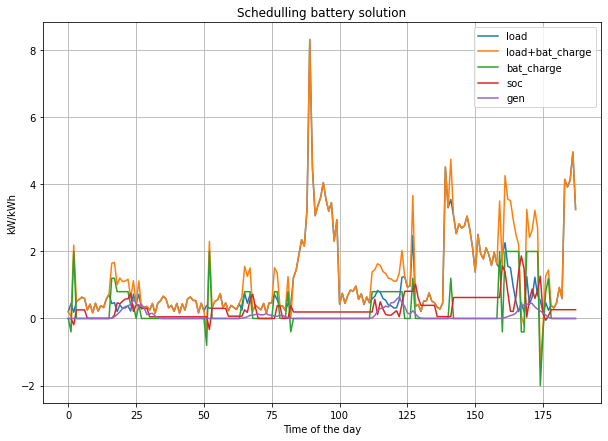

In [46]:
flex.makeplot(48,state_track[:,3],action_track,env.data[:,0],env.data[:,1],env) # O Tempo e o Env não estão a fazer nada
# makeplot(T,soc,sol,gen,load,env): Tempo, SOC, Bat_Charge, Generation, load, env

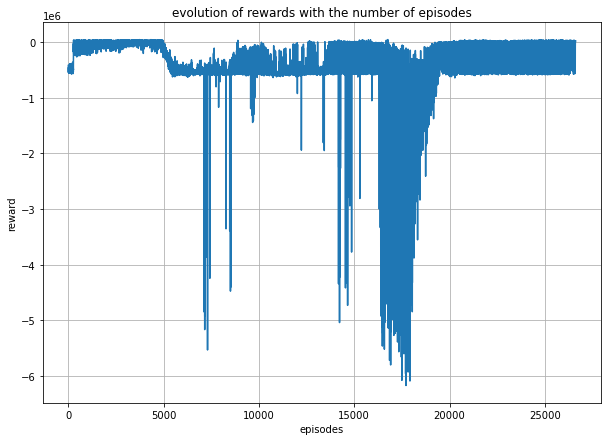

In [47]:
flex.reward_plot(env.R_Total)

In [48]:
evaluate_policy(model,env, n_eval_episodes=10)

/home/acr/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


38712.000000000015
38712.000000000015
38712.000000000015
38712.000000000015
38712.000000000015
38712.000000000015
38712.000000000015
38712.000000000015
38712.000000000015
38712.000000000015


(38711.999908447266, 0.0)

# Studying the battery

In [49]:
SOC = state_track[:,3]
bat_charge = action_track # Bat_charge
gen = env.data[:,0]
load = env.data[:,1]

In [50]:
state_track

array([[ 0.0000e+00,  0.0000e+00,  1.9800e-01, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 1.0000e+00,  0.0000e+00,  4.5000e-01, ...,  2.7750e+02,
         4.5000e-01,  0.0000e+00],
       [ 2.0000e+00,  0.0000e+00,  1.8600e-01, ..., -3.0111e+03,
         0.0000e+00,  4.0000e-01],
       ...,
       [ 1.8500e+02,  0.0000e+00,  4.1280e+00, ...,  9.3600e+01,
         4.1280e+00,  5.2000e+00],
       [ 1.8600e+02,  0.0000e+00,  4.9680e+00, ...,  5.1600e+01,
         4.9680e+00,  5.2000e+00],
       [ 1.8700e+02,  0.0000e+00,  3.2520e+00, ...,  1.3740e+02,
         3.2520e+00,  5.2000e+00]], dtype=float32)

In [51]:
def myplot(x):
    plt.figure(figsize=(10,6))
    plt.plot(x)

In [52]:
env.data

array([[0.0, 0.198],
       [0.0, 0.44999999999999996],
       [0.0, 0.186],
       [0.0, 0.504],
       [0.0, 0.5700000000000001],
       [0.0, 0.636],
       [0.0, 0.5940000000000001],
       [0.0, 0.252],
       [0.0, 0.42599999999999993],
       [0.0, 0.168],
       [0.0, 0.45599999999999996],
       [0.0, 0.22199999999999998],
       [0.0, 0.384],
       [0.0, 0.324],
       [0.0, 0.5820000000000001],
       [0.0, 0.72],
       [0.012, 0.44399999999999995],
       [0.05, 0.474],
       [0.115, 0.20400000000000001],
       [0.1975, 0.40800000000000003],
       [0.298, 0.30000000000000004],
       [0.3535, 0.318],
       [0.379, 0.372],
       [0.419, 0.22199999999999998],
       [0.551, 0.726],
       [0.4715, 0.43799999999999994],
       [0.3345, 0.72],
       [0.4165, 0.28800000000000003],
       [0.3045, 0.342],
       [0.1135, 0.36],
       [0.141, 0.252],
       [0.1525, 0.44999999999999996],
       [0.076, 0.15000000000000002],
       [0.029, 0.46199999999999997],
       [0.0

Text(0, 0.5, 'gen')

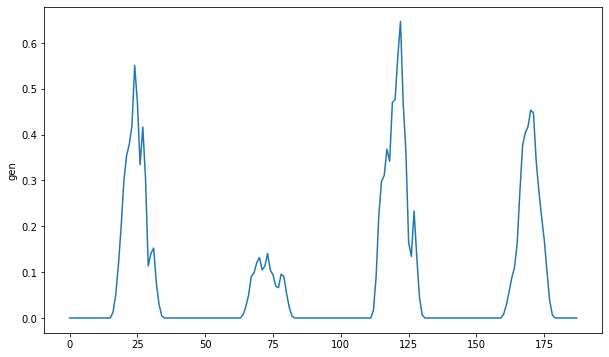

In [53]:
myplot(gen)
plt.ylabel('gen')

In [54]:
gen

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.012, 0.05, 0.115, 0.1975, 0.298, 0.3535, 0.379,
       0.419, 0.551, 0.4715, 0.3345, 0.4165, 0.3045, 0.1135, 0.141,
       0.1525, 0.076, 0.029, 0.0045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0075, 0.025, 0.05,
       0.0905, 0.0985, 0.1205, 0.132, 0.105, 0.113, 0.141, 0.1045, 0.094,
       0.0695, 0.066, 0.0955, 0.0905, 0.053, 0.023, 0.004, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.016, 0.0895, 0.2235, 0.2985, 0.311, 0.3685, 0.342, 0.4705,
       0.4765, 0.5695, 0.647, 0.4675, 0.361, 0.1645, 0.1345, 0.2335,
       0.133, 0.0445, 0.0065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Text(0, 0.5, 'load')

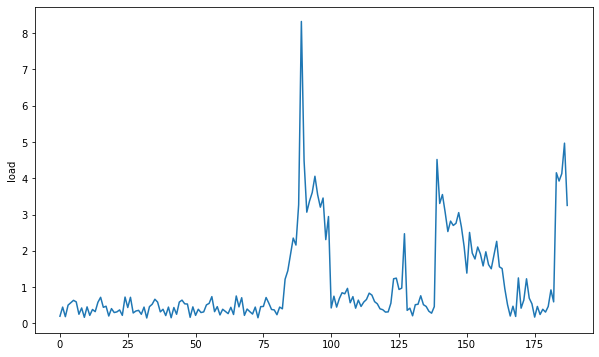

In [55]:
myplot(load)
plt.ylabel('load')

Text(0, 0.5, 'SOC')

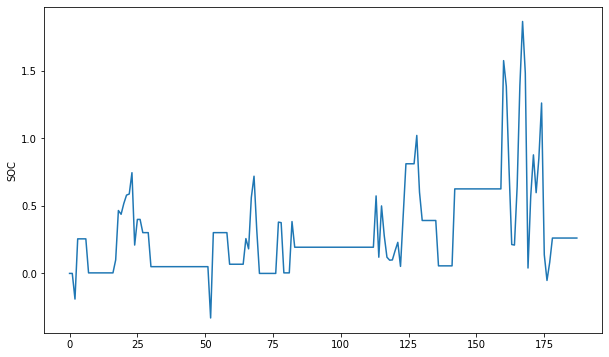

In [56]:
myplot(SOC)
plt.ylabel('SOC')

Text(0, 0.5, 'Battery Charge')

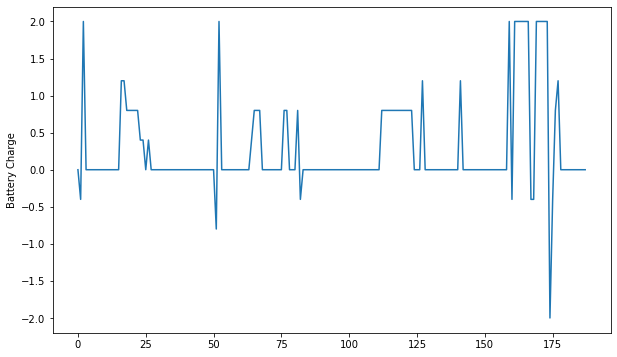

In [57]:
myplot(bat_charge)
plt.ylabel('Battery Charge')

Text(0, 0.5, 'Rewards track')

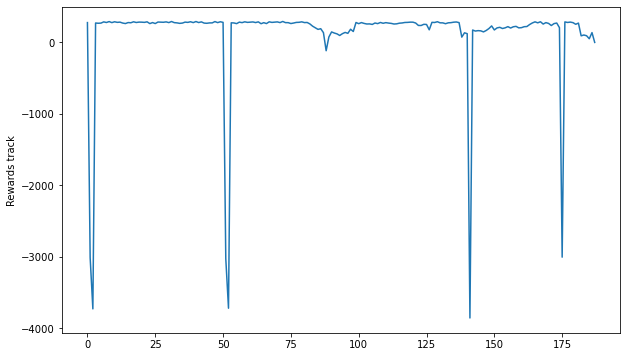

In [58]:
myplot(rewards_track)
plt.ylabel('Rewards track')

Text(0, 0.5, 'Energy taken from the grid')

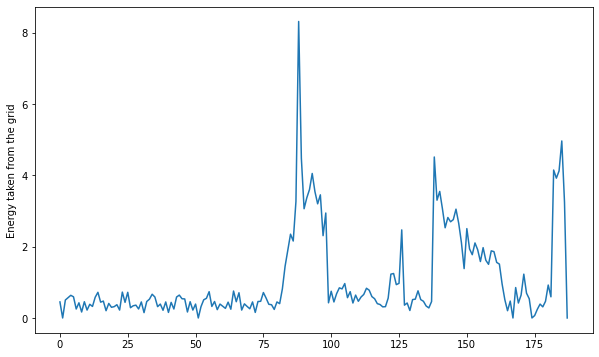

In [59]:
myplot(grid_track)
plt.ylabel('Energy taken from the grid')

Text(0, 0.5, 'Energy used from PV track')

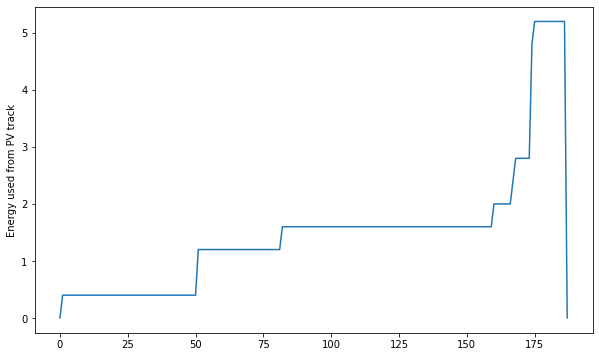

In [60]:
myplot(PV_track)
plt.ylabel('Energy used from PV track')

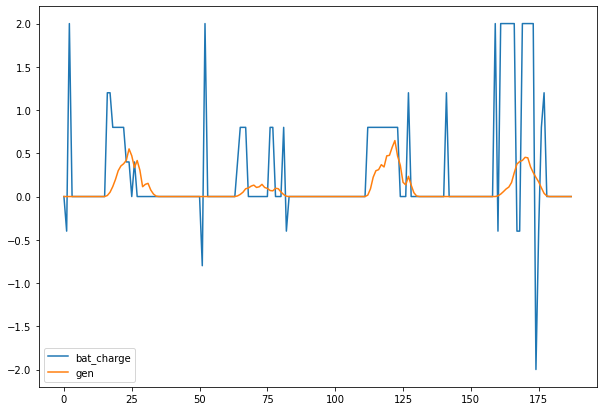

In [61]:
plt.figure(figsize=(10,7))
plt.legend
plt.plot(bat_charge,label='bat_charge')
plt.plot(gen,label='gen')
plt.legend()
plt.show()

In [62]:
eta = 0.95
dh=30*(1/60)

In [63]:
SOC

array([ 0.0000000e+00,  0.0000000e+00, -1.9000000e-01,  2.5600001e-01,
        2.5600001e-01,  2.5600001e-01,  2.5600001e-01,  4.0000002e-03,
        4.0000002e-03,  4.0000002e-03,  4.0000002e-03,  4.0000002e-03,
        4.0000002e-03,  4.0000002e-03,  4.0000002e-03,  4.0000002e-03,
        4.0000002e-03,  1.0000000e-01,  4.6599999e-01,  4.3799999e-01,
        5.1800001e-01,  5.7999998e-01,  5.8800000e-01,  7.4599999e-01,
        2.0999999e-01,  4.0000001e-01,  4.0000001e-01,  3.0199999e-01,
        3.0199999e-01,  3.0199999e-01,  5.0000001e-02,  5.0000001e-02,
        5.0000001e-02,  5.0000001e-02,  5.0000001e-02,  5.0000001e-02,
        5.0000001e-02,  5.0000001e-02,  5.0000001e-02,  5.0000001e-02,
        5.0000001e-02,  5.0000001e-02,  5.0000001e-02,  5.0000001e-02,
        5.0000001e-02,  5.0000001e-02,  5.0000001e-02,  5.0000001e-02,
        5.0000001e-02,  5.0000001e-02,  5.0000001e-02,  5.0000001e-02,
       -3.3000001e-01,  3.0199999e-01,  3.0199999e-01,  3.0199999e-01,
      

In [64]:
gen

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.012, 0.05, 0.115, 0.1975, 0.298, 0.3535, 0.379,
       0.419, 0.551, 0.4715, 0.3345, 0.4165, 0.3045, 0.1135, 0.141,
       0.1525, 0.076, 0.029, 0.0045, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0075, 0.025, 0.05,
       0.0905, 0.0985, 0.1205, 0.132, 0.105, 0.113, 0.141, 0.1045, 0.094,
       0.0695, 0.066, 0.0955, 0.0905, 0.053, 0.023, 0.004, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.016, 0.0895, 0.2235, 0.2985, 0.311, 0.3685, 0.342, 0.4705,
       0.4765, 0.5695, 0.647, 0.4675, 0.361, 0.1645, 0.1345, 0.2335,
       0.133, 0.0445, 0.0065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [65]:
C=np.array(bat_charge)*eta*dh
Sum=[]
Sumi = 0
for i in range(len(np.array(bat_charge)*eta*dh)):
    Sumi+= C[i]
    Sum.append(Sumi)
Sum

[0.0,
 -0.18999999999999995,
 0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 0.76,
 1.33,
 1.9000000000000001,
 2.2800000000000002,
 2.66,
 3.04,
 3.42,
 3.8,
 3.99,
 4.180000000000001,
 4.180000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 4.370000000000001,
 3.990000000000001,
 4.940000000000001,
 4.940000000000001,
 4.940000000000001,
 4.940000000000001,
 4.940000000000001,
 4.940000000000001,
 4.940000000000001,
 4.940000000000001,
 4.940000000000001,
 4.940000000000001,
 4.940000000000001,
 4.9400000